<h3> Last part of the code </h3>

Running the main code required.

Portion of the code involved, including,<br />
- Showing final results. <br />
- Showing histogram, chart, and linear regression if applicable. <br />
- Those that can't do will have split-chart instead. <br />
- Contain both training and testing set including. <br />
- Training set come first and then Testing set come next.

Must run this code to show conclusion. <br />
Code must be in same directory as csv files.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions
import ydata_profiling as pp  
from ydata_profiling import ProfileReport 

import warnings
import os

import matplotlib.pyplot as plt
from scipy import stats

warnings.filterwarnings('ignore')

Obtain series of the CSV files,

In [5]:
# class get DatasetCSV: obtain CSV files from the main directory and split into its training and testig dataset.

class getDatasetCSV:

    def __init__(self):

        self.df_ListOfCSV_Training = []
        self.df_ListOfCSV_Testing = []
        self.theIndicator = []


        def getListFiles():

            import os
            import glob

            item = glob.glob("*.csv")

            return item

        df_List_Files = getListFiles()

        df_List_CSV_Files = []

        for x in df_List_Files:
            txt = x
            
            x = txt.split(".")

            if (x[1] == "csv"):
                df_List_CSV_Files.append(x[0])

        df_List_CSV_Splited = []
        for x in df_List_CSV_Files:
            txt = x
            
            x = txt.split("_")

            df_List_CSV_Splited.append(x)

        df_List_Organized_Training = []
        df_ListOfCSV_Files_Training = []
        count = 0
        for x in df_List_CSV_Splited:
            if x[1] == 'training' :
                df_List_Organized_Training.append(x)
                df_ListOfCSV_Files_Training.append(df_List_CSV_Files[count])
            count = count + 1

        df_List_Organized_Testing = []
        df_ListOfCSV_Files_Testing = []
        count = 0
        for x in df_List_CSV_Splited:
            if x[1] == 'testing' :
                df_List_Organized_Testing.append(x)
                df_ListOfCSV_Files_Testing.append(df_List_CSV_Files[count])
            count = count + 1

        # self.df_ListOfCSV_Training = []
        for x in df_ListOfCSV_Files_Training:
            newItem = str(x+".csv")
            self.df_ListOfCSV_Training.append(newItem)

        # self.df_ListOfCSV_Testing = []
        for x in df_ListOfCSV_Files_Testing:
            newItem = str(x+".csv")
            self.df_ListOfCSV_Testing.append(newItem)

        # self.theIndicator = []
        for x in df_List_Organized_Testing:
            if x[5] == 'Hrs':
                self.theIndicator.append(str(x[4]+"_"+x[5]+"_"+x[6]))
            else:
                self.theIndicator.append(str(x[4]+"_"+x[5]))

        theUnique = []
        for x in self.theIndicator:
            if x not in theUnique: 
                theUnique.append(x) 

        self.theIndicator = theUnique.copy()

        # for x in self.theIndicator:
        #     print(x)
    
    def getTrainingSet(self):
        return self.df_ListOfCSV_Training
    
    def getTestingSet(self):
        return self.df_ListOfCSV_Testing
    
    def printTrainingSet(self):
        for x in self.df_ListOfCSV_Training:
            print(x)

    def printTestingSet(self):
        for x in self.df_ListOfCSV_Testing:
            print(x)

Get name of the each CSV fies, also name of the variables.

In [6]:
# class generateDataset(): obtain name of the CSV files from the above class.

class generateDataset():
    def __init__(self):
        p1 = getDatasetCSV()
        self.df_Training = p1.getTrainingSet()
        self.df_Testing = p1.getTestingSet()

    def generateTrainingDataset(self):
        return self.df_Training
    
    def generateTestingDataset(self):
        return self.df_Testing

df_Get_Dataset = generateDataset()
df_Training_Dataset = df_Get_Dataset.generateTrainingDataset()
df_Testing_Dataset = df_Get_Dataset.generateTestingDataset()


# for x in df_Testing_Dataset:
#     print(x)

In [7]:
# class exportCSV_finalDataset(): convert into actual dataset by opening csv files from above code.

# If the dataset are missing for this components, it will give a error.

# df_AvgAnnHrsWrk # Average annual hours worked

class exportCSV_finalDataset():

    def __init__(self, df):

        self.df_indicators = list(df)

        self.df_list = []

        for x in self.df_indicators:
            if os.path.isfile(x):
                df_sorted_na = pd.read_csv(x)

                # print(df_sorted_na.info())
                # print(df_sorted_na.head(10))

                self.df_list.append(df_sorted_na)
            else:
                print("Run main code first before running this.")
                break
    
    def getSpecificIndicator(self, indicator):
        df_List_CSV_Splited = []
        for x in self.df_indicators:
            txt = x
            
            x = txt.split("_")

            df_List_CSV_Splited.append(x)

        theUnique = []
        for x in df_List_CSV_Splited:
            y = x[4]+"_"+x[5]
            if y not in theUnique:
                theUnique.append(y)

        count = 0
        df_List_to_Update = []
        df_List_to_Display = []
        for x in df_List_CSV_Splited:
            txt = x[4]+"_"+x[5]
            if txt == theUnique[indicator]:
                df_List_to_Update.append(self.df_indicators[count])
                df_List_to_Display.append(self.df_list[count])
            count = count + 1
        print(df_List_to_Update)
        return df_List_to_Display
    
    def getSpecificIndicatorName(self, indicator):
        df_List_CSV_Splited = []
        for x in self.df_indicators:
            txt = x
            
            x = txt.split("_")

            df_List_CSV_Splited.append(x)

        theUnique = []
        for x in df_List_CSV_Splited:
            y = x[4]+"_"+x[5]
            if y not in theUnique:
                theUnique.append(y)

        count = 0
        df_List_to_Update = []
        for x in df_List_CSV_Splited:
            txt = x[4]+"_"+x[5]
            if txt == theUnique[indicator]:
                df_List_to_Update.append(self.df_indicators[count])
            count = count + 1
        return df_List_to_Update

<h3> Training Set </h3>

Start run above code to return all of the training dataset. 

In [8]:
df_Final_TrainingDataset = exportCSV_finalDataset(df_Training_Dataset)


Split the training dataset again into the seven Indicators.

In [9]:
# If the code cannot run, it will give a error.

# df_AvgAnnHrsWrk_2013 # Average annual hours worked
df_Final_TrainingDataset_AvgAnnHrsWrk = df_Final_TrainingDataset.getSpecificIndicator(0)
df_Final_TrainingDataset_AvgAnnHrsWrk_Name = df_Final_TrainingDataset.getSpecificIndicatorName(0)

# df_AvgAnnWages # Average annual wages and salaries
df_Final_TrainingDataset_AvgAnnWages = df_Final_TrainingDataset.getSpecificIndicator(1)
df_Final_TrainingDataset_AvgAnnWages_Name = df_Final_TrainingDataset.getSpecificIndicatorName(1)

# df_AvgHrsWages # Average hourly wage
df_Final_TrainingDataset_AvgHrsWages = df_Final_TrainingDataset.getSpecificIndicator(2)
df_Final_TrainingDataset_AvgHrsWages_Name = df_Final_TrainingDataset.getSpecificIndicatorName(2)

# df_AvgWeekHrsWrked # Average weekly hours worked
df_Final_TrainingDataset_AvgWeekHrsWrked = df_Final_TrainingDataset.getSpecificIndicator(3)
df_Final_TrainingDataset_AvgWeekHrsWrked_Name = df_Final_TrainingDataset.getSpecificIndicatorName(3)

# df_Hrs_Wrked # Hours Worked
df_Final_TrainingDataset_Hrs_Wrked = df_Final_TrainingDataset.getSpecificIndicator(4)
df_Final_TrainingDataset_Hrs_Wrked_Name = df_Final_TrainingDataset.getSpecificIndicatorName(4)

# df_NumOfJob # Number of jobs
df_Final_TrainingDataset_NumOfJob = df_Final_TrainingDataset.getSpecificIndicator(5)
df_Final_TrainingDataset_NumOfJob_Name = df_Final_TrainingDataset.getSpecificIndicatorName(5)

# df_WagesAndSalaries # Wages and Salaries
df_Final_TrainingDataset_WagesAndSalaries = df_Final_TrainingDataset.getSpecificIndicator(6)
df_Final_TrainingDataset_WagesAndSalaries_Name = df_Final_TrainingDataset.getSpecificIndicatorName(6)

['final_training_df_output_df_AvgAnnHrsWrk_ByAge.csv', 'final_training_df_output_df_AvgAnnHrsWrk_ByEducation.csv', 'final_training_df_output_df_AvgAnnHrsWrk_ByGender.csv', 'final_training_df_output_df_AvgAnnHrsWrk_ByImmigrant.csv']
['final_training_df_output_df_AvgAnnWages_ByAge.csv', 'final_training_df_output_df_AvgAnnWages_ByEducation.csv', 'final_training_df_output_df_AvgAnnWages_ByGender.csv', 'final_training_df_output_df_AvgAnnWages_ByImmigrant.csv']
['final_training_df_output_df_AvgHrsWages_ByAge.csv', 'final_training_df_output_df_AvgHrsWages_ByEducation.csv', 'final_training_df_output_df_AvgHrsWages_ByGender.csv', 'final_training_df_output_df_AvgHrsWages_ByImmigrant.csv']
['final_training_df_output_df_AvgWeekHrsWrked_ByAge.csv', 'final_training_df_output_df_AvgWeekHrsWrked_ByEducation.csv', 'final_training_df_output_df_AvgWeekHrsWrked_ByGender.csv', 'final_training_df_output_df_AvgWeekHrsWrked_ByImmigrant.csv']
['final_training_df_output_df_Hrs_Wrked_ByAge.csv', 'final_training_

Analysis the data inside the dataset.

In [10]:
# class Final_Target_To_Analysis: Class that contain all the Analysis using above code.

class Final_Target_To_Analysis:

    def __init__(self, df, pd, np, pp, sns, year):
        self.dfa_Target_To_Analysis = df
        self.year = year
        self.pd = pd
        self.np = np
        self.pp = pp
        self.sns = sns
 

    def get_wholeDataSet(self):
        return self.dfa_Target_To_Analysis
    
    def get_selectDataset(self, order):
        return self.dfa_Target_To_Analysis[order]
        
    def print_Year(self):
        for df_Target_To_Analysis in self.year:
          print(df_Target_To_Analysis)

    def print_unique(self):
        n = 0
        for df_Target_To_Analysis in self.dfa_Target_To_Analysis:
            print(self.year[n])
            print(df_Target_To_Analysis.unique())
            n = n + 1

    def print_info(self):
        n = 0
        for df_Target_To_Analysis in self.dfa_Target_To_Analysis:
            print(self.year[n])
            print(df_Target_To_Analysis.info())
            n = n + 1

    def print_content(self):
        n = 0
        for df_Target_To_Analysis in self.dfa_Target_To_Analysis:
            print(self.year[n])
            print(df_Target_To_Analysis.head(5))
            n = n + 1

    def print_info(self):
        n = 0
        for df_Target_To_Analysis in self.dfa_Target_To_Analysis:
            print(self.year[n])
            print(df_Target_To_Analysis.info())
            n = n + 1

    # create a function
    def print_result_all(self):
        n = 0
        for df_Target_To_Analysis in self.dfa_Target_To_Analysis:
            grouped = df_Target_To_Analysis.groupby(['Characteristics'])
            print(self.year[n])
            print(grouped['VALUE'].agg([np.sum, np.mean, np.min, np.median, np.max, np.size]))
            print("Overall,")
            print("Sum : ",np.sum(df_Target_To_Analysis['VALUE']))
            print("Mean : ",np.mean(df_Target_To_Analysis['VALUE']))
            print("Min/median/max :",np.min(df_Target_To_Analysis['VALUE']),"/",
                  np.median(df_Target_To_Analysis['VALUE']),"/",
                  np.max(df_Target_To_Analysis['VALUE']))
            print("Standard Deviation : ",np.std(df_Target_To_Analysis['VALUE']))
            print("Skewnewss : ",df_Target_To_Analysis['VALUE'].skew())
            print("Total size : ",len(df_Target_To_Analysis.index))
            print()
            n = n + 1
    
    def print_histogram_all(self):
        n = 0
        for df_Target_To_Analysis in self.dfa_Target_To_Analysis:
            print(self.year[n])
            sns.displot(data=df_Target_To_Analysis, x="VALUE", kind="hist", bins = 100, aspect = 1.5)
            plt.show()
            n = n + 1

    

    def print_result(self, n):
        df_Target_To_Analysis = self.dfa_Target_To_Analysis[n]
        grouped = df_Target_To_Analysis.groupby(['Characteristics'])
        print(self.year[n])
        print(grouped['VALUE'].agg([np.sum, np.mean, np.min, np.median, np.max, np.size]))
        print("Overall,")
        print("Sum : ",np.sum(df_Target_To_Analysis['VALUE']))
        print("Mean : ",np.mean(df_Target_To_Analysis['VALUE']))
        print("Min/median/max :",np.min(df_Target_To_Analysis['VALUE']),"/",
                  np.median(df_Target_To_Analysis['VALUE']),"/",
                  np.max(df_Target_To_Analysis['VALUE']))
        print("Standard Deviation : ",np.std(df_Target_To_Analysis['VALUE']))
        print("Skewnewss : ",df_Target_To_Analysis['VALUE'].skew())
        print("Total size : ",len(df_Target_To_Analysis.index))
        print()
        n = n + 1
    
    def print_histogram(self, n):
        df_Target_To_Analysis = self.dfa_Target_To_Analysis[n]
        print(self.year[n])
        sns.displot(data=df_Target_To_Analysis, x="VALUE", kind="hist", bins = 100, aspect = 1.5)
        plt.show()
        n = n + 1
    
    def print_classifier(self, n):
        # n = 0

        if (n == 0 or n == 1):
            # import matplotlib.pyplot as plt
            # from scipy import stats

            # https://realpython.com/linear-regression-in-python/
            # https://www.w3schools.com/python/python_ml_linear_regression.asp

            print(self.year[n])

            xy = self.dfa_Target_To_Analysis[n].copy()
            if (n == 0):
                x = xy['Age_group']
            else:
                x = xy['Education_group']
            y = xy['VALUE'] # [99,86,87,88,111,86,103,87,94,78,77,85,86]

            slope, intercept, r, p, std_err = stats.linregress(x, y)

            def myfunc(x):
                return slope * x + intercept

            mymodel = list(map(myfunc, x))

            plt.scatter(x, y)
            plt.plot(x, mymodel)
            plt.show()

            if (n == 1):
                print("Done by Linear Regression")
                print("Higher the number, higher the education\n")
            else:
                print("Done by Linear Regression\n")
        else:
            # import numpy as np
            # https://www.geeksforgeeks.org/seaborn-categorical-plots/

            print(self.year[n])

            xy = self.dfa_Target_To_Analysis[n].copy()
            if (n == 2):
                x = xy['Gender_group']
            else:
                x = xy['Immigrant_status']
            y = xy['VALUE'] # [99,86,87,88,111,86,103,87,94,78,77,85,86]
            z = 'Characteristics'
 
            # change the estimator from mean to standard deviation
            # sns.barplot(x =x, y ='VALUE', data = xy, 
            #             palette ='plasma', estimator = np.std)
            sns.stripplot(x = x, y ='VALUE', data = xy, 
                        jitter = True, dodge = True) # hue =z, dodge = True)
            plt.show()
            print("Done using Stripplot")

            xyz = []
            if (n == 2):
                print("[1, 0] = "+str(xy['Characteristics'].unique())+"\n")
            else:
                print("[0, 1] = "+str(xy['Characteristics'].unique())+"\n")

    def print_byYearlyGraph(self, x, n):
        print(self.year[n])
        df = self.dfa_Target_To_Analysis[n].copy()

        # x = self.x
        y = 'VALUE'

        sns.stripplot(x = x, y = y, data = df, 
                        jitter = True, dodge = True) # hue =z, dodge = True)
        plt.show()
        print("Done using Stripplot\n")

    def print_Panda_Profiling(self, folder_name):
        n = 0
        for df_Target_To_Analysis in self.dfa_Target_To_Analysis:
            
            old_title = self.year[n]
                
            new_title = old_title.split(".")

            print(new_title)

            new_panda_title = "Panda Profiling for "+new_title[0]

            pp = ProfileReport(df_Target_To_Analysis, title=new_panda_title)
            pp_df_sorted = pp.to_html()

            new_file = folder_name+"/"+new_title[0]+".html"
            f = open(new_file, "a") # Expert modifying data into html file.
            f.write(pp_df_sorted)
            f.close()
            n = n + 1

Result for training set for 'Average annual hours worked'

In [11]:
# Export dataset to analysis

dfa_Training_AvgAnnHrsWrk_To_Analysis = df_Final_TrainingDataset_AvgAnnHrsWrk
dfa_Training_AvgAnnHrsWrk_To_Analysis = Final_Target_To_Analysis(dfa_Training_AvgAnnHrsWrk_To_Analysis, pd, np, pp, sns, df_Final_TrainingDataset_AvgAnnHrsWrk_Name)

Result for training set for 'Average annual hours worked' by Age group

final_training_df_output_df_AvgAnnHrsWrk_ByAge.csv
                            sum         mean    amin  median    amax  size
Characteristics                                                           
15 to 24 years         135046.0   900.306667   791.0   905.0  1108.0   150
25 to 34 years         241704.0  1611.360000  1425.0  1607.5  1816.0   150
35 to 44 years         263554.0  1757.026667  1607.0  1760.5  2023.0   150
45 to 54 years         274059.0  1827.060000  1694.0  1833.5  2036.0   150
55 to 64 years         251703.0  1678.020000  1473.0  1693.0  1860.0   150
65 years old and over  160703.0  1071.353333   788.0  1077.0  1335.0   150
Overall,
Sum :  1326769.0
Mean :  1474.1877777777777
Min/median/max : 788.0 / 1641.0 / 2036.0
Standard Deviation :  366.1544107576526
Skewnewss :  -0.6119698440041116
Total size :  900

final_training_df_output_df_AvgAnnHrsWrk_ByAge.csv


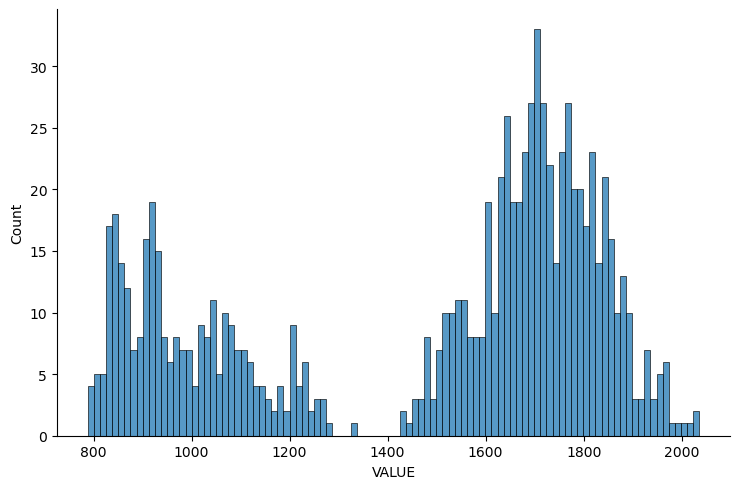

final_training_df_output_df_AvgAnnHrsWrk_ByAge.csv


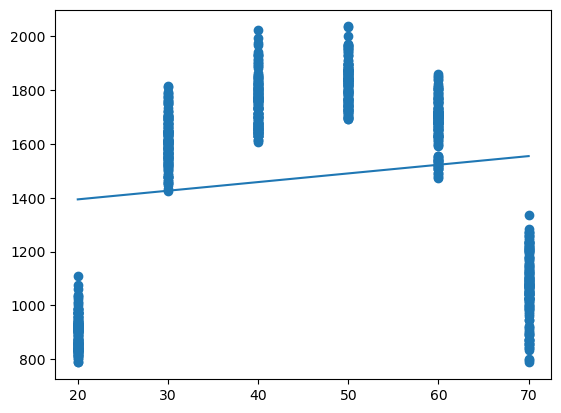

Done by Linear Regression



In [12]:
dfa_to_cover = 0

dfa_Training_AvgAnnHrsWrk_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_AvgAnnHrsWrk_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgAnnHrsWrk_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average annual hours worked' by Education level

final_training_df_output_df_AvgAnnHrsWrk_ByEducation.csv
                                   sum         mean    amin  median    amax  \
Characteristics                                                               
High school diploma and less  197099.0  1313.993333  1177.0  1299.5  1508.0   
Trade certificate             239040.0  1593.600000  1390.0  1562.0  1904.0   
University degree and higher  254326.0  1695.506667  1527.0  1698.5  1894.0   

                              size  
Characteristics                     
High school diploma and less   150  
Trade certificate              150  
University degree and higher   150  
Overall,
Sum :  690465.0
Mean :  1534.3666666666666
Min/median/max : 1177.0 / 1557.0 / 1904.0
Standard Deviation :  183.0583179693777
Skewnewss :  -0.24125831672287715
Total size :  450

final_training_df_output_df_AvgAnnHrsWrk_ByEducation.csv


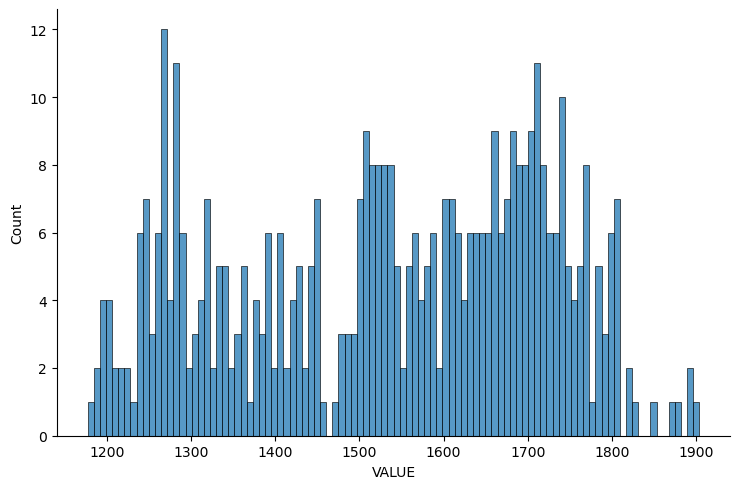

final_training_df_output_df_AvgAnnHrsWrk_ByEducation.csv


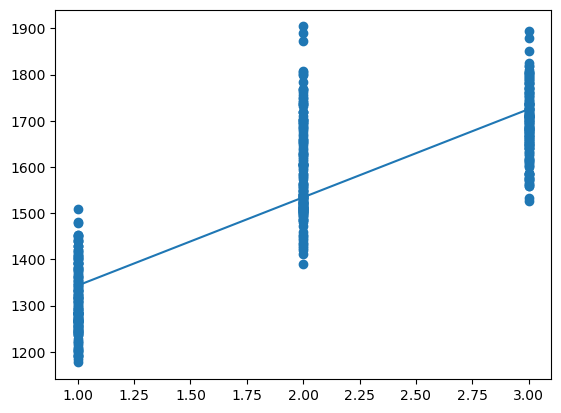

Done by Linear Regression
Higher the number, higher the education



In [13]:
dfa_to_cover = 1

dfa_Training_AvgAnnHrsWrk_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_AvgAnnHrsWrk_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgAnnHrsWrk_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average annual hours worked' by Gender group


final_training_df_output_df_AvgAnnHrsWrk_ByGender.csv
                       sum         mean    amin  median    amax  size
Characteristics                                                      
Female employees  230639.0  1537.593333  1412.0  1538.0  1698.0   150
Male employees    247348.0  1648.986667  1462.0  1647.5  1804.0   150
Overall,
Sum :  477987.0
Mean :  1593.29
Min/median/max : 1412.0 / 1590.5 / 1804.0
Standard Deviation :  90.55230109353012
Skewnewss :  0.2882947149239751
Total size :  300

final_training_df_output_df_AvgAnnHrsWrk_ByGender.csv


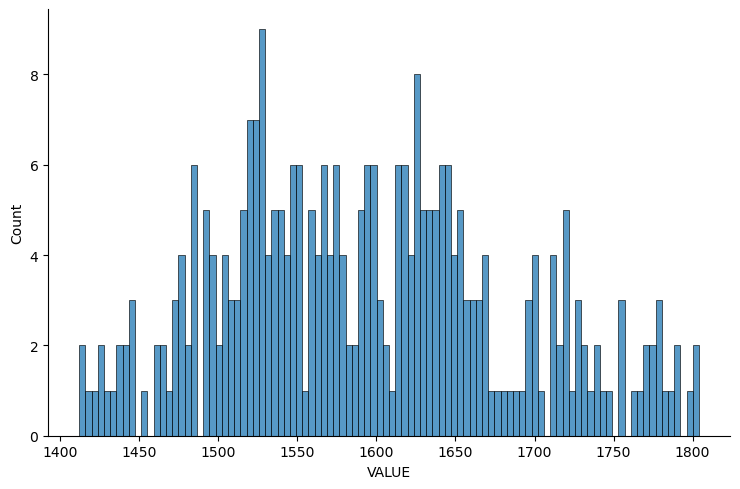

final_training_df_output_df_AvgAnnHrsWrk_ByGender.csv


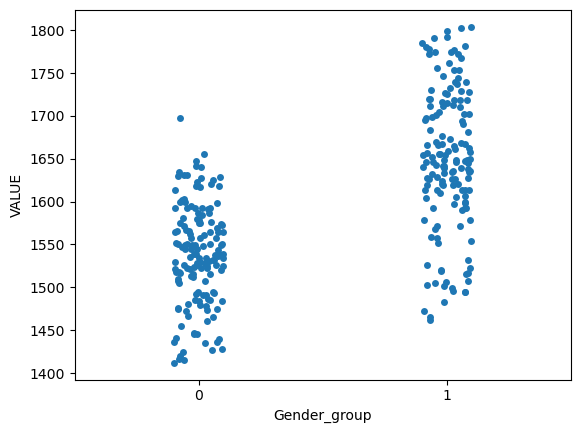

Done using Stripplot
[1, 0] = ['Male employees' 'Female employees']



In [14]:
dfa_to_cover = 2

dfa_Training_AvgAnnHrsWrk_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_AvgAnnHrsWrk_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgAnnHrsWrk_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average annual hours worked' by Immigrant status

final_training_df_output_df_AvgAnnHrsWrk_ByImmigrant.csv
                              sum         mean    amin  median    amax  size
Characteristics                                                             
Immigrant employees      238512.0  1590.080000  1400.0  1595.5  1765.0   150
Non-immigrant employees  235777.0  1571.846667  1438.0  1574.5  1699.0   150
Overall,
Sum :  474289.0
Mean :  1580.9633333333334
Min/median/max : 1400.0 / 1586.0 / 1765.0
Standard Deviation :  68.88252310193705
Skewnewss :  -0.29743141315518284
Total size :  300

final_training_df_output_df_AvgAnnHrsWrk_ByImmigrant.csv


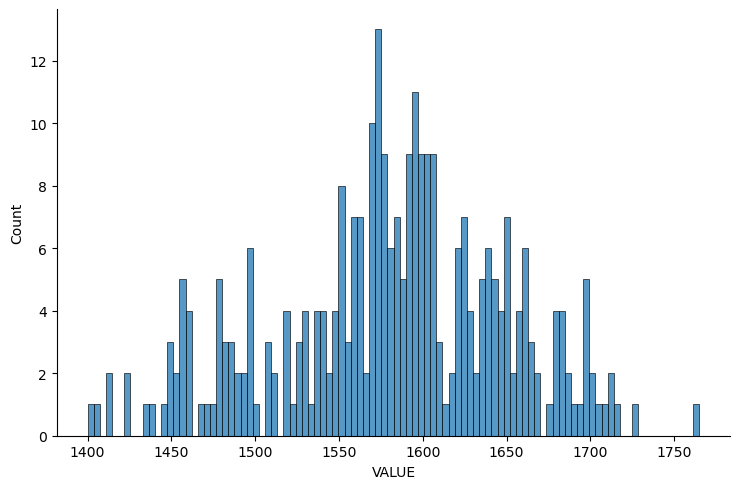

final_training_df_output_df_AvgAnnHrsWrk_ByImmigrant.csv


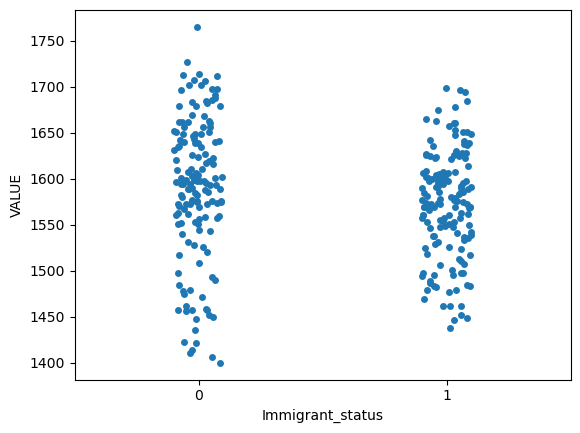

Done using Stripplot
[0, 1] = ['Immigrant employees' 'Non-immigrant employees']



In [15]:
dfa_to_cover = 3

dfa_Training_AvgAnnHrsWrk_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics. 
dfa_Training_AvgAnnHrsWrk_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgAnnHrsWrk_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average annual hours worked' by yearly

final_training_df_output_df_AvgAnnHrsWrk_ByAge.csv


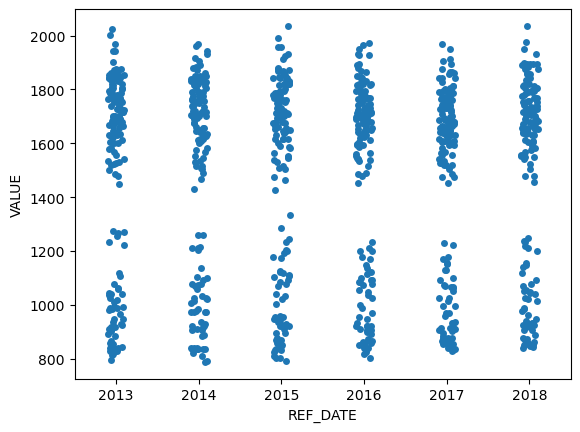

Done using Stripplot



In [16]:
dfa_to_cover = 0

dfa_Training_AvgAnnHrsWrk_To_Analysis.print_byYearlyGraph('REF_DATE',dfa_to_cover) # Print the possible classifier based on Yearly only on Age group.

Result for training set for 'Average annual wages and salaries'

In [17]:
# Export dataset to analysis

dfa_Training_AvgAnnWages_To_Analysis = df_Final_TrainingDataset_AvgAnnWages
dfa_Training_AvgAnnWages_To_Analysis = Final_Target_To_Analysis(dfa_Training_AvgAnnWages_To_Analysis, pd, np, pp, sns, df_Final_TrainingDataset_AvgAnnWages_Name)

Result for training set for 'Average annual wages and salaries' by Age group

final_training_df_output_df_AvgAnnWages_ByAge.csv
                             sum          mean     amin   median     amax  \
Characteristics                                                             
15 to 24 years         2201591.0  14677.273333   9944.0  14222.5  21671.0   
25 to 34 years         5522502.0  36816.680000  27239.0  36902.0  49744.0   
35 to 44 years         7437012.0  49580.080000  36021.0  49282.5  66133.0   
45 to 54 years         8260471.0  55069.806667  37873.0  54568.0  74095.0   
55 to 64 years         7654252.0  51028.346667  34578.0  50257.0  70393.0   
65 years old and over  4791610.0  31944.066667  18687.0  30546.5  49820.0   

                       size  
Characteristics              
15 to 24 years          150  
25 to 34 years          150  
35 to 44 years          150  
45 to 54 years          150  
55 to 64 years          150  
65 years old and over   150  
Overall,
Sum :  35867438.0
Mean :  39852.70888888889
Min/median/max : 9944.0 / 41086.0 / 7409

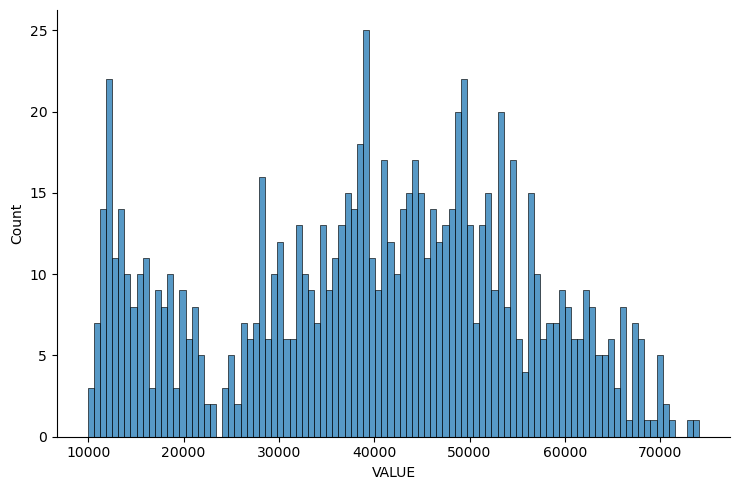

final_training_df_output_df_AvgAnnWages_ByAge.csv


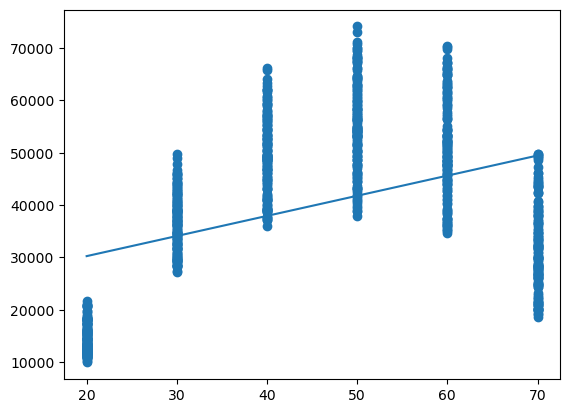

Done by Linear Regression



In [18]:
dfa_to_cover = 0

dfa_Training_AvgAnnWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_AvgAnnWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgAnnWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average annual wages and salaries' by Education level

final_training_df_output_df_AvgAnnWages_ByEducation.csv
                                    sum          mean     amin   median  \
Characteristics                                                           
High school diploma and less  4148328.0  27655.520000  17525.0  27352.5   
Trade certificate             5961133.0  39740.886667  25690.0  38230.5   
University degree and higher  7996089.0  53307.260000  38370.0  53039.0   

                                 amax  size  
Characteristics                              
High school diploma and less  39647.0   150  
Trade certificate             69402.0   150  
University degree and higher  68278.0   150  
Overall,
Sum :  18105550.0
Mean :  40234.555555555555
Min/median/max : 17525.0 / 38514.0 / 69402.0
Standard Deviation :  12693.593488152565
Skewnewss :  0.40865383104454694
Total size :  450

final_training_df_output_df_AvgAnnWages_ByEducation.csv


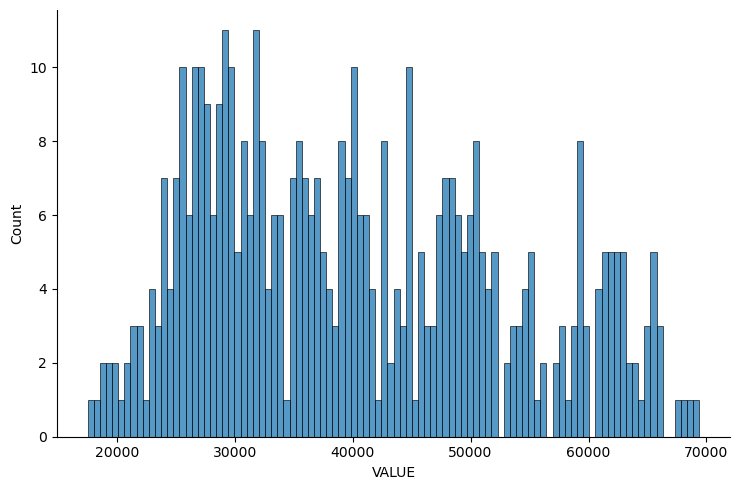

final_training_df_output_df_AvgAnnWages_ByEducation.csv


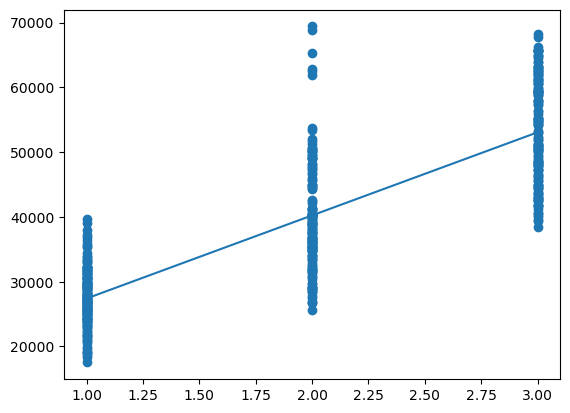

Done by Linear Regression
Higher the number, higher the education



In [19]:
dfa_to_cover = 1

dfa_Training_AvgAnnWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_AvgAnnWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgAnnWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average annual wages and salaries' by Gender group

final_training_df_output_df_AvgAnnWages_ByGender.csv
                        sum          mean     amin   median     amax  size
Characteristics                                                           
Female employees  5906780.0  39378.533333  28416.0  38342.5  54766.0   150
Male employees    7450496.0  49669.973333  32999.0  48723.5  68935.0   150
Overall,
Sum :  13357276.0
Mean :  44524.253333333334
Min/median/max : 28416.0 / 44535.5 / 68935.0
Standard Deviation :  9288.40366599605
Skewnewss :  0.4314732041122265
Total size :  300

final_training_df_output_df_AvgAnnWages_ByGender.csv


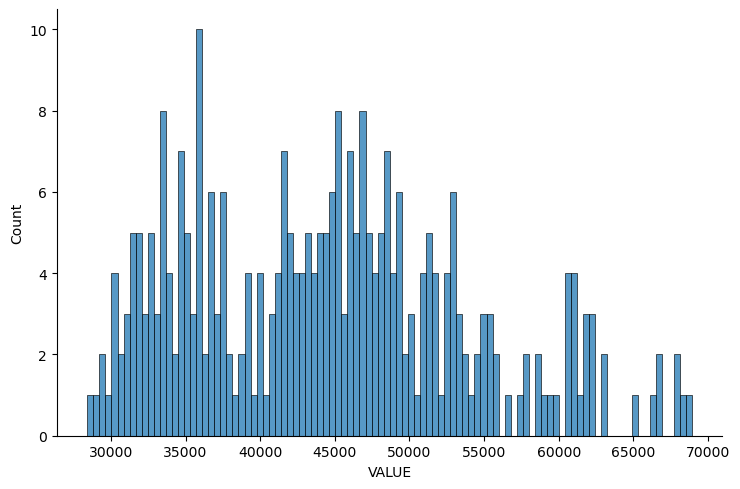

final_training_df_output_df_AvgAnnWages_ByGender.csv


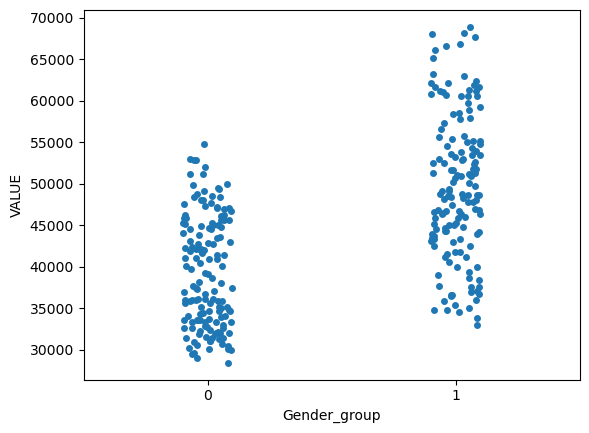

Done using Stripplot
[1, 0] = ['Male employees' 'Female employees']



In [20]:
dfa_to_cover = 2

dfa_Training_AvgAnnWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_AvgAnnWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgAnnWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average annual wages and salaries' by Immigrant status

final_training_df_output_df_AvgAnnWages_ByImmigrant.csv
                               sum          mean     amin   median     amax  \
Characteristics                                                               
Immigrant employees      6348960.0  42326.400000  28138.0  41305.0  58379.0   
Non-immigrant employees  6473501.0  43156.673333  29871.0  42879.5  57089.0   

                         size  
Characteristics                
Immigrant employees       150  
Non-immigrant employees   150  
Overall,
Sum :  12822461.0
Mean :  42741.53666666667
Min/median/max : 28138.0 / 42469.5 / 58379.0
Standard Deviation :  7477.527564330484
Skewnewss :  -0.008804076716501099
Total size :  300

final_training_df_output_df_AvgAnnWages_ByImmigrant.csv


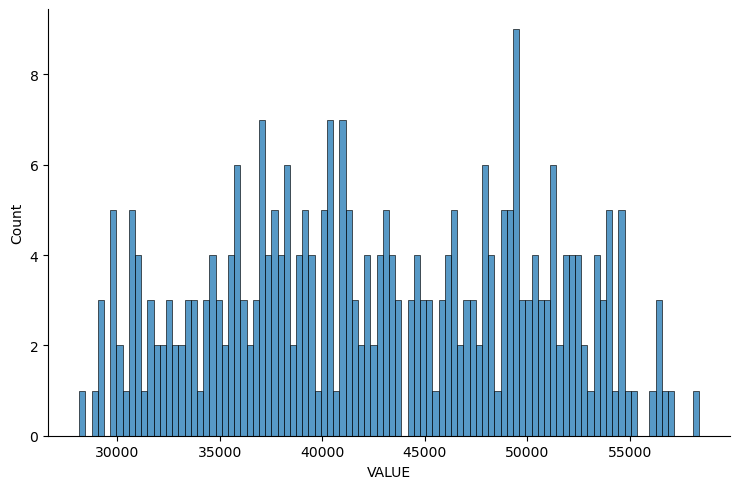

final_training_df_output_df_AvgAnnWages_ByImmigrant.csv


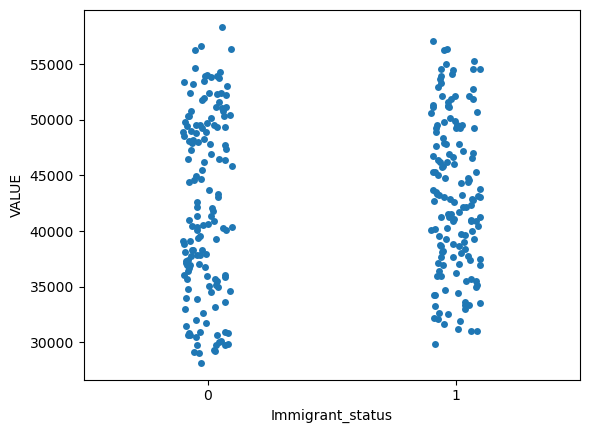

Done using Stripplot
[0, 1] = ['Immigrant employees' 'Non-immigrant employees']



In [21]:
dfa_to_cover = 3

dfa_Training_AvgAnnWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics. 
dfa_Training_AvgAnnWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgAnnWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average annual wages and salaries' by yearly

final_training_df_output_df_AvgAnnWages_ByAge.csv


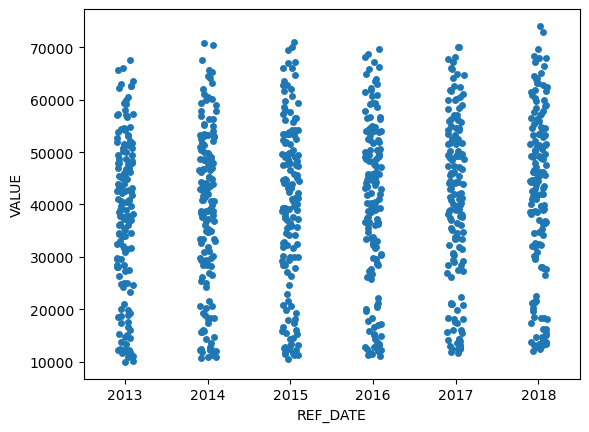

Done using Stripplot



In [22]:
dfa_to_cover = 0

dfa_Training_AvgAnnWages_To_Analysis.print_byYearlyGraph('REF_DATE',dfa_to_cover) # Print the possible classifier based on Yearly only on Age group.

Result for training set for 'Average hourly wage'

In [23]:
# Export dataset to analysis

dfa_Training_AvgHrsWages_To_Analysis = df_Final_TrainingDataset_AvgHrsWages
dfa_Training_AvgHrsWages_To_Analysis = Final_Target_To_Analysis(dfa_Training_AvgHrsWages_To_Analysis, pd, np, pp, sns, df_Final_TrainingDataset_AvgHrsWages_Name)

Result for training set for 'Average hourly wage' by Age group

final_training_df_output_df_AvgHrsWages_ByAge.csv
                           sum       mean   amin  median   amax  size
Characteristics                                                      
15 to 24 years         2433.56  16.223733  12.18  15.530  22.18   150
25 to 34 years         3433.97  22.893133  16.65  22.695  30.32   150
35 to 44 years         4236.72  28.244800  19.90  27.565  36.02   150
45 to 54 years         4519.64  30.130933  20.57  29.835  38.90   150
55 to 64 years         4552.73  30.351533  20.35  29.925  39.83   150
65 years old and over  4465.94  29.772933  18.37  29.040  43.83   150
Overall,
Sum :  23642.56
Mean :  26.26951111111111
Min/median/max : 12.18 / 26.39 / 43.83
Standard Deviation :  6.836752411691197
Skewnewss :  -0.0046761021580015785
Total size :  900

final_training_df_output_df_AvgHrsWages_ByAge.csv


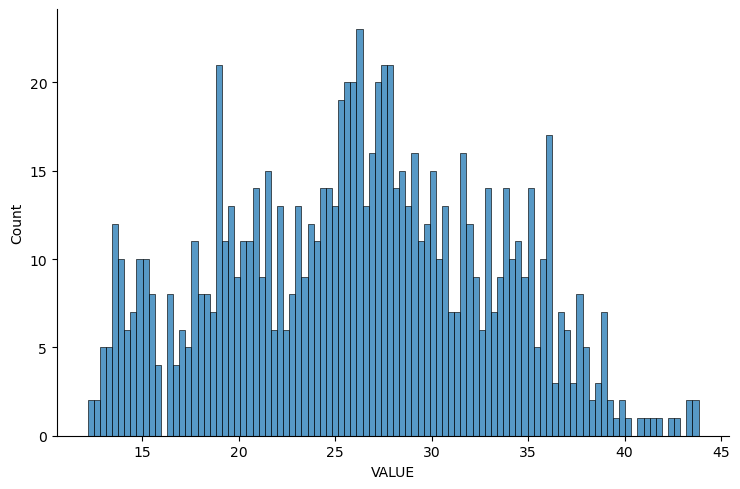

final_training_df_output_df_AvgHrsWages_ByAge.csv


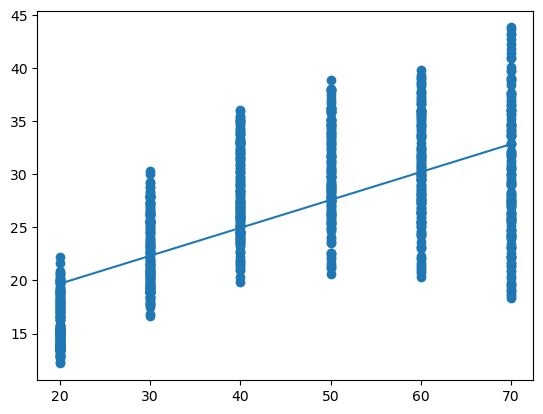

Done by Linear Regression



In [24]:
dfa_to_cover = 0

dfa_Training_AvgHrsWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_AvgHrsWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgHrsWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average hourly wage' by Education level

final_training_df_output_df_AvgHrsWages_ByEducation.csv
                                  sum     mean   amin  median   amax  size
Characteristics                                                           
High school diploma and less  3146.19  20.9746  14.70   21.16  26.81   150
Trade certificate             3716.88  24.7792  17.76   24.37  37.06   150
University degree and higher  4727.40  31.5160  21.47   30.84  41.36   150
Overall,
Sum :  11590.47
Mean :  25.7566
Min/median/max : 14.7 / 24.54 / 41.36
Standard Deviation :  5.896346495547523
Skewnewss :  0.6582168868606721
Total size :  450

final_training_df_output_df_AvgHrsWages_ByEducation.csv


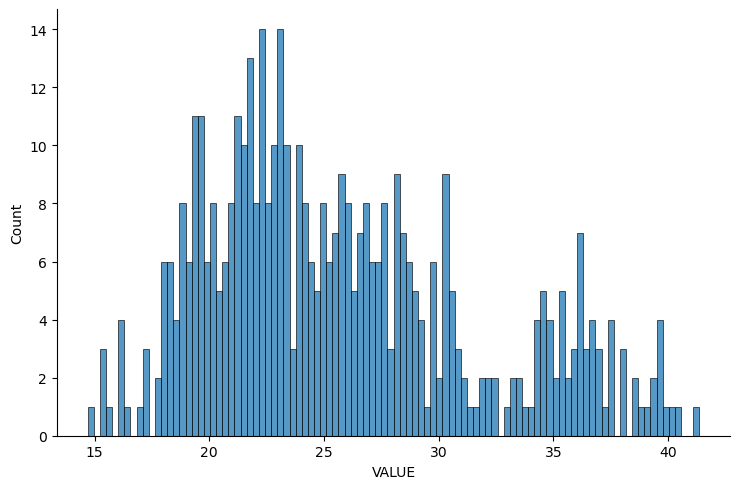

final_training_df_output_df_AvgHrsWages_ByEducation.csv


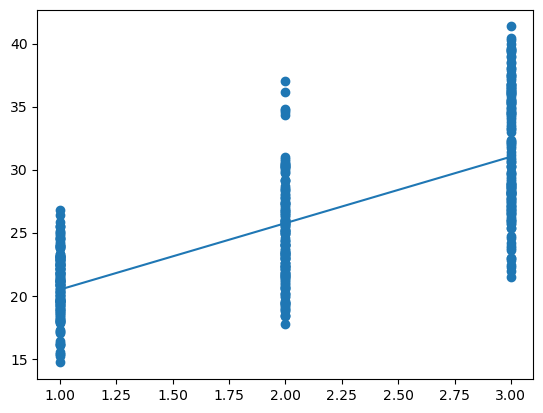

Done by Linear Regression
Higher the number, higher the education



In [25]:
dfa_to_cover = 1

dfa_Training_AvgHrsWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_AvgHrsWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgHrsWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average hourly wage' by Gender group

final_training_df_output_df_AvgHrsWages_ByGender.csv
                      sum       mean   amin  median   amax  size
Characteristics                                                 
Female employees  3835.41  25.569400  18.35  24.900  33.84   150
Male employees    4514.51  30.096733  20.18  29.625  40.06   150
Overall,
Sum :  8349.92
Mean :  27.833066666666667
Min/median/max : 18.35 / 27.545 / 40.06
Standard Deviation :  4.976384088427616
Skewnewss :  0.3231035192153794
Total size :  300

final_training_df_output_df_AvgHrsWages_ByGender.csv


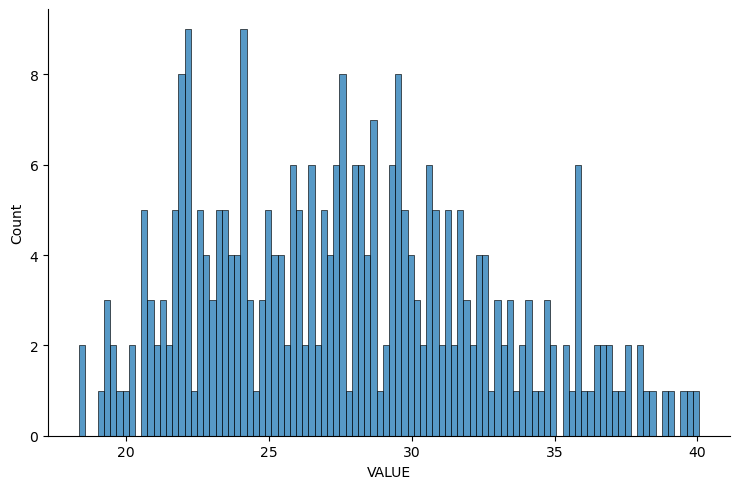

final_training_df_output_df_AvgHrsWages_ByGender.csv


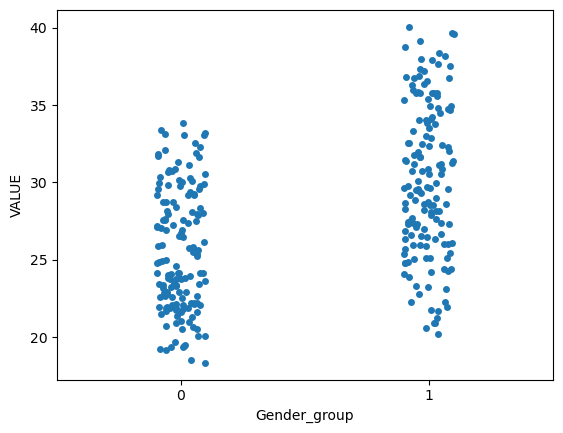

Done using Stripplot
[1, 0] = ['Male employees' 'Female employees']



In [26]:
dfa_to_cover = 2

dfa_Training_AvgHrsWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_AvgHrsWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgHrsWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average hourly wage' by Immigrant status

final_training_df_output_df_AvgHrsWages_ByImmigrant.csv
                             sum       mean   amin  median   amax  size
Characteristics                                                        
Immigrant employees      3983.72  26.558133  18.31  26.065  36.07   150
Non-immigrant employees  4115.40  27.436000  18.98  26.955  36.20   150
Overall,
Sum :  8099.120000000001
Mean :  26.99706666666667
Min/median/max : 18.31 / 26.8 / 36.2
Standard Deviation :  4.370814805299148
Skewnewss :  0.022394104021715048
Total size :  300

final_training_df_output_df_AvgHrsWages_ByImmigrant.csv


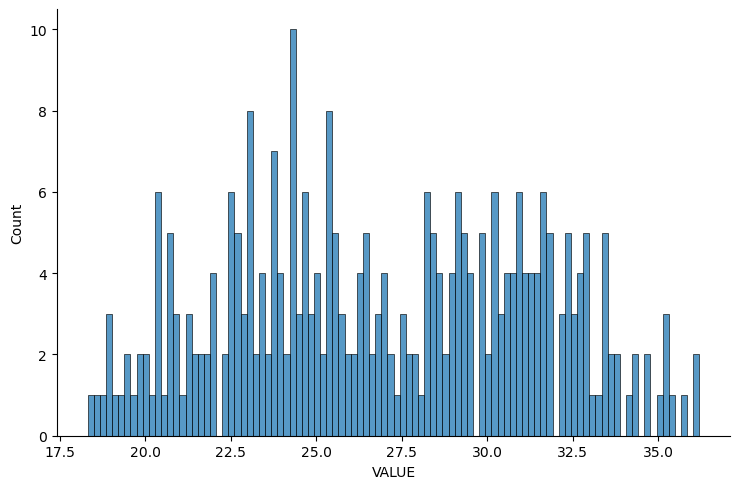

final_training_df_output_df_AvgHrsWages_ByImmigrant.csv


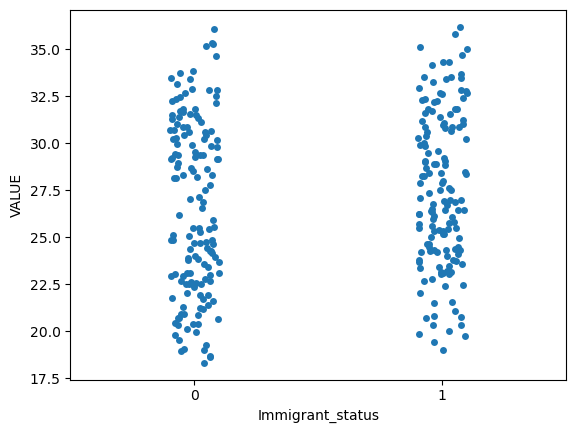

Done using Stripplot
[0, 1] = ['Immigrant employees' 'Non-immigrant employees']



In [27]:
dfa_to_cover = 3

dfa_Training_AvgHrsWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics. 
dfa_Training_AvgHrsWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgHrsWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average hourly wage' by yearly

final_training_df_output_df_AvgHrsWages_ByAge.csv


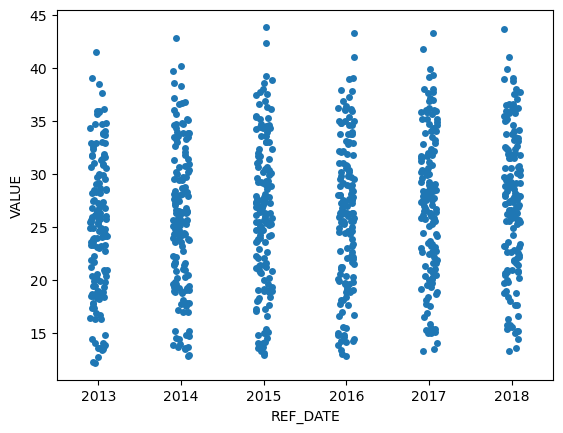

Done using Stripplot



In [28]:
dfa_to_cover = 0

dfa_Training_AvgHrsWages_To_Analysis.print_byYearlyGraph('REF_DATE',dfa_to_cover) # Print the possible classifier based on Yearly only on Age group.

Result for training set for 'Average weekly hours worked'

In [29]:
# Export dataset to analysis

dfa_Training_AvgWeekHrsWrked_To_Analysis = df_Final_TrainingDataset_AvgWeekHrsWrked
dfa_Training_AvgWeekHrsWrked_To_Analysis = Final_Target_To_Analysis(dfa_Training_AvgWeekHrsWrked_To_Analysis, pd, np, pp, sns, df_Final_TrainingDataset_AvgWeekHrsWrked_Name)

Result for training set for 'Average weekly hours worked' by Age group

final_training_df_output_df_AvgWeekHrsWrked_ByAge.csv
                          sum       mean  amin  median  amax  size
Characteristics                                                   
15 to 24 years         2600.0  17.333333  15.0    17.0  21.0   150
25 to 34 years         4653.0  31.020000  27.0    31.0  35.0   150
35 to 44 years         5070.0  33.800000  31.0    34.0  39.0   150
45 to 54 years         5266.0  35.106667  33.0    35.0  39.0   150
55 to 64 years         4844.0  32.293333  28.0    33.0  36.0   150
65 years old and over  3093.0  20.620000  15.0    21.0  26.0   150
Overall,
Sum :  25526.0
Mean :  28.362222222222222
Min/median/max : 15.0 / 32.0 / 39.0
Standard Deviation :  7.042088985801752
Skewnewss :  -0.6155335464799191
Total size :  900

final_training_df_output_df_AvgWeekHrsWrked_ByAge.csv


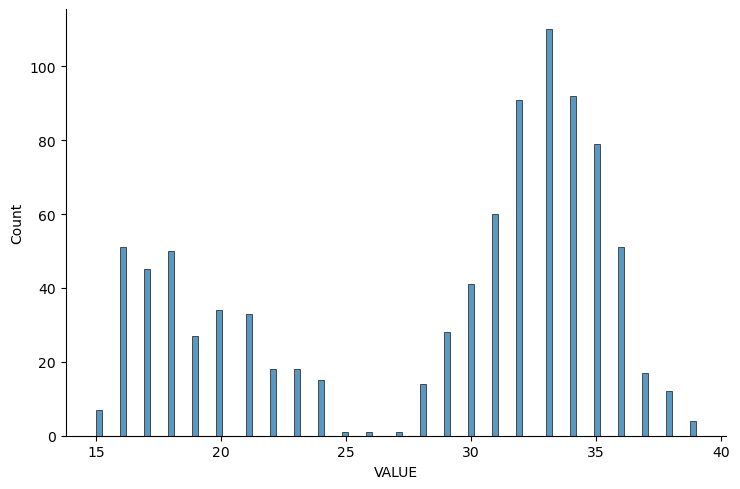

final_training_df_output_df_AvgWeekHrsWrked_ByAge.csv


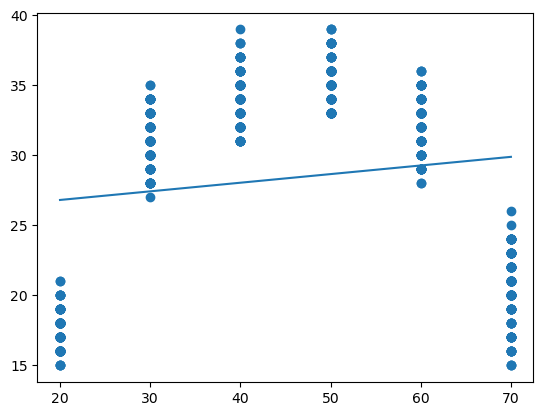

Done by Linear Regression



In [30]:
dfa_to_cover = 0

dfa_Training_AvgWeekHrsWrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_AvgWeekHrsWrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgWeekHrsWrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average weekly hours worked' by Education level

final_training_df_output_df_AvgWeekHrsWrked_ByEducation.csv
                                 sum   mean  amin  median  amax  size
Characteristics                                                      
High school diploma and less  3789.0  25.26  23.0    25.0  29.0   150
Trade certificate             4599.0  30.66  27.0    30.0  37.0   150
University degree and higher  4887.0  32.58  29.0    33.0  36.0   150
Overall,
Sum :  13275.0
Mean :  29.5
Min/median/max : 23.0 / 30.0 / 37.0
Standard Deviation :  3.5360052790307503
Skewnewss :  -0.23314391175228108
Total size :  450

final_training_df_output_df_AvgWeekHrsWrked_ByEducation.csv


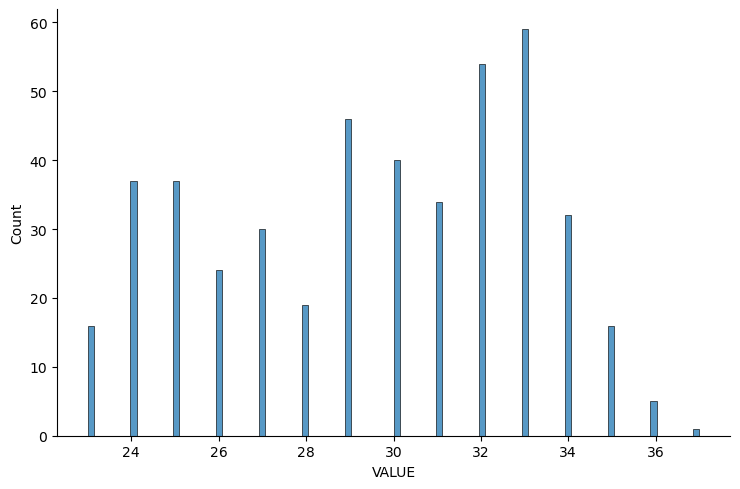

final_training_df_output_df_AvgWeekHrsWrked_ByEducation.csv


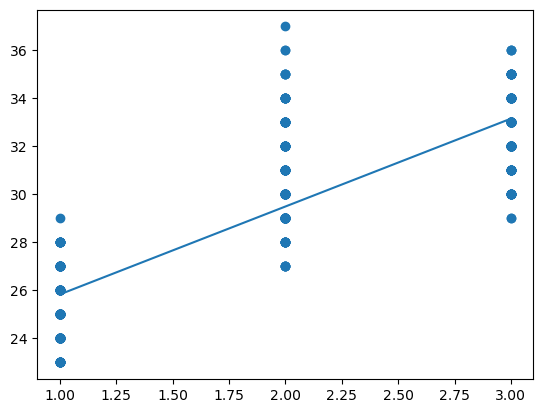

Done by Linear Regression
Higher the number, higher the education



In [31]:
dfa_to_cover = 1

dfa_Training_AvgWeekHrsWrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_AvgWeekHrsWrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgWeekHrsWrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average weekly hours worked' by Gender group

final_training_df_output_df_AvgWeekHrsWrked_ByGender.csv
                     sum       mean  amin  median  amax  size
Characteristics                                              
Female employees  4433.0  29.553333  27.0    30.0  33.0   150
Male employees    4759.0  31.726667  28.0    32.0  35.0   150
Overall,
Sum :  9192.0
Mean :  30.64
Min/median/max : 27.0 / 31.0 / 35.0
Standard Deviation :  1.7805617091243988
Skewnewss :  0.22978947914190143
Total size :  300

final_training_df_output_df_AvgWeekHrsWrked_ByGender.csv


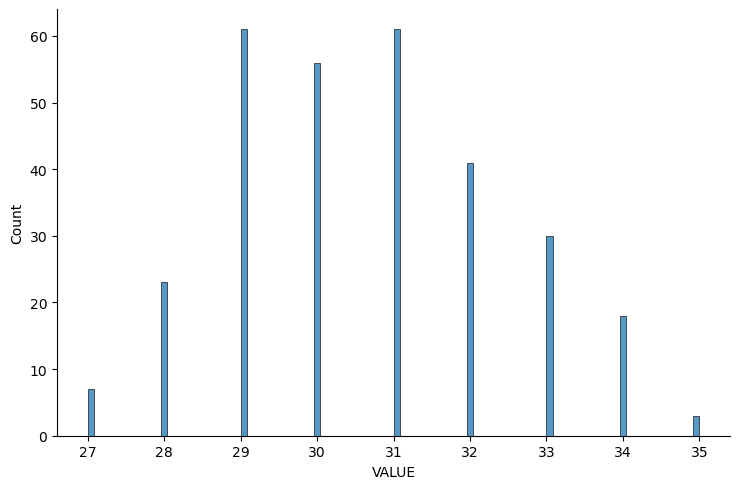

final_training_df_output_df_AvgWeekHrsWrked_ByGender.csv


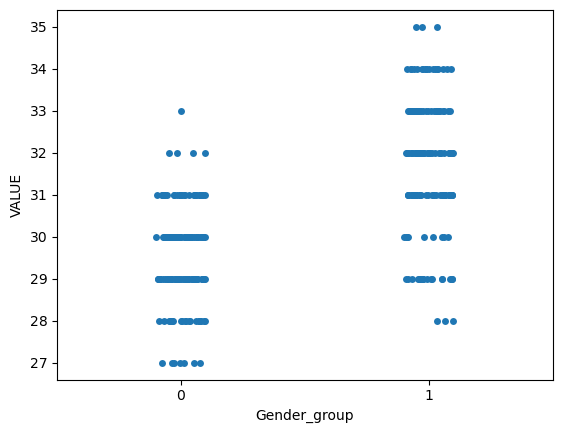

Done using Stripplot
[1, 0] = ['Male employees' 'Female employees']



In [32]:
dfa_to_cover = 2

dfa_Training_AvgWeekHrsWrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_AvgWeekHrsWrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgWeekHrsWrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average weekly hours worked' by Immigrant status

final_training_df_output_df_AvgWeekHrsWrked_ByImmigrant.csv
                            sum       mean  amin  median  amax  size
Characteristics                                                     
Immigrant employees      4590.0  30.600000  27.0    31.0  34.0   150
Non-immigrant employees  4538.0  30.253333  28.0    30.0  33.0   150
Overall,
Sum :  9128.0
Mean :  30.426666666666666
Min/median/max : 27.0 / 30.0 / 34.0
Standard Deviation :  1.37281543632865


Skewnewss :  -0.25767242569612453
Total size :  300

final_training_df_output_df_AvgWeekHrsWrked_ByImmigrant.csv


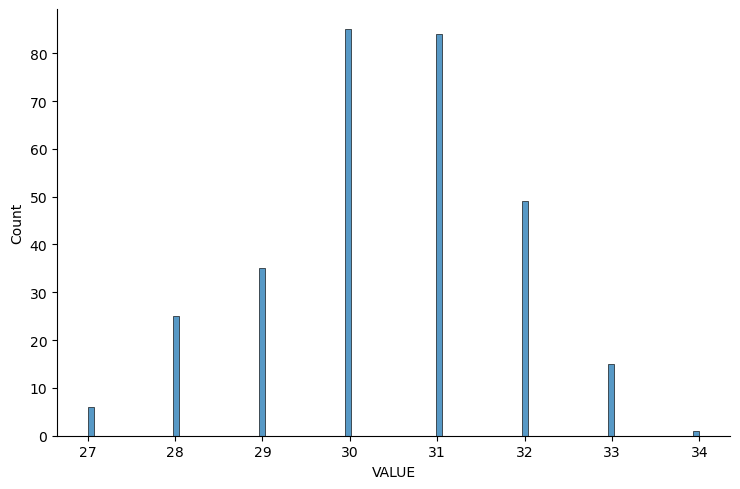

final_training_df_output_df_AvgWeekHrsWrked_ByImmigrant.csv


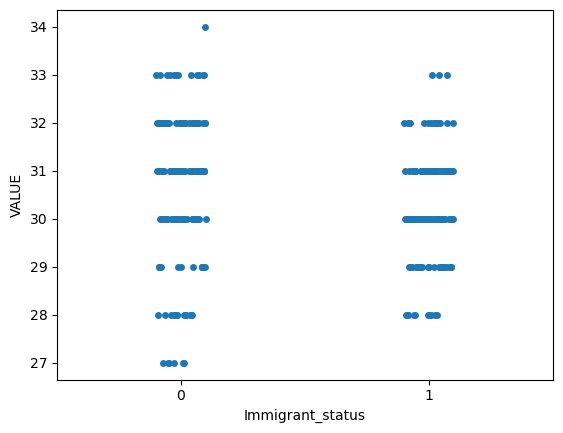

Done using Stripplot
[0, 1] = ['Immigrant employees' 'Non-immigrant employees']



In [33]:
dfa_to_cover = 3

dfa_Training_AvgWeekHrsWrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics. 
dfa_Training_AvgWeekHrsWrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_AvgWeekHrsWrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Average weekly hours worked' by yearly

final_training_df_output_df_AvgWeekHrsWrked_ByAge.csv


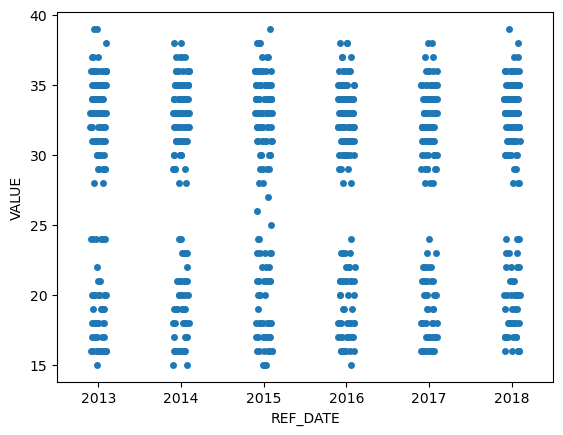

Done using Stripplot



In [34]:
dfa_to_cover = 0

dfa_Training_AvgWeekHrsWrked_To_Analysis.print_byYearlyGraph('REF_DATE',dfa_to_cover) # Print the possible classifier based on Yearly only on Age group.

Result for training set for 'Hours Worked'

In [35]:
# Export dataset to analysis

dfa_Training_Hrs_Wrked_To_Analysis = df_Final_TrainingDataset_Hrs_Wrked
dfa_Training_Hrs_Wrked_To_Analysis = Final_Target_To_Analysis(dfa_Training_Hrs_Wrked_To_Analysis, pd, np, pp, sns, df_Final_TrainingDataset_Hrs_Wrked_Name)

Result for training set for 'Hours Worked' by Age group

final_training_df_output_df_Hrs_Wrked_ByAge.csv
                              sum          mean    amin   median      amax  \
Characteristics                                                              
15 to 24 years          2719126.0  18127.506667   535.0  11590.0   78147.0   
25 to 34 years          9600660.0  64004.400000  1152.0  36040.5  293017.0   
35 to 44 years         10247380.0  68315.866667  1263.0  38111.0  295043.0   
45 to 54 years         11378267.0  75855.113333  1494.0  41809.0  326358.0   
55 to 64 years          8784267.0  58561.780000  1222.0  36229.0  256297.0   
65 years old and over   1855542.0  12370.280000   293.0   8725.0   60781.0   

                       size  
Characteristics              
15 to 24 years          150  
25 to 34 years          150  
35 to 44 years          150  
45 to 54 years          150  
55 to 64 years          150  
65 years old and over   150  
Overall,
Sum :  44585242.0
Mean :  49539.15777777778
Min/median/max : 293.0 / 25019.0 /

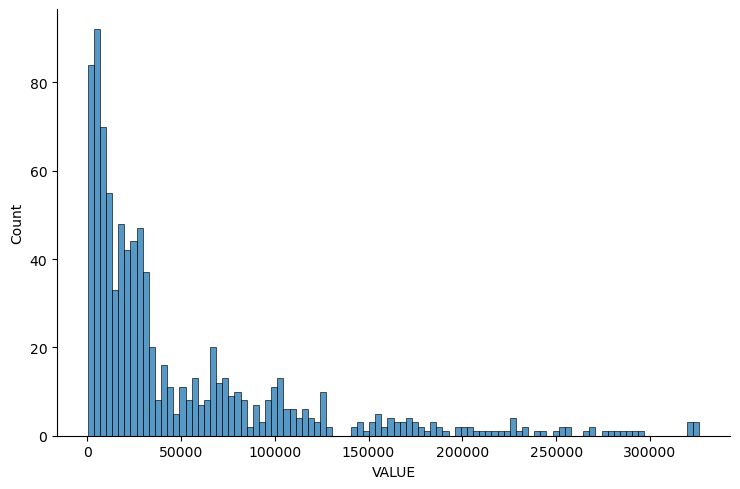

final_training_df_output_df_Hrs_Wrked_ByAge.csv


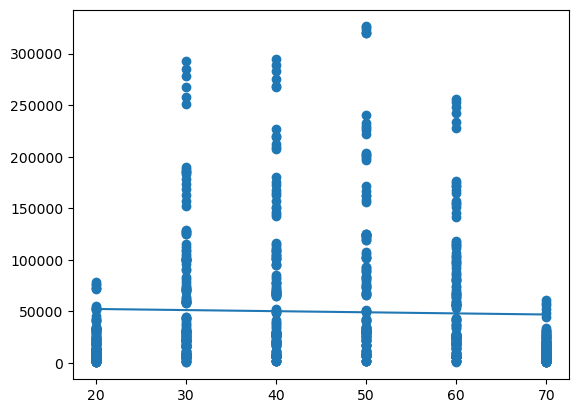

Done by Linear Regression



In [36]:
dfa_to_cover = 0

dfa_Training_Hrs_Wrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_Hrs_Wrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_Hrs_Wrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Hours Worked' by Education level

final_training_df_output_df_Hrs_Wrked_ByEducation.csv
                                     sum           mean    amin   median  \
Characteristics                                                            
High school diploma and less   7803209.0   52021.393333  1784.0  39292.0   
Trade certificate              3248257.0   21655.046667   432.0   9590.5   
University degree and higher  21744111.0  144960.740000  2286.0  83414.5   

                                  amax  size  
Characteristics                               
High school diploma and less  204285.0   150  
Trade certificate             144947.0   150  
University degree and higher  690772.0   150  
Overall,
Sum :  32795577.0
Mean :  72879.06
Min/median/max : 432.0 / 33426.5 / 690772.0
Standard Deviation :  107182.69127843132
Skewnewss :  2.9369474101299105
Total size :  450

final_training_df_output_df_Hrs_Wrked_ByEducation.csv


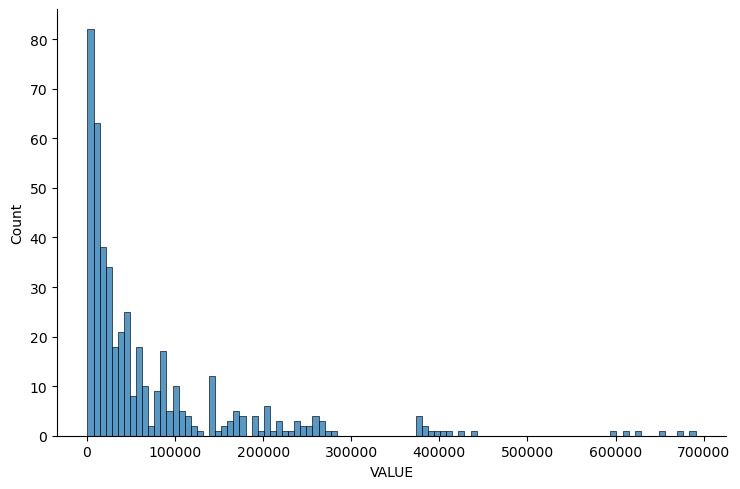

final_training_df_output_df_Hrs_Wrked_ByEducation.csv


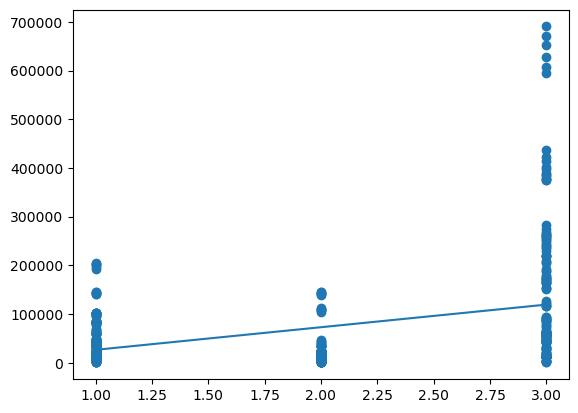

Done by Linear Regression
Higher the number, higher the education



In [37]:
dfa_to_cover = 1

dfa_Training_Hrs_Wrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_Hrs_Wrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_Hrs_Wrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Hours Worked' by Gender group

final_training_df_output_df_Hrs_Wrked_ByGender.csv
                         sum           mean    amin    median      amax  size
Characteristics                                                              
Female employees  30311675.0  202077.833333  3112.0  105051.0  895657.0   150
Male employees    14273551.0   95157.006667  2846.0   62764.5  408820.0   150
Overall,
Sum :  44585226.0
Mean :  148617.42
Min/median/max : 2846.0 / 81567.0 / 895657.0
Standard Deviation :  171139.07456750958
Skewnewss :  2.1081136675288215
Total size :  300

final_training_df_output_df_Hrs_Wrked_ByGender.csv


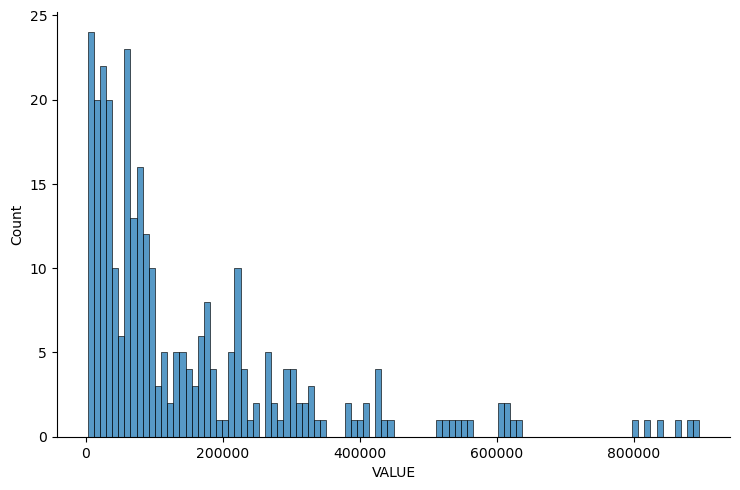

final_training_df_output_df_Hrs_Wrked_ByGender.csv


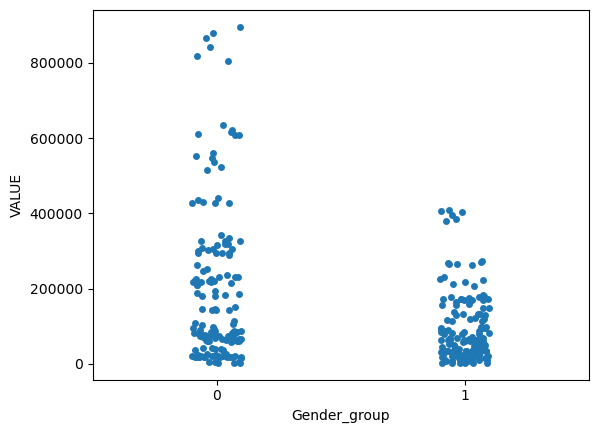

Done using Stripplot
[1, 0] = ['Male employees' 'Female employees']



In [38]:
dfa_to_cover = 2

dfa_Training_Hrs_Wrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_Hrs_Wrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_Hrs_Wrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Hours Worked' by Immigrant status

final_training_df_output_df_Hrs_Wrked_ByImmigrant.csv
                                sum           mean    amin    median  \
Characteristics                                                        
Immigrant employees      11740855.0   78272.366667   383.0   40398.5   
Non-immigrant employees  32844376.0  218962.506667  5575.0  122381.5   

                             amax  size  
Characteristics                          
Immigrant employees      416572.0   150  
Non-immigrant employees  887906.0   150  
Overall,
Sum :  44585231.0
Mean :  148617.43666666668
Min/median/max : 383.0 / 92827.0 / 887906.0
Standard Deviation :  181316.3963443442
Skewnewss :  2.137647936537422
Total size :  300

final_training_df_output_df_Hrs_Wrked_ByImmigrant.csv


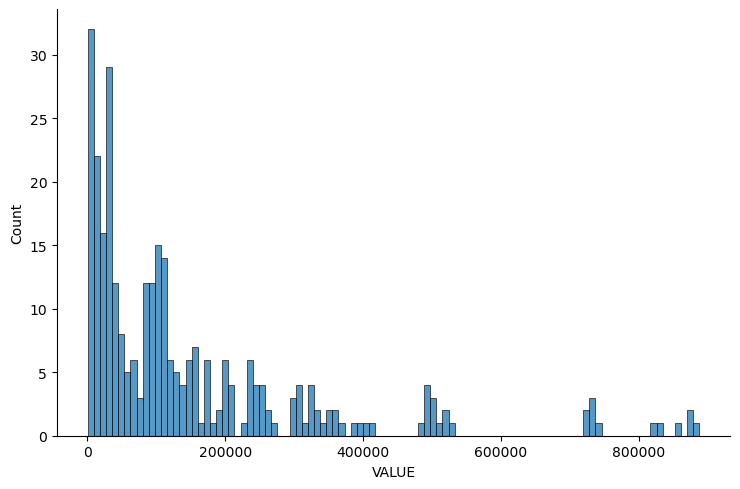

final_training_df_output_df_Hrs_Wrked_ByImmigrant.csv


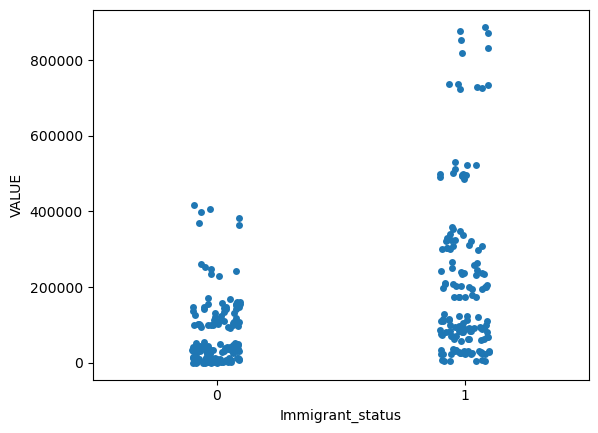

Done using Stripplot
[0, 1] = ['Immigrant employees' 'Non-immigrant employees']



In [39]:
dfa_to_cover = 3

dfa_Training_Hrs_Wrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics. 
dfa_Training_Hrs_Wrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_Hrs_Wrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Hours Worked' by yearly

final_training_df_output_df_Hrs_Wrked_ByAge.csv


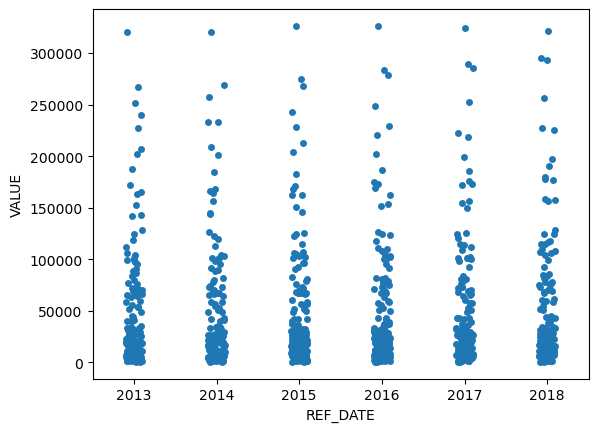

Done using Stripplot



In [40]:
dfa_to_cover = 0

dfa_Training_Hrs_Wrked_To_Analysis.print_byYearlyGraph('REF_DATE',dfa_to_cover) # Print the possible classifier based on Yearly only on Age group.

Result for training set for 'Number of jobs'

In [41]:
# Export dataset to analysis

dfa_Training_NumOfJob_To_Analysis = df_Final_TrainingDataset_NumOfJob
dfa_Training_NumOfJob_To_Analysis = Final_Target_To_Analysis(dfa_Training_NumOfJob_To_Analysis, pd, np, pp, sns, df_Final_TrainingDataset_NumOfJob_Name)

Result for training set for 'Number of jobs' by Age group

final_training_df_output_df_NumOfJob_ByAge.csv
                             sum          mean   amin   median      amax  size
Characteristics                                                               
15 to 24 years         3057917.0  20386.113333  641.0  12705.0   90604.0   150
25 to 34 years         6145624.0  40970.826667  659.0  22437.5  182572.0   150
35 to 44 years         5968195.0  39787.966667  642.0  22417.0  165893.0   150
45 to 54 years         6331442.0  42209.613333  761.0  23701.5  178195.0   150
55 to 64 years         5329300.0  35528.666667  677.0  22300.0  148422.0   150
65 years old and over  1799636.0  11997.573333  232.0   8614.5   57962.0   150
Overall,
Sum :  28632114.0
Mean :  31813.46
Min/median/max : 232.0 / 16462.0 / 182572.0
Standard Deviation :  36559.40712027725
Skewnewss :  1.896419734116702
Total size :  900

final_training_df_output_df_NumOfJob_ByAge.csv


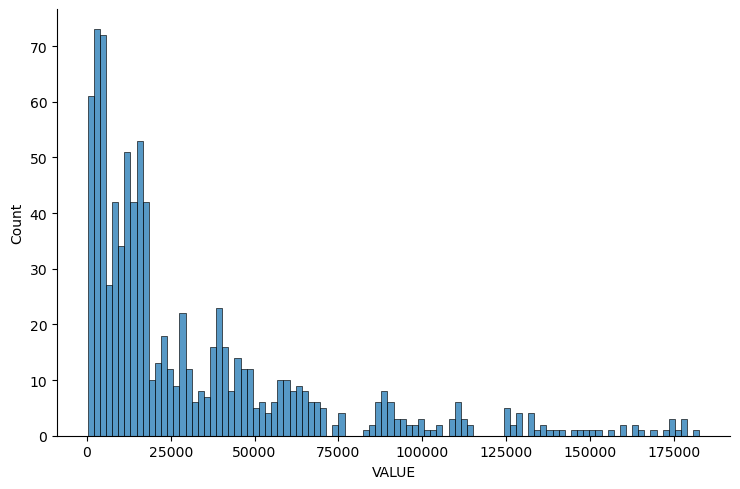

final_training_df_output_df_NumOfJob_ByAge.csv


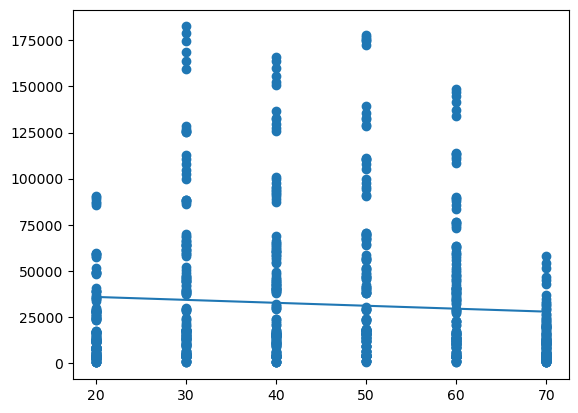

Done by Linear Regression



In [42]:
dfa_to_cover = 0

dfa_Training_NumOfJob_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_NumOfJob_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_NumOfJob_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Number of jobs' by Education level

final_training_df_output_df_NumOfJob_ByEducation.csv
                                     sum      mean    amin   median      amax  \
Characteristics                                                                 
High school diploma and less   6045324.0  40302.16  1290.0  30036.5  161201.0   
Trade certificate              2112990.0  14086.60   256.0   5900.0   95643.0   
University degree and higher  13120323.0  87468.82  1252.0  50011.0  408169.0   

                              size  
Characteristics                     
High school diploma and less   150  
Trade certificate              150  
University degree and higher   150  
Overall,
Sum :  21278637.0
Mean :  47285.86
Min/median/max : 256.0 / 22619.0 / 408169.0
Standard Deviation :  65877.93332510565
Skewnewss :  2.6693904866139992
Total size :  450

final_training_df_output_df_NumOfJob_ByEducation.csv


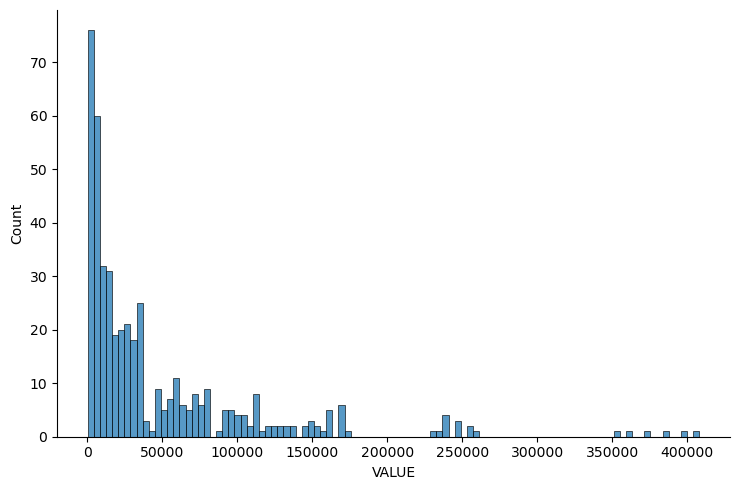

final_training_df_output_df_NumOfJob_ByEducation.csv


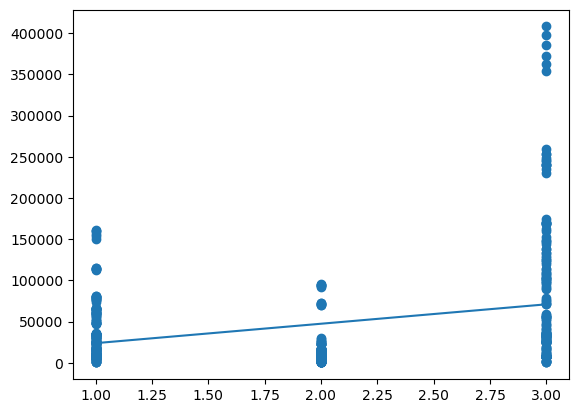

Done by Linear Regression
Higher the number, higher the education



In [43]:
dfa_to_cover = 1

dfa_Training_NumOfJob_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_NumOfJob_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_NumOfJob_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Number of jobs' by Gender group

final_training_df_output_df_NumOfJob_ByGender.csv
                         sum           mean    amin   median      amax  size
Characteristics                                                             
Female employees  19767860.0  131785.733333  1965.0  71485.0  562561.0   150
Male employees     8864256.0   59095.040000  1648.0  40827.5  255539.0   150
Overall,
Sum :  28632116.0
Mean :  95440.38666666667
Min/median/max : 1648.0 / 51998.0 / 562561.0
Standard Deviation :  110871.69390310507
Skewnewss :  2.0645548798194326
Total size :  300

final_training_df_output_df_NumOfJob_ByGender.csv


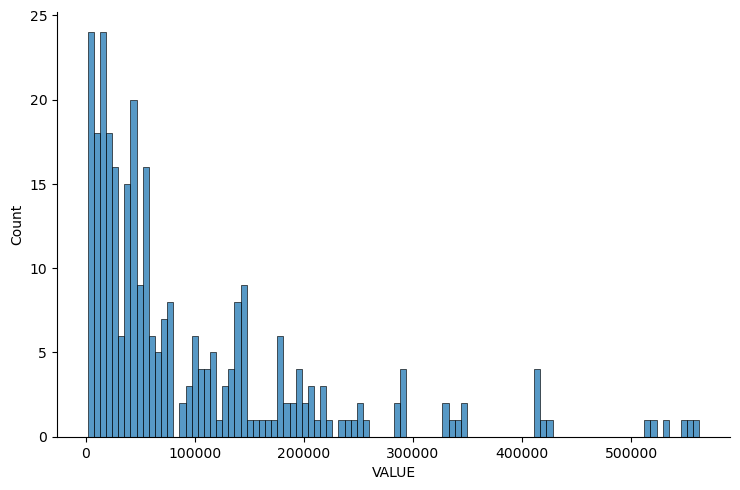

final_training_df_output_df_NumOfJob_ByGender.csv


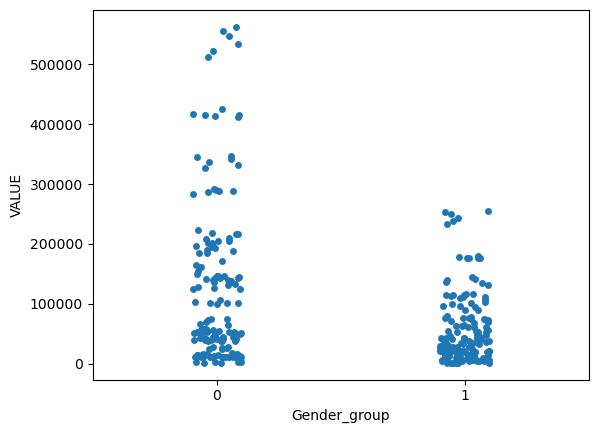

Done using Stripplot
[1, 0] = ['Male employees' 'Female employees']



In [44]:
dfa_to_cover = 2

dfa_Training_NumOfJob_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_NumOfJob_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_NumOfJob_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Number of jobs' by Immigrant status

final_training_df_output_df_NumOfJob_ByImmigrant.csv
                                sum       mean    amin   median      amax  \
Characteristics                                                             
Immigrant employees       7450563.0   49670.42   232.0  25259.5  259942.0   
Non-immigrant employees  21181545.0  141210.30  3381.0  79946.5  558158.0   

                         size  
Characteristics                
Immigrant employees       150  
Non-immigrant employees   150  
Overall,
Sum :  28632108.0
Mean :  95440.36
Min/median/max : 232.0 / 59064.0 / 558158.0
Standard Deviation :  117245.3090868475
Skewnewss :  2.1390462146317715
Total size :  300

final_training_df_output_df_NumOfJob_ByImmigrant.csv


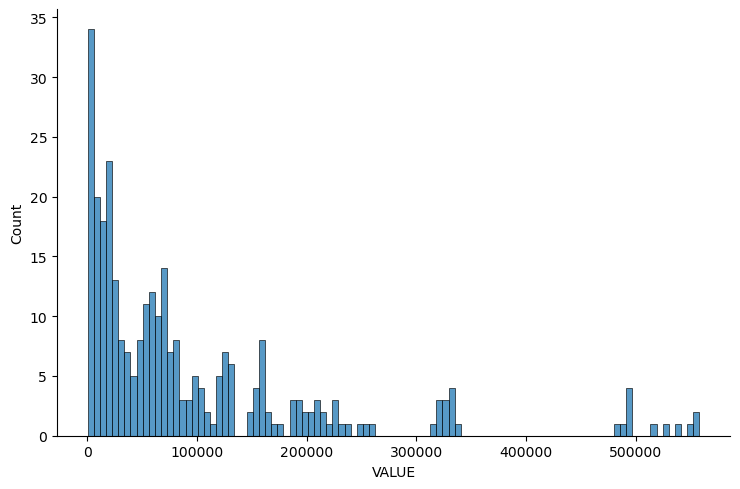

final_training_df_output_df_NumOfJob_ByImmigrant.csv


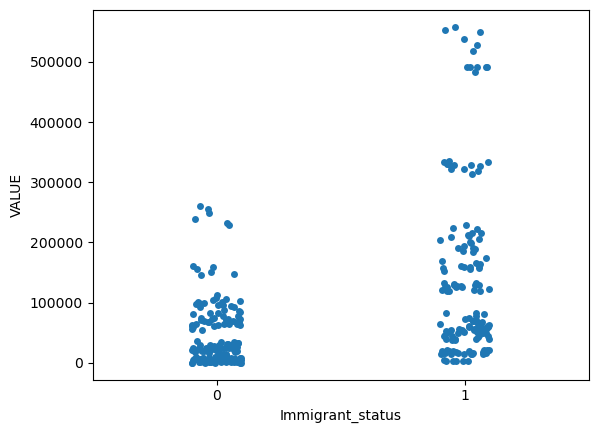

Done using Stripplot
[0, 1] = ['Immigrant employees' 'Non-immigrant employees']



In [45]:
dfa_to_cover = 3

dfa_Training_NumOfJob_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics. 
dfa_Training_NumOfJob_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_NumOfJob_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Number of jobs' by yearly

final_training_df_output_df_NumOfJob_ByAge.csv


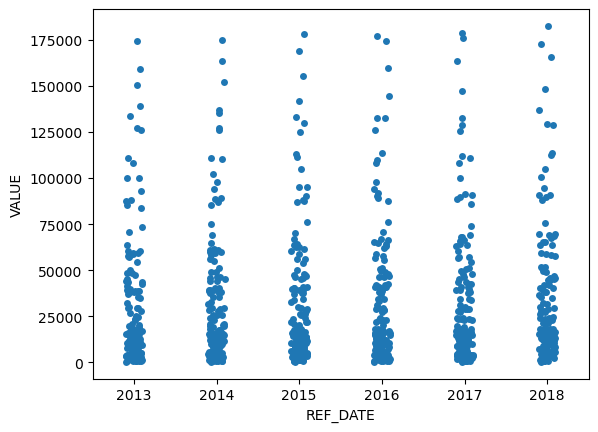

Done using Stripplot



In [46]:
dfa_to_cover = 0

dfa_Training_NumOfJob_To_Analysis.print_byYearlyGraph('REF_DATE',dfa_to_cover) # Print the possible classifier based on Yearly only on Age group.

Result for training set for 'Wages and Salaries'

In [47]:
# Export dataset to analysis

dfa_Training_WagesAndSalaries_To_Analysis = df_Final_TrainingDataset_WagesAndSalaries
dfa_Training_WagesAndSalaries_To_Analysis = Final_Target_To_Analysis(dfa_Training_WagesAndSalaries_To_Analysis, pd, np, pp, sns, df_Final_TrainingDataset_WagesAndSalaries_Name)

Result for training set for 'Wages and Salaries' by Age group

final_training_df_output_df_WagesAndSalaries_ByAge.csv
                            sum         mean  amin  median     amax  size
Characteristics                                                          
15 to 24 years          47137.0   314.246667   7.0   175.0   1470.0   150
25 to 34 years         235587.0  1570.580000  22.0   765.5   7788.0   150
35 to 44 years         311552.0  2077.013333  30.0   991.0   9789.0   150
45 to 54 years         368926.0  2459.506667  38.0  1179.0  11611.0   150
55 to 64 years         287219.0  1914.793333  30.0   957.5   9380.0   150
65 years old and over   60949.0   406.326667   6.0   211.5   2253.0   150
Overall,
Sum :  1311370.0
Mean :  1457.0777777777778
Min/median/max : 6.0 / 643.5 / 11611.0
Standard Deviation :  2014.6941616686454
Skewnewss :  2.2931030048594585
Total size :  900

final_training_df_output_df_WagesAndSalaries_ByAge.csv


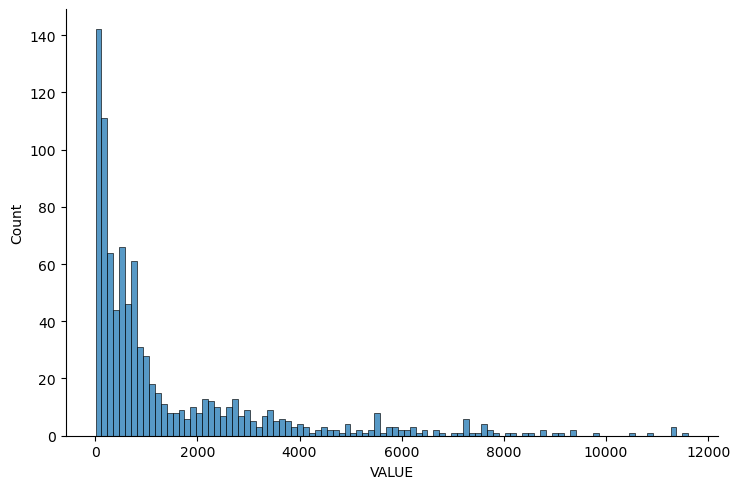

final_training_df_output_df_WagesAndSalaries_ByAge.csv


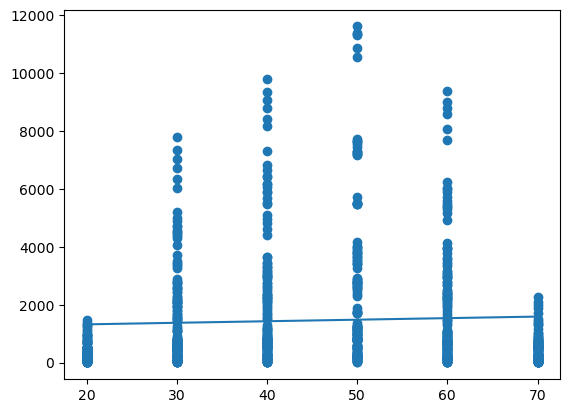

Done by Linear Regression



In [48]:
dfa_to_cover = 0

dfa_Training_WagesAndSalaries_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_WagesAndSalaries_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_WagesAndSalaries_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Wages and Salaries' by Education level

final_training_df_output_df_WagesAndSalaries_ByEducation.csv
                                   sum         mean  amin  median     amax  \
Characteristics                                                              
High school diploma and less  169153.0  1127.686667  32.0   810.5   4817.0   
Trade certificate              77144.0   514.293333  11.0   237.5   3428.0   
University degree and higher  748971.0  4993.140000  59.0  2313.0  25744.0   

                              size  
Characteristics                     
High school diploma and less   150  
Trade certificate              150  
University degree and higher   150  
Overall,
Sum :  995268.0
Mean :  2211.7066666666665
Min/median/max : 11.0 / 736.0 / 25744.0
Standard Deviation :  3884.0913272475977
Skewnewss :  3.2920245663085392
Total size :  450

final_training_df_output_df_WagesAndSalaries_ByEducation.csv


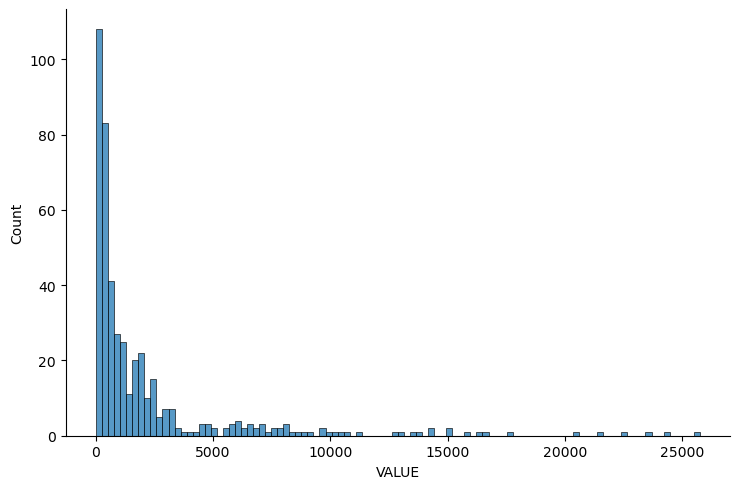

final_training_df_output_df_WagesAndSalaries_ByEducation.csv


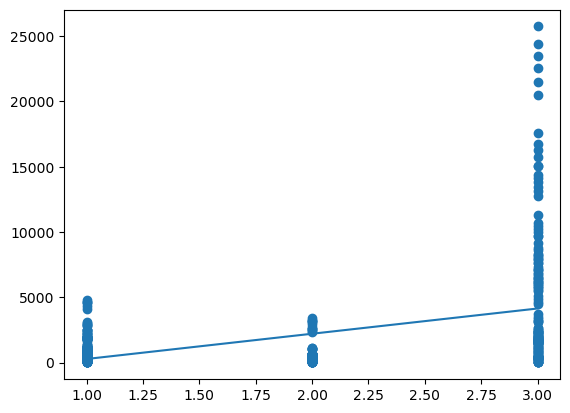

Done by Linear Regression
Higher the number, higher the education



In [49]:
dfa_to_cover = 1

dfa_Training_WagesAndSalaries_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_WagesAndSalaries_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_WagesAndSalaries_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Wages and Salaries' by Gender group

final_training_df_output_df_WagesAndSalaries_ByGender.csv


                       sum         mean  amin  median     amax  size
Characteristics                                                     
Female employees  851300.0  5675.333333  64.0  2496.0  27632.0   150
Male employees    460089.0  3067.260000  69.0  1736.0  14658.0   150
Overall,
Sum :  1311389.0
Mean :  4371.296666666667
Min/median/max : 64.0 / 2119.5 / 27632.0
Standard Deviation :  5223.065145613467
Skewnewss :  2.0696921659920022
Total size :  300

final_training_df_output_df_WagesAndSalaries_ByGender.csv


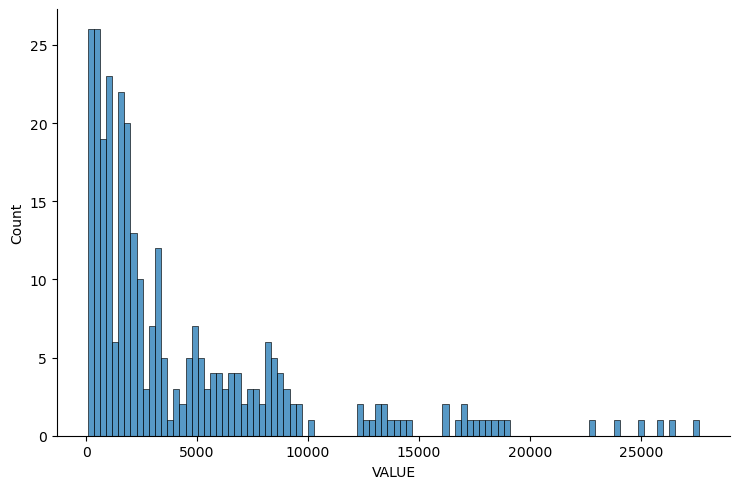

final_training_df_output_df_WagesAndSalaries_ByGender.csv


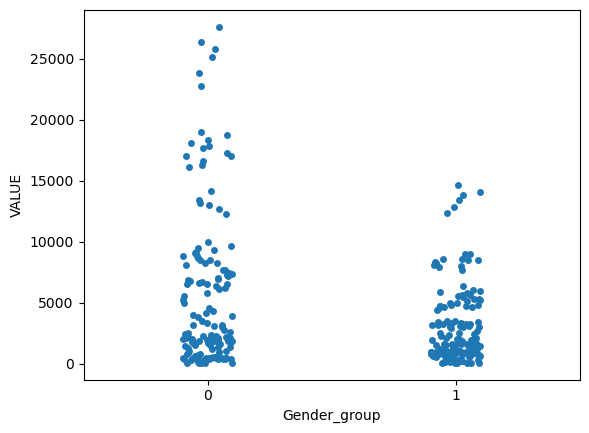

Done using Stripplot
[1, 0] = ['Male employees' 'Female employees']



In [50]:
dfa_to_cover = 2

dfa_Training_WagesAndSalaries_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Training_WagesAndSalaries_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_WagesAndSalaries_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Wages and Salaries' by Immigrant status

final_training_df_output_df_WagesAndSalaries_ByImmigrant.csv
                              sum         mean   amin  median     amax  size
Characteristics                                                             
Immigrant employees      346095.0  2307.300000    8.0   946.0  13615.0   150
Non-immigrant employees  965287.0  6435.246667  125.0  3170.0  28675.0   150
Overall,
Sum :  1311382.0
Mean :  4371.2733333333335
Min/median/max : 8.0 / 2572.5 / 28675.0
Standard Deviation :  5653.592910585464
Skewnewss :  2.166783039038631
Total size :  300

final_training_df_output_df_WagesAndSalaries_ByImmigrant.csv


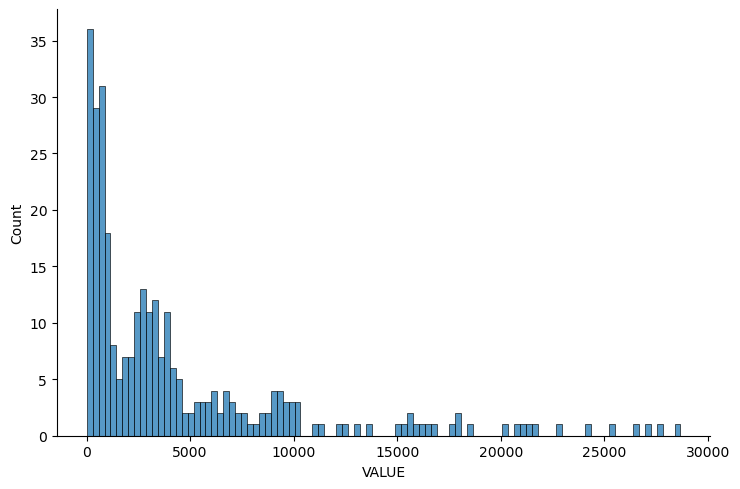

final_training_df_output_df_WagesAndSalaries_ByImmigrant.csv


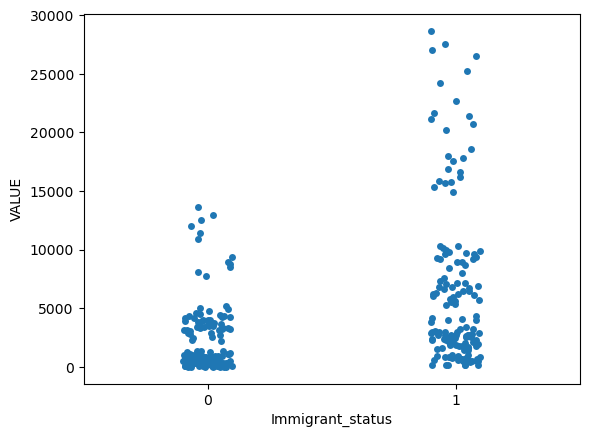

Done using Stripplot
[0, 1] = ['Immigrant employees' 'Non-immigrant employees']



In [51]:
dfa_to_cover = 3

dfa_Training_WagesAndSalaries_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics. 
dfa_Training_WagesAndSalaries_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Training_WagesAndSalaries_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for training set for 'Wages and Salaries' by yearly

final_training_df_output_df_WagesAndSalaries_ByAge.csv


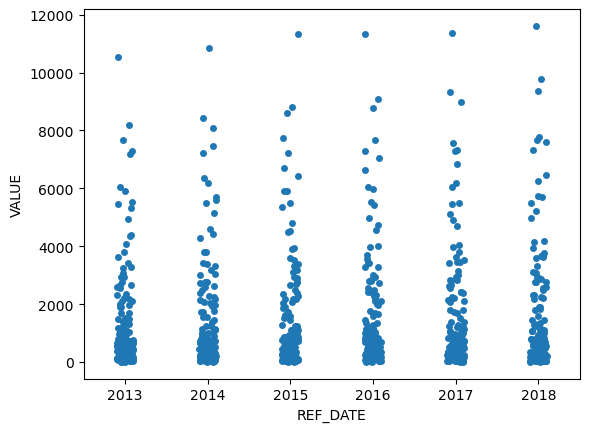

Done using Stripplot



In [52]:
dfa_to_cover = 0

dfa_Training_WagesAndSalaries_To_Analysis.print_byYearlyGraph('REF_DATE',dfa_to_cover) # Print the possible classifier based on Yearly only on Age group.

<h3> Testing set</h3>

Start run above code to return all of the testing dataset. 

In [53]:
df_Final_TestingDataset = exportCSV_finalDataset(df_Testing_Dataset)

Split the dataset based on 'Seven Indicators'.

In [54]:
# If the code cannot run, it will give a error.

# df_AvgAnnHrsWrk_2013
df_Final_TestingDataset_AvgAnnHrsWrk = df_Final_TestingDataset.getSpecificIndicator(0)
df_Final_TestingDataset_AvgAnnHrsWrk_Name = df_Final_TestingDataset.getSpecificIndicatorName(0)

# df_AvgAnnWages # Average annual wages and salaries
df_Final_TestingDataset_AvgAnnWages = df_Final_TestingDataset.getSpecificIndicator(1)
df_Final_TestingDataset_AvgAnnWages_Name = df_Final_TestingDataset.getSpecificIndicatorName(1)

# df_AvgHrsWages # Average hourly wage
df_Final_TestingDataset_AvgHrsWages = df_Final_TestingDataset.getSpecificIndicator(2)
df_Final_TestingDataset_AvgHrsWages_Name = df_Final_TestingDataset.getSpecificIndicatorName(2)

# df_AvgWeekHrsWrked # Average weekly hours worked
df_Final_TestingDataset_AvgWeekHrsWrked = df_Final_TestingDataset.getSpecificIndicator(3)
df_Final_TestingDataset_AvgWeekHrsWrked_Name = df_Final_TestingDataset.getSpecificIndicatorName(3)

# df_Hrs_Wrked # Hours Worked
df_Final_TestingDataset_Hrs_Wrked = df_Final_TestingDataset.getSpecificIndicator(4)
df_Final_TestingDataset_Hrs_Wrked_Name = df_Final_TestingDataset.getSpecificIndicatorName(4)

# df_NumOfJob # Number of jobs
df_Final_TestingDataset_NumOfJob = df_Final_TestingDataset.getSpecificIndicator(5)
df_Final_TestingDataset_NumOfJob_Name = df_Final_TestingDataset.getSpecificIndicatorName(5)

# df_WagesAndSalaries # Wages and Salaries
df_Final_TestingDataset_WagesAndSalaries = df_Final_TestingDataset.getSpecificIndicator(6)
df_Final_TestingDataset_WagesAndSalaries_Name = df_Final_TestingDataset.getSpecificIndicatorName(6)

['final_testing_df_output_df_AvgAnnHrsWrk_ByAge.csv', 'final_testing_df_output_df_AvgAnnHrsWrk_ByEducation.csv', 'final_testing_df_output_df_AvgAnnHrsWrk_ByGender.csv', 'final_testing_df_output_df_AvgAnnHrsWrk_ByImmigrant.csv']
['final_testing_df_output_df_AvgAnnWages_ByAge.csv', 'final_testing_df_output_df_AvgAnnWages_ByEducation.csv', 'final_testing_df_output_df_AvgAnnWages_ByGender.csv', 'final_testing_df_output_df_AvgAnnWages_ByImmigrant.csv']
['final_testing_df_output_df_AvgHrsWages_ByAge.csv', 'final_testing_df_output_df_AvgHrsWages_ByEducation.csv', 'final_testing_df_output_df_AvgHrsWages_ByGender.csv', 'final_testing_df_output_df_AvgHrsWages_ByImmigrant.csv']
['final_testing_df_output_df_AvgWeekHrsWrked_ByAge.csv', 'final_testing_df_output_df_AvgWeekHrsWrked_ByEducation.csv', 'final_testing_df_output_df_AvgWeekHrsWrked_ByGender.csv', 'final_testing_df_output_df_AvgWeekHrsWrked_ByImmigrant.csv']
['final_testing_df_output_df_Hrs_Wrked_ByAge.csv', 'final_testing_df_output_df_Hrs_W

Result for testing set for'Average annual hours worked'

In [55]:
# Export dataset to analysis

dfa_Testing_AvgAnnHrsWrk_To_Analysis = df_Final_TestingDataset_AvgAnnHrsWrk
dfa_Testing_AvgAnnHrsWrk_To_Analysis = Final_Target_To_Analysis(dfa_Testing_AvgAnnHrsWrk_To_Analysis, pd, np, pp, sns, df_Final_TestingDataset_AvgAnnHrsWrk_Name)

Result for testing set for'Average annual hours worked' by Age group

final_testing_df_output_df_AvgAnnHrsWrk_ByAge.csv
                            sum         mean    amin  median    amax  size
Characteristics                                                           
15 to 24 years          67850.0   904.666667   823.0   897.0  1020.0    75
25 to 34 years         119194.0  1589.253333  1438.0  1579.0  1779.0    75
35 to 44 years         130076.0  1734.346667  1615.0  1732.0  1958.0    75
45 to 54 years         136664.0  1822.186667  1697.0  1821.0  2031.0    75
55 to 64 years         124987.0  1666.493333  1515.0  1676.0  1810.0    75
65 years old and over   80225.0  1069.666667   867.0  1085.0  1242.0    75
Overall,
Sum :  658996.0
Mean :  1464.4355555555555
Min/median/max : 823.0 / 1626.0 / 2031.0
Standard Deviation :  356.3536590121646
Skewnewss :  -0.5806984535776861
Total size :  450

final_testing_df_output_df_AvgAnnHrsWrk_ByAge.csv


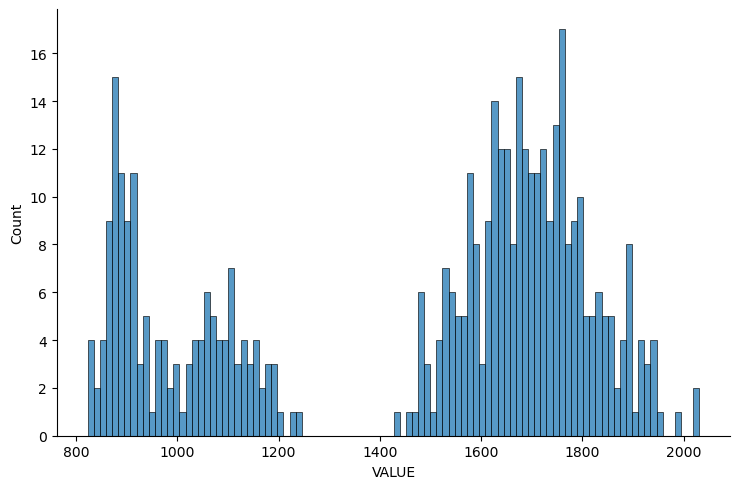

final_testing_df_output_df_AvgAnnHrsWrk_ByAge.csv


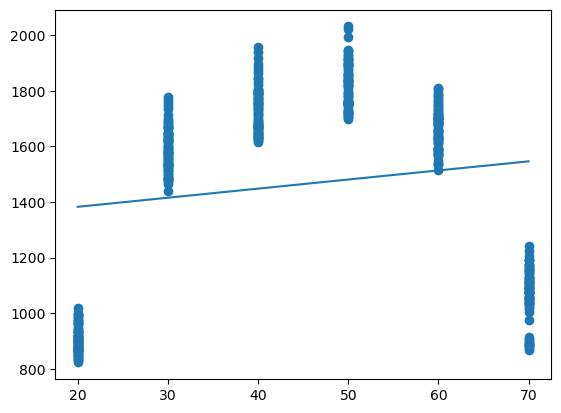

Done by Linear Regression



In [56]:
dfa_to_cover = 0

dfa_Testing_AvgAnnHrsWrk_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_AvgAnnHrsWrk_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgAnnHrsWrk_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average annual hours worked' by Education level

final_testing_df_output_df_AvgAnnHrsWrk_ByEducation.csv
                                   sum         mean    amin  median    amax  \
Characteristics                                                               
High school diploma and less   97223.0  1296.306667  1171.0  1285.0  1460.0   
Trade certificate             116506.0  1553.413333  1396.0  1538.0  1808.0   
University degree and higher  126305.0  1684.066667  1544.0  1684.0  1837.0   

                              size  
Characteristics                     
High school diploma and less    75  
Trade certificate               75  
University degree and higher    75  
Overall,
Sum :  340034.0
Mean :  1511.2622222222221
Min/median/max : 1171.0 / 1538.0 / 1837.0
Standard Deviation :  176.936517540914
Skewnewss :  -0.22126026577868005
Total size :  225

final_testing_df_output_df_AvgAnnHrsWrk_ByEducation.csv


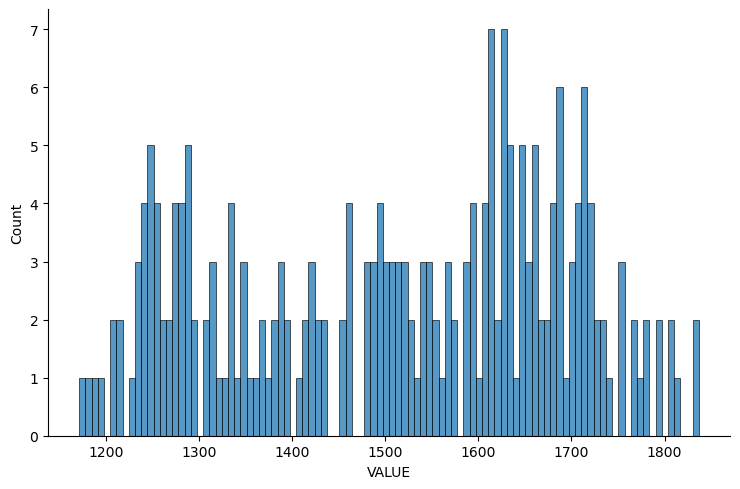

final_testing_df_output_df_AvgAnnHrsWrk_ByEducation.csv


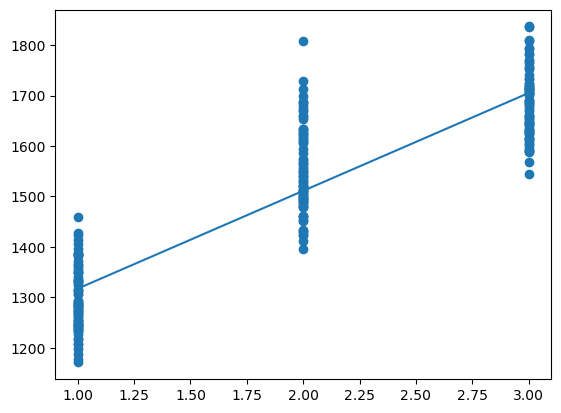

Done by Linear Regression
Higher the number, higher the education



In [57]:
dfa_to_cover = 1

dfa_Testing_AvgAnnHrsWrk_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_AvgAnnHrsWrk_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgAnnHrsWrk_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average annual hours worked' by Gender group


final_testing_df_output_df_AvgAnnHrsWrk_ByGender.csv
                       sum         mean    amin  median    amax  size
Characteristics                                                      
Female employees  115375.0  1538.333333  1437.0  1532.0  1671.0    75
Male employees    122021.0  1626.946667  1481.0  1631.0  1770.0    75
Overall,
Sum :  237396.0
Mean :  1582.64
Min/median/max : 1437.0 / 1583.5 / 1770.0
Standard Deviation :  77.0804151519697
Skewnewss :  0.11983152740265923
Total size :  150

final_testing_df_output_df_AvgAnnHrsWrk_ByGender.csv


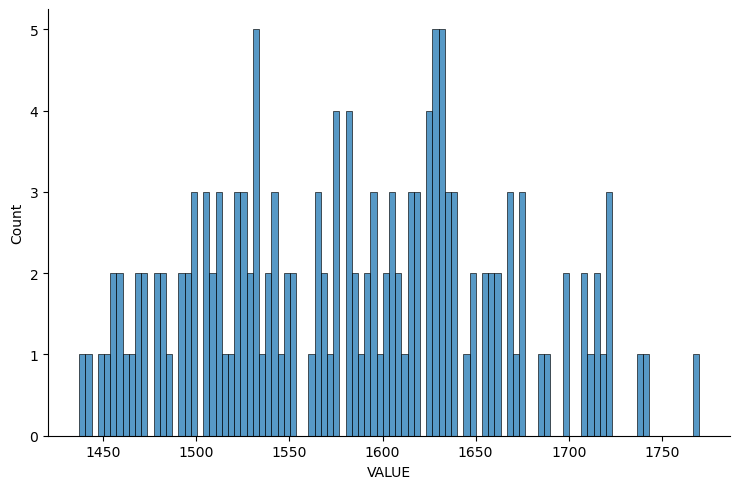

final_testing_df_output_df_AvgAnnHrsWrk_ByGender.csv


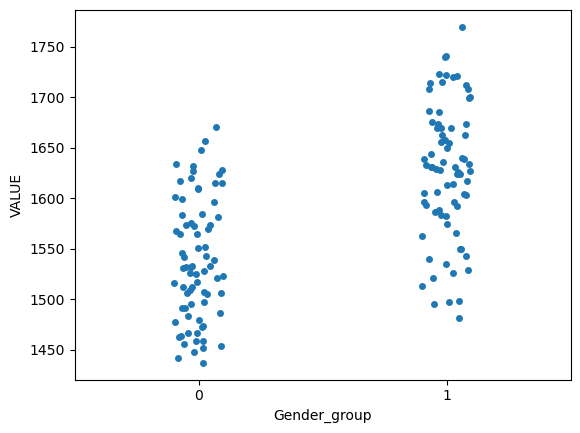

Done using Stripplot
[1, 0] = ['Male employees' 'Female employees']



In [58]:
dfa_to_cover = 2

dfa_Testing_AvgAnnHrsWrk_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_AvgAnnHrsWrk_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgAnnHrsWrk_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average annual hours worked' by Immigrant status

final_testing_df_output_df_AvgAnnHrsWrk_ByImmigrant.csv
                              sum         mean    amin  median    amax  size
Characteristics                                                             
Immigrant employees      117967.0  1572.893333  1412.0  1583.0  1697.0    75
Non-immigrant employees  117437.0  1565.826667  1458.0  1564.0  1691.0    75
Overall,
Sum :  235404.0
Mean :  1569.36
Min/median/max : 1412.0 / 1571.5 / 1697.0
Standard Deviation :  60.9140684352419
Skewnewss :  -0.023261406680708266
Total size :  150

final_testing_df_output_df_AvgAnnHrsWrk_ByImmigrant.csv


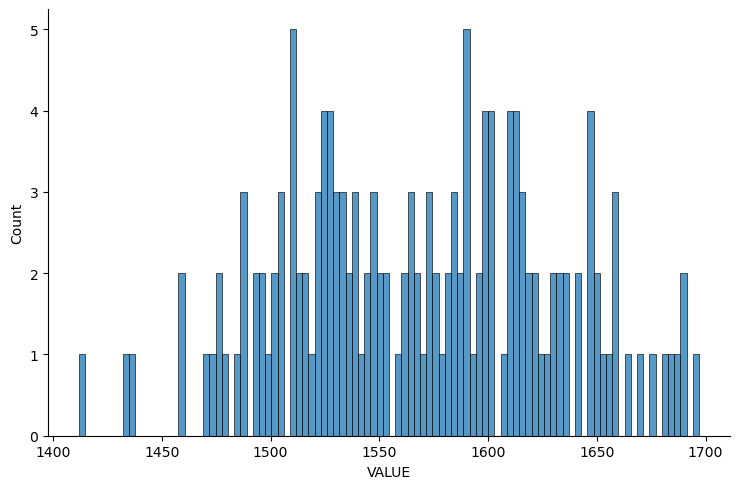

final_testing_df_output_df_AvgAnnHrsWrk_ByImmigrant.csv


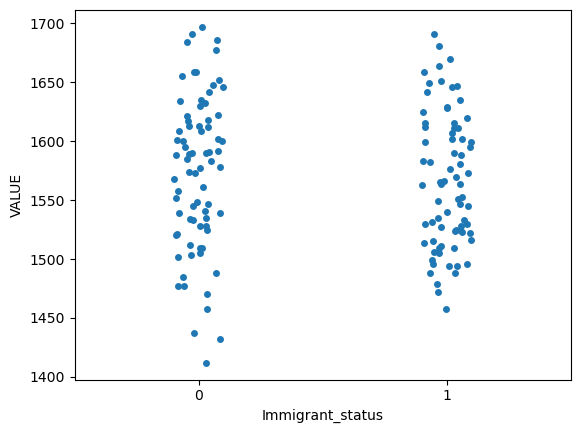

Done using Stripplot
[0, 1] = ['Immigrant employees' 'Non-immigrant employees']



In [59]:
dfa_to_cover = 3

dfa_Testing_AvgAnnHrsWrk_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics. 
dfa_Testing_AvgAnnHrsWrk_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgAnnHrsWrk_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average annual hours worked' by yearly

final_testing_df_output_df_AvgAnnHrsWrk_ByAge.csv


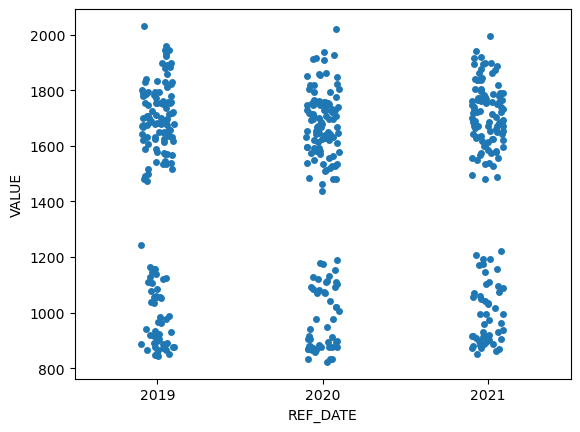

Done using Stripplot



In [60]:
dfa_to_cover = 0

dfa_Testing_AvgAnnHrsWrk_To_Analysis.print_byYearlyGraph('REF_DATE',dfa_to_cover) # Print the possible classifier based on Yearly only on Age group.

Result for testing set for'Average annual wages and salaries'

In [61]:
# Export dataset to analysis

dfa_Testing_AvgAnnWages_To_Analysis = df_Final_TestingDataset_AvgAnnWages
dfa_Testing_AvgAnnWages_To_Analysis = Final_Target_To_Analysis(dfa_Testing_AvgAnnWages_To_Analysis, pd, np, pp, sns, df_Final_TestingDataset_AvgAnnWages_Name)

Result for testing set for'Average annual wages and salaries' by Age group

final_testing_df_output_df_AvgAnnWages_ByAge.csv
                             sum          mean     amin   median     amax  \
Characteristics                                                             
15 to 24 years         1286809.0  17157.453333  12468.0  16497.0  24382.0   
25 to 34 years         3134044.0  41787.253333  30721.0  42140.0  50918.0   
35 to 44 years         4169234.0  55589.786667  40250.0  56501.0  70618.0   
45 to 54 years         4721272.0  62950.293333  43944.0  63689.0  83894.0   
55 to 64 years         4284136.0  57121.813333  38066.0  56400.0  77141.0   
65 years old and over  2675845.0  35677.933333  20934.0  35117.0  50445.0   

                       size  
Characteristics              
15 to 24 years           75  
25 to 34 years           75  
35 to 44 years           75  
45 to 54 years           75  
55 to 64 years           75  
65 years old and over    75  
Overall,
Sum :  20271340.0
Mean :  45047.42222222222
Min/median/max : 12468.0 / 46985.0 / 8389

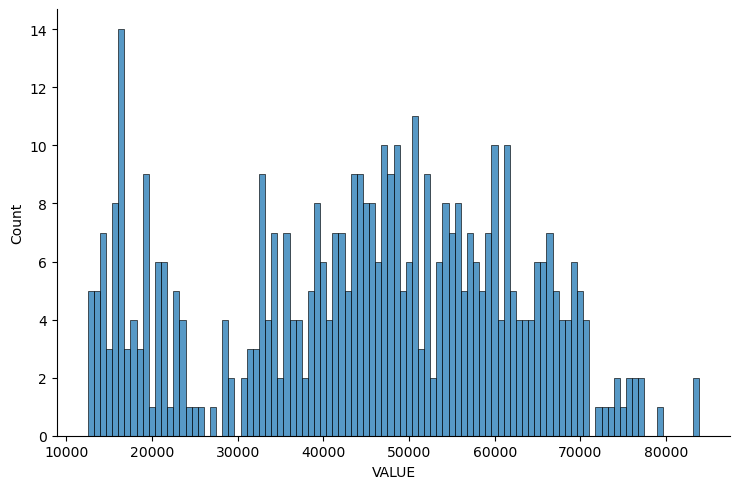

final_testing_df_output_df_AvgAnnWages_ByAge.csv


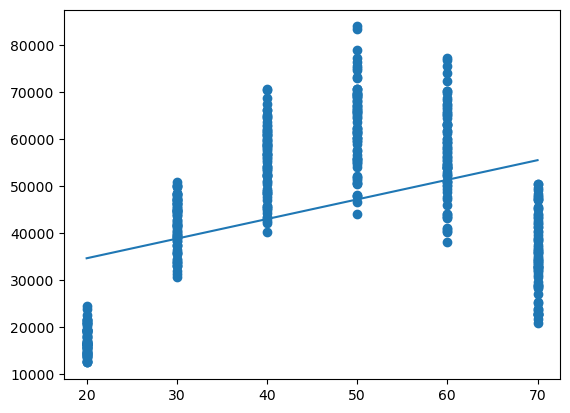

Done by Linear Regression



In [62]:
dfa_to_cover = 0

dfa_Testing_AvgAnnWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_AvgAnnWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgAnnWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average annual wages and salaries' by Education level

final_testing_df_output_df_AvgAnnWages_ByEducation.csv
                                    sum          mean     amin   median  \
Characteristics                                                           
High school diploma and less  2355715.0  31409.533333  20536.0  31272.0   
Trade certificate             3308944.0  44119.253333  29523.0  43448.0   
University degree and higher  4469360.0  59591.466667  42833.0  61166.0   

                                 amax  size  
Characteristics                              
High school diploma and less  41040.0    75  
Trade certificate             66374.0    75  
University degree and higher  76827.0    75  
Overall,
Sum :  10134019.0
Mean :  45040.084444444445
Min/median/max : 20536.0 / 43197.0 / 76827.0
Standard Deviation :  13473.728814811864
Skewnewss :  0.3611910342438643
Total size :  225

final_testing_df_output_df_AvgAnnWages_ByEducation.csv


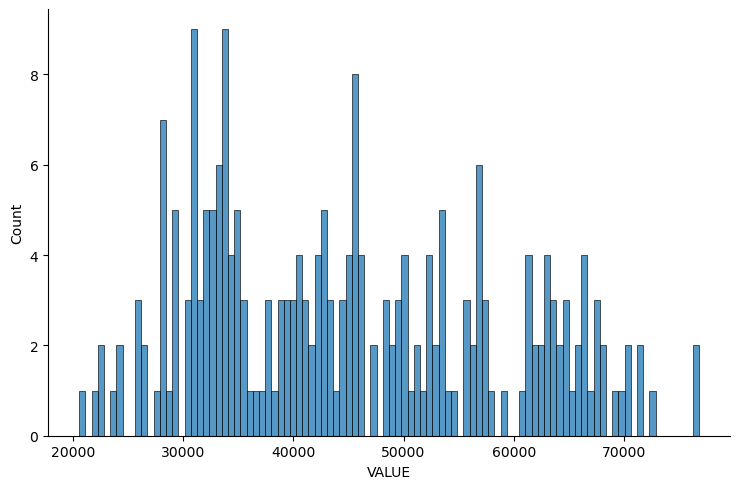

final_testing_df_output_df_AvgAnnWages_ByEducation.csv


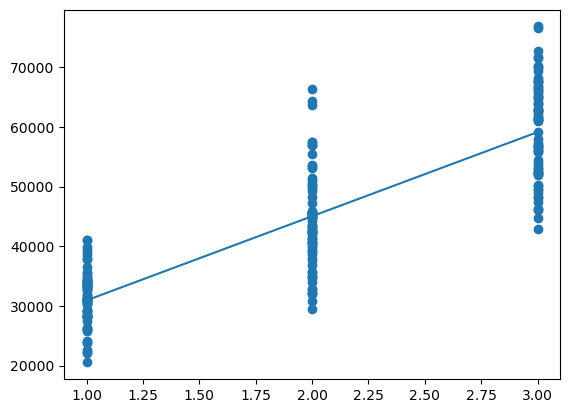

Done by Linear Regression
Higher the number, higher the education



In [63]:
dfa_to_cover = 1

dfa_Testing_AvgAnnWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_AvgAnnWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgAnnWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average annual wages and salaries' by Gender group

final_testing_df_output_df_AvgAnnWages_ByGender.csv
                        sum          mean     amin   median     amax  size
Characteristics                                                           
Female employees  3401364.0  45351.520000  32646.0  45290.0  59616.0    75
Male employees    4150456.0  55339.413333  36768.0  56668.0  70067.0    75
Overall,
Sum :  7551820.0
Mean :  50345.46666666667
Min/median/max : 32646.0 / 50189.0 / 70067.0
Standard Deviation :  9110.675668808664
Skewnewss :  0.1568211708397948
Total size :  150

final_testing_df_output_df_AvgAnnWages_ByGender.csv


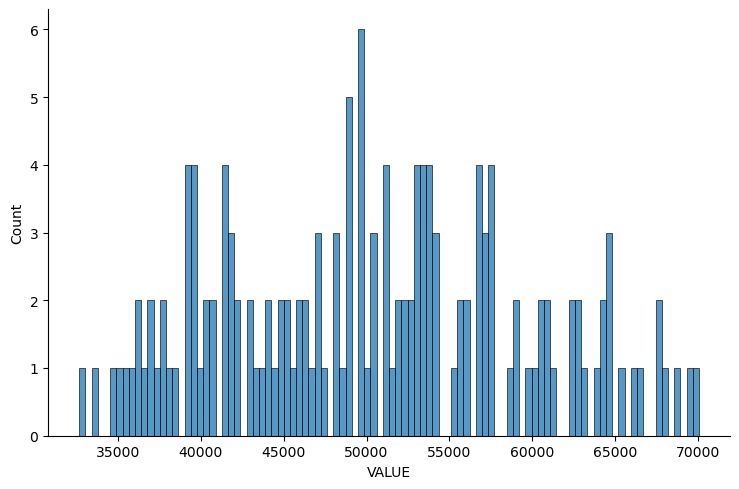

final_testing_df_output_df_AvgAnnWages_ByGender.csv


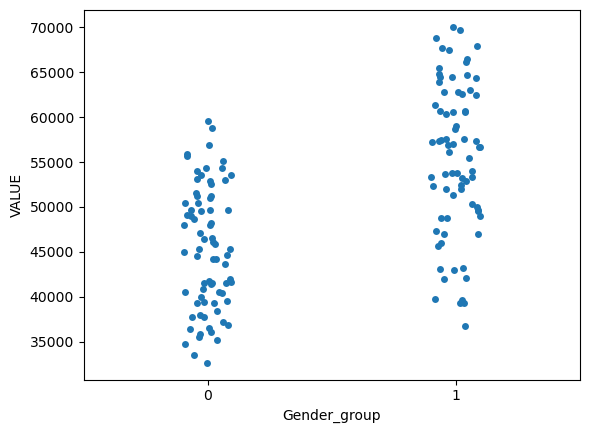

Done using Stripplot
[1, 0] = ['Male employees' 'Female employees']



In [64]:
dfa_to_cover = 2

dfa_Testing_AvgAnnWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_AvgAnnWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgAnnWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average annual wages and salaries' by Immigrant status

final_testing_df_output_df_AvgAnnWages_ByImmigrant.csv
                               sum          mean     amin   median     amax  \
Characteristics                                                               
Immigrant employees      3554950.0  47399.333333  31977.0  48615.0  63582.0   
Non-immigrant employees  3690998.0  49213.306667  34013.0  49374.0  63265.0   

                         size  
Characteristics                
Immigrant employees        75  
Non-immigrant employees    75  
Overall,
Sum :  7245948.0
Mean :  48306.32
Min/median/max : 31977.0 / 49016.0 / 63582.0
Standard Deviation :  7581.937589930426
Skewnewss :  -0.16449979628579625
Total size :  150

final_testing_df_output_df_AvgAnnWages_ByImmigrant.csv


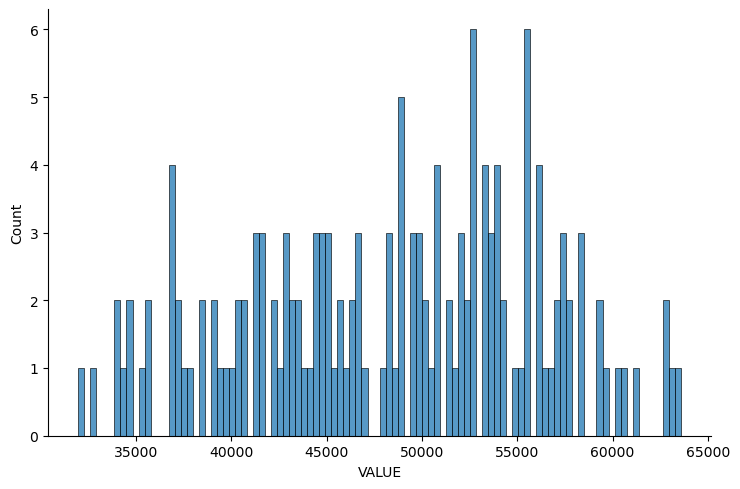

final_testing_df_output_df_AvgAnnWages_ByImmigrant.csv


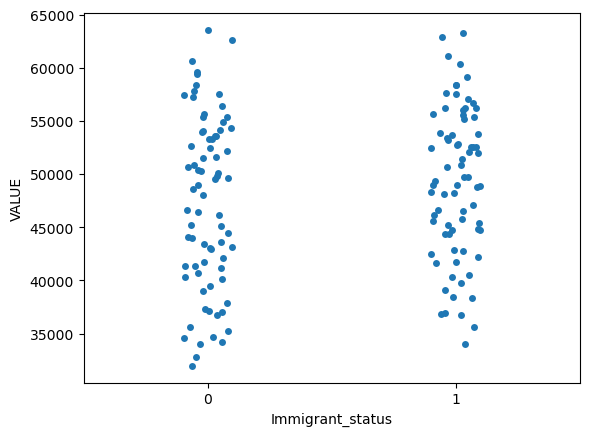

Done using Stripplot
[0, 1] = ['Immigrant employees' 'Non-immigrant employees']



In [65]:
dfa_to_cover = 3

dfa_Testing_AvgAnnWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics. 
dfa_Testing_AvgAnnWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgAnnWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average annual wages and salaries' by yearly

final_testing_df_output_df_AvgAnnWages_ByAge.csv


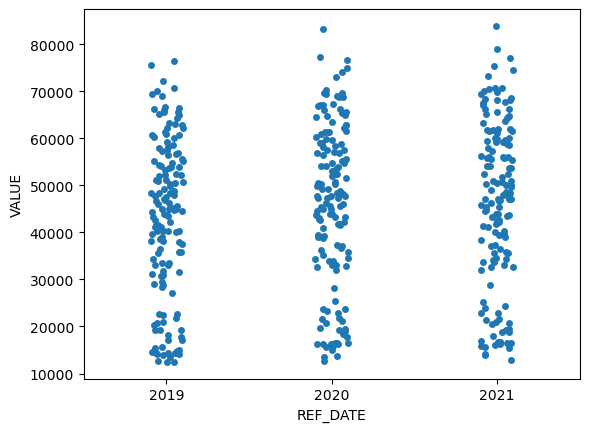

Done using Stripplot



In [66]:
dfa_to_cover = 0

dfa_Testing_AvgAnnWages_To_Analysis.print_byYearlyGraph('REF_DATE',dfa_to_cover) # Print the possible classifier based on Yearly only on Age group.

Result for testing set for'Average hourly wage'

In [67]:
# Export dataset to analysis

dfa_Testing_AvgHrsWages_To_Analysis = df_Final_TestingDataset_AvgHrsWages
dfa_Testing_AvgHrsWages_To_Analysis = Final_Target_To_Analysis(dfa_Testing_AvgHrsWages_To_Analysis, pd, np, pp, sns, df_Final_TestingDataset_AvgHrsWages_Name)

Result for testing set for'Average hourly wage' by Age group

final_testing_df_output_df_AvgHrsWages_ByAge.csv
                           sum       mean   amin  median   amax  size
Characteristics                                                      
15 to 24 years         1418.04  18.907200  13.49   18.89  24.48    75
25 to 34 years         1974.53  26.327067  19.02   26.03  32.18    75
35 to 44 years         2405.70  32.076000  22.35   31.65  38.89    75
45 to 54 years         2592.01  34.560133  23.17   34.96  43.62    75
55 to 64 years         2565.26  34.203467  22.66   34.40  43.17    75
65 years old and over  2494.07  33.254267  19.36   32.92  46.07    75
Overall,
Sum :  13449.61
Mean :  29.888022222222222
Min/median/max : 13.49 / 30.490000000000002 / 46.07
Standard Deviation :  7.202130786522336
Skewnewss :  -0.2005972990040442
Total size :  450

final_testing_df_output_df_AvgHrsWages_ByAge.csv


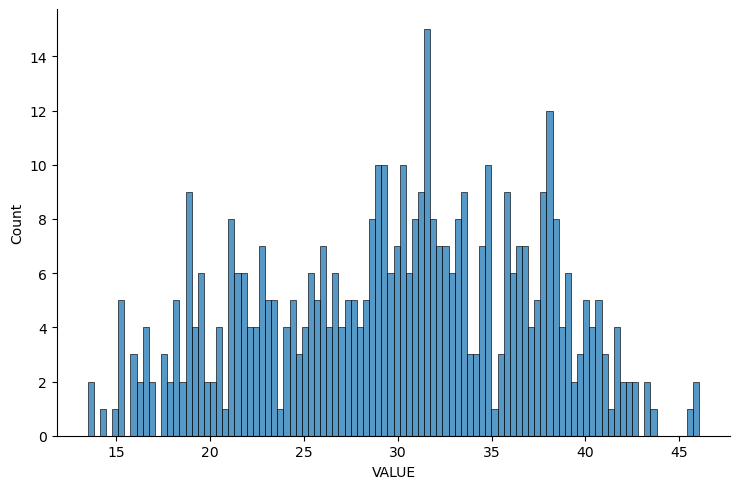

final_testing_df_output_df_AvgHrsWages_ByAge.csv


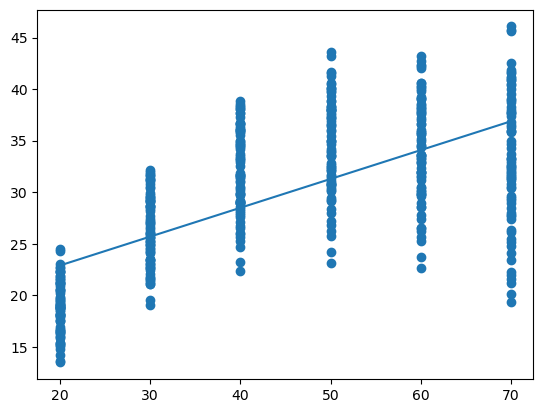

Done by Linear Regression



In [68]:
dfa_to_cover = 0

dfa_Testing_AvgHrsWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_AvgHrsWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgHrsWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average hourly wage' by Education level

final_testing_df_output_df_AvgHrsWages_ByEducation.csv
                                  sum       mean   amin  median   amax  size
Characteristics                                                             
High school diploma and less  1813.29  24.177200  16.56   24.81  29.37    75
Trade certificate             2123.45  28.312667  19.98   28.47  39.55    75
University degree and higher  2658.22  35.442933  24.19   35.58  45.47    75
Overall,
Sum :  6594.959999999999
Mean :  29.31093333333333
Min/median/max : 16.56 / 28.34 / 45.47
Standard Deviation :  6.1840297915050675
Skewnewss :  0.5213937099086743
Total size :  225

final_testing_df_output_df_AvgHrsWages_ByEducation.csv


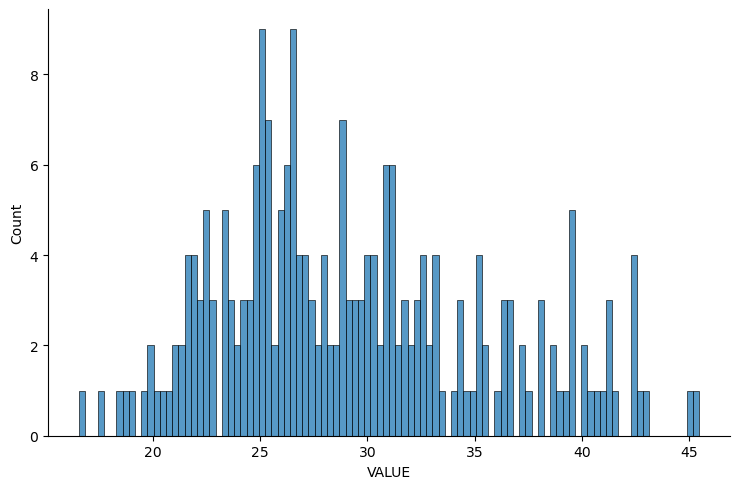

In [69]:
dfa_to_cover = 1

dfa_Testing_AvgHrsWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_AvgHrsWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
# dfa_Testing_AvgHrsWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average hourly wage' by Gender group

final_testing_df_output_df_AvgHrsWages_ByGender.csv
                      sum       mean   amin  median   amax  size
Characteristics                                                 
Female employees  2207.94  29.439200  20.71   29.58  36.55    75
Male employees    2550.74  34.009867  22.20   34.03  41.44    75
Overall,
Sum :  4758.68
Mean :  31.724533333333337
Min/median/max : 20.71 / 31.595 / 41.44
Standard Deviation :  5.011556589413003
Skewnewss :  0.07868782098838015
Total size :  150

final_testing_df_output_df_AvgHrsWages_ByGender.csv


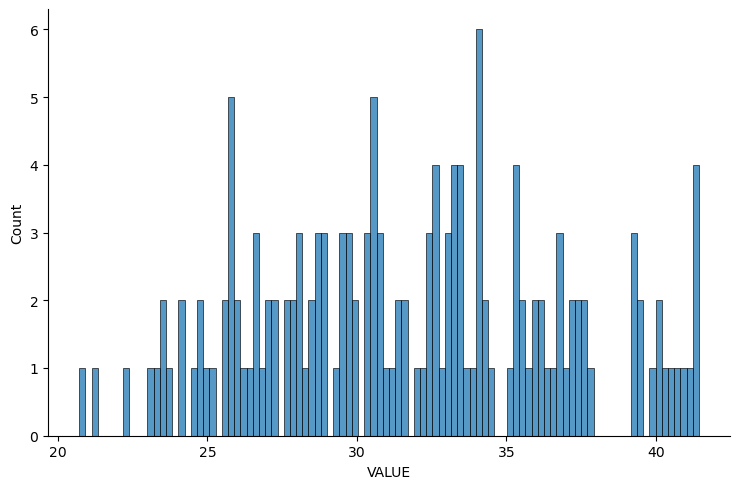

final_testing_df_output_df_AvgHrsWages_ByGender.csv


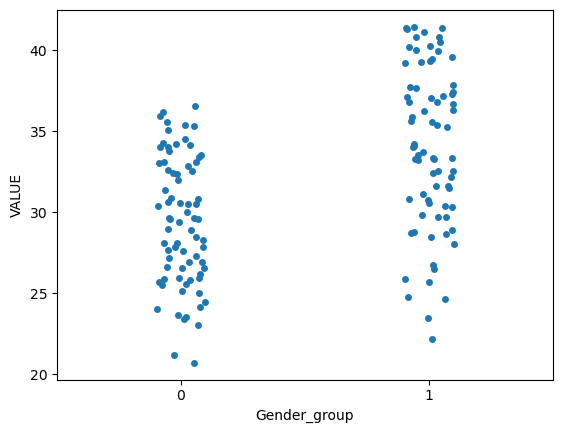

Done using Stripplot
[1, 0] = ['Male employees' 'Female employees']



In [70]:
dfa_to_cover = 2

dfa_Testing_AvgHrsWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_AvgHrsWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgHrsWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average hourly wage' by Immigrant status

final_testing_df_output_df_AvgHrsWages_ByImmigrant.csv
                             sum       mean   amin  median   amax  size
Characteristics                                                        
Immigrant employees      2254.88  30.065067  20.60   30.35  38.63    75
Non-immigrant employees  2356.06  31.414133  21.23   31.53  38.02    75
Overall,
Sum :  4610.9400000000005
Mean :  30.739600000000003
Min/median/max : 20.6 / 30.905 / 38.63
Standard Deviation :  4.419609165224154
Skewnewss :  -0.21241877283543747
Total size :  150

final_testing_df_output_df_AvgHrsWages_ByImmigrant.csv


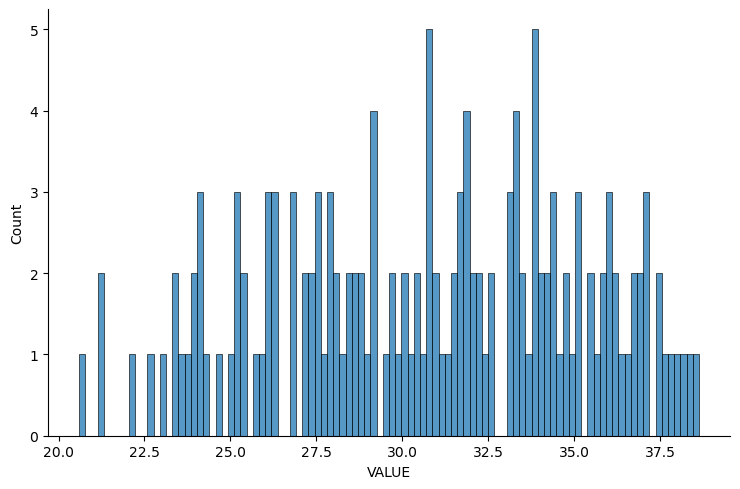

final_testing_df_output_df_AvgHrsWages_ByImmigrant.csv


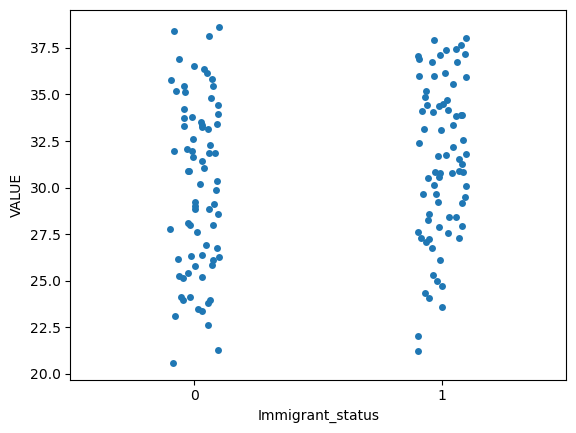

Done using Stripplot
[0, 1] = ['Immigrant employees' 'Non-immigrant employees']



In [71]:
dfa_to_cover = 3

dfa_Testing_AvgHrsWages_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics. 
dfa_Testing_AvgHrsWages_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgHrsWages_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average hourly wage' by yearly

final_testing_df_output_df_AvgHrsWages_ByAge.csv


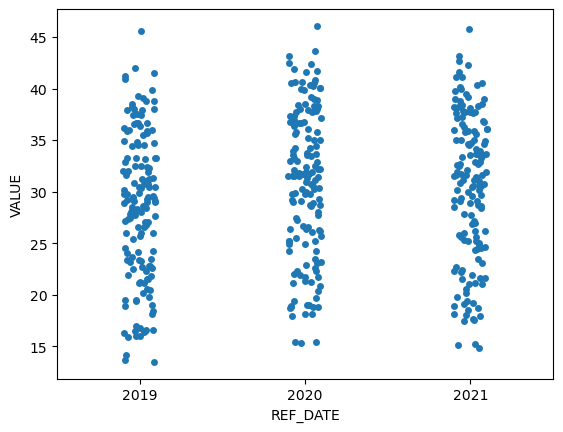

Done using Stripplot



In [72]:
dfa_to_cover = 0

dfa_Testing_AvgHrsWages_To_Analysis.print_byYearlyGraph('REF_DATE',dfa_to_cover) # Print the possible classifier based on Yearly only on Age group.

Result for testing set for'Average weekly hours worked'

In [73]:
# Export dataset to analysis

dfa_Testing_AvgWeekHrsWrked_To_Analysis = df_Final_TestingDataset_AvgWeekHrsWrked
dfa_Testing_AvgWeekHrsWrked_To_Analysis = Final_Target_To_Analysis(dfa_Testing_AvgWeekHrsWrked_To_Analysis, pd, np, pp, sns, df_Final_TestingDataset_AvgWeekHrsWrked_Name)

Result for testing set for'Average weekly hours worked' by Age group

final_testing_df_output_df_AvgWeekHrsWrked_ByAge.csv
                          sum       mean  amin  median  amax  size
Characteristics                                                   
15 to 24 years         1308.0  17.440000  16.0    17.0  20.0    75
25 to 34 years         2290.0  30.533333  28.0    30.0  34.0    75
35 to 44 years         2499.0  33.320000  31.0    33.0  38.0    75
45 to 54 years         2626.0  35.013333  33.0    35.0  39.0    75
55 to 64 years         2403.0  32.040000  29.0    32.0  35.0    75
65 years old and over  1543.0  20.573333  17.0    21.0  24.0    75
Overall,
Sum :  12669.0
Mean :  28.153333333333332
Min/median/max : 16.0 / 31.0 / 39.0
Standard Deviation :  6.8352712699155695
Skewnewss :  -0.5809323008907273
Total size :  450

final_testing_df_output_df_AvgWeekHrsWrked_ByAge.csv


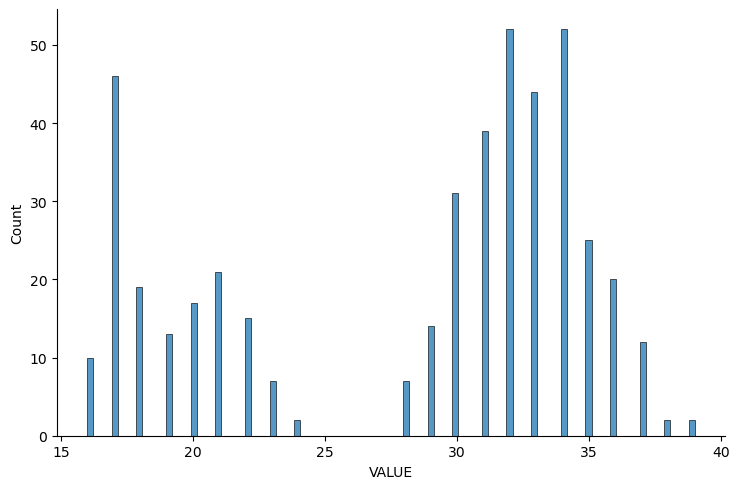

final_testing_df_output_df_AvgWeekHrsWrked_ByAge.csv


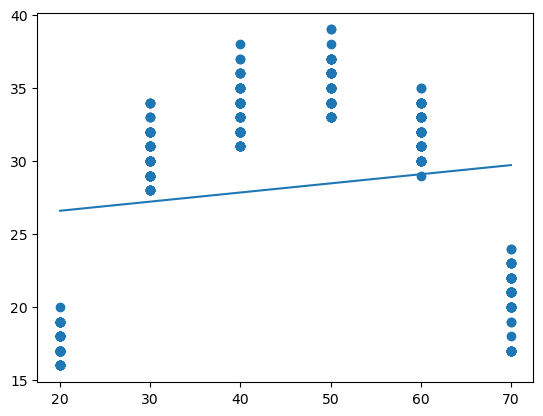

Done by Linear Regression



In [74]:
dfa_to_cover = 0

dfa_Testing_AvgWeekHrsWrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_AvgWeekHrsWrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgWeekHrsWrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average weekly hours worked' by Education level

final_testing_df_output_df_AvgWeekHrsWrked_ByEducation.csv
                                 sum       mean  amin  median  amax  size
Characteristics                                                          
High school diploma and less  1872.0  24.960000  23.0    25.0  28.0    75
Trade certificate             2239.0  29.853333  27.0    30.0  35.0    75
University degree and higher  2429.0  32.386667  30.0    32.0  35.0    75
Overall,
Sum :  6540.0
Mean :  29.066666666666666


Min/median/max : 23.0 / 30.0 / 35.0
Standard Deviation :  3.384933939942962
Skewnewss :  -0.22803984300945943
Total size :  225

final_testing_df_output_df_AvgWeekHrsWrked_ByEducation.csv


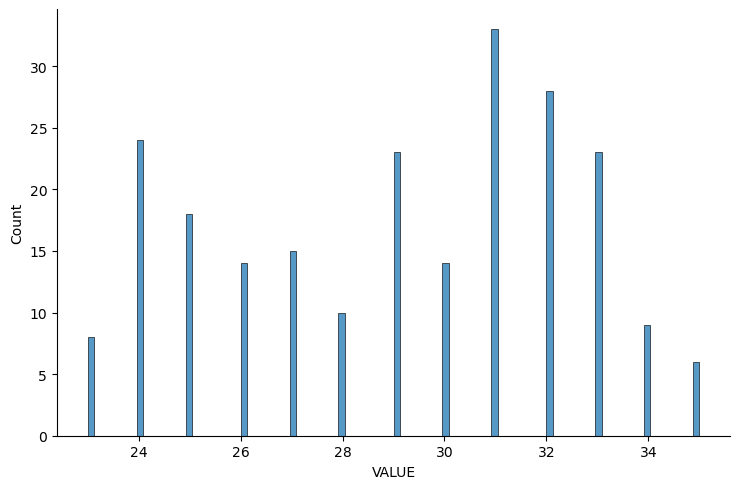

final_testing_df_output_df_AvgWeekHrsWrked_ByEducation.csv


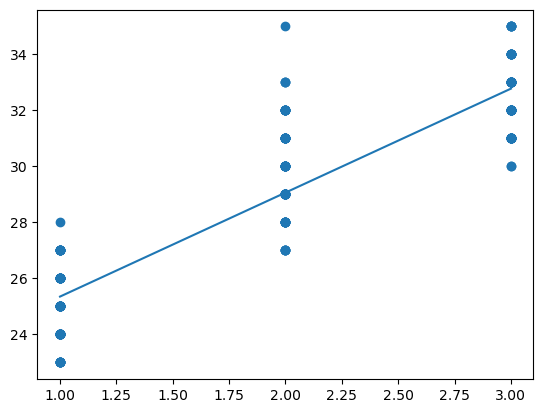

Done by Linear Regression
Higher the number, higher the education



In [75]:
dfa_to_cover = 1

dfa_Testing_AvgWeekHrsWrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_AvgWeekHrsWrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgWeekHrsWrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average weekly hours worked' by Gender group

final_testing_df_output_df_AvgWeekHrsWrked_ByGender.csv
                     sum       mean  amin  median  amax  size
Characteristics                                              
Female employees  2213.0  29.506667  28.0    29.0  32.0    75
Male employees    2344.0  31.253333  28.0    31.0  34.0    75
Overall,
Sum :  4557.0
Mean :  30.38
Min/median/max : 28.0 / 30.0 / 34.0
Standard Deviation :  1.4907268920451757
Skewnewss :  0.1316464344774555
Total size :  150

final_testing_df_output_df_AvgWeekHrsWrked_ByGender.csv


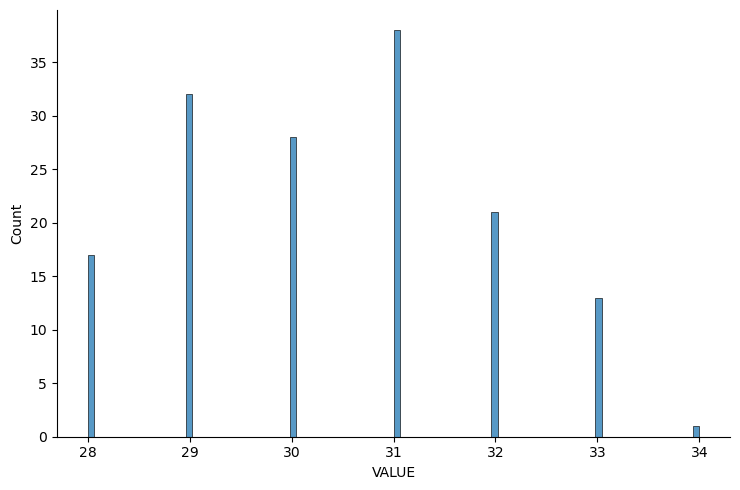

final_testing_df_output_df_AvgWeekHrsWrked_ByGender.csv


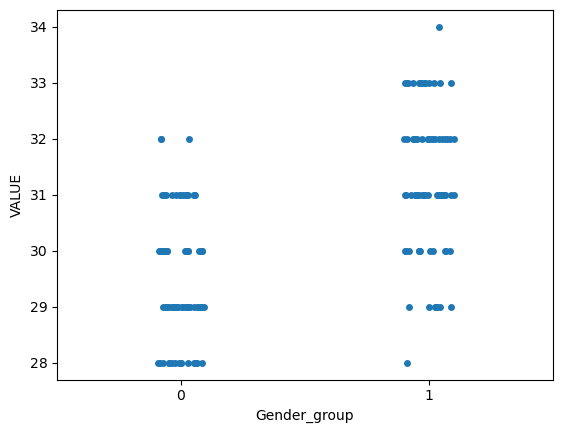

Done using Stripplot
[1, 0] = ['Male employees' 'Female employees']



In [76]:
dfa_to_cover = 2

dfa_Testing_AvgWeekHrsWrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_AvgWeekHrsWrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgWeekHrsWrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average weekly hours worked' by Immigrant status

final_testing_df_output_df_AvgWeekHrsWrked_ByImmigrant.csv
                            sum       mean  amin  median  amax  size
Characteristics                                                     
Immigrant employees      2270.0  30.266667  27.0    30.0  33.0    75
Non-immigrant employees  2257.0  30.093333  28.0    30.0  33.0    75
Overall,
Sum :  4527.0
Mean :  30.18
Min/median/max : 27.0 / 30.0 / 33.0
Standard Deviation :  1.2278436382536666
Skewnewss :  0.0436903112714573
Total size :  150

final_testing_df_output_df_AvgWeekHrsWrked_ByImmigrant.csv


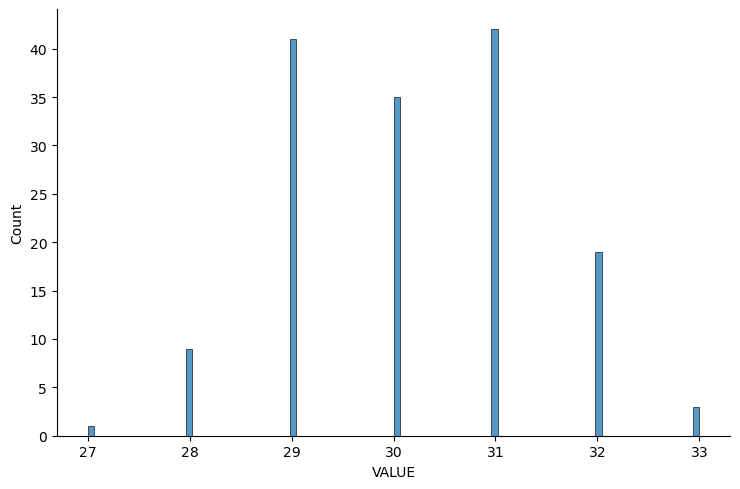

final_testing_df_output_df_AvgWeekHrsWrked_ByImmigrant.csv


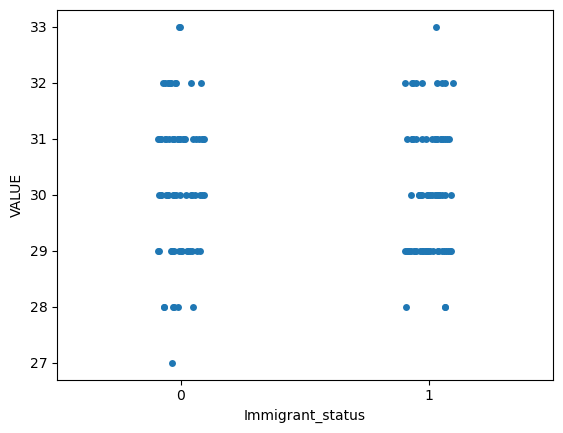

Done using Stripplot
[0, 1] = ['Immigrant employees' 'Non-immigrant employees']



In [77]:
dfa_to_cover = 3

dfa_Testing_AvgWeekHrsWrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics. 
dfa_Testing_AvgWeekHrsWrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_AvgWeekHrsWrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Average weekly hours worked' by yearly

final_testing_df_output_df_AvgWeekHrsWrked_ByAge.csv


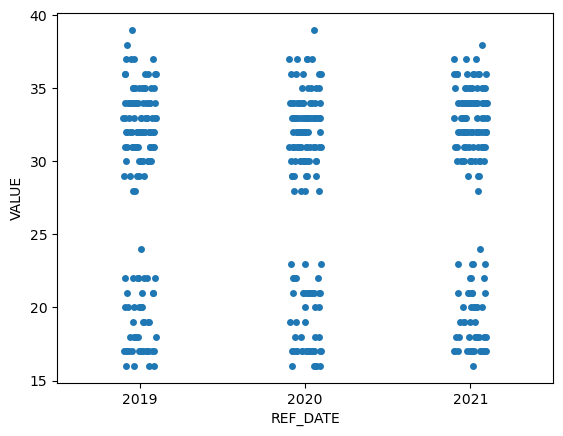

Done using Stripplot



In [78]:
dfa_to_cover = 0

dfa_Testing_AvgWeekHrsWrked_To_Analysis.print_byYearlyGraph('REF_DATE',dfa_to_cover) # Print the possible classifier based on Yearly only on Age group.

Result for testing set for'Hours Worked'

In [79]:
# Export dataset to analysis

dfa_Testing_Hrs_Wrked_To_Analysis = df_Final_TestingDataset_Hrs_Wrked
dfa_Testing_Hrs_Wrked_To_Analysis = Final_Target_To_Analysis(dfa_Testing_Hrs_Wrked_To_Analysis, pd, np, pp, sns, df_Final_TestingDataset_Hrs_Wrked_Name)

Result for testing set for'Hours Worked' by Age group

final_testing_df_output_df_Hrs_Wrked_ByAge.csv
                             sum          mean    amin   median      amax  \
Characteristics                                                             
15 to 24 years         1338316.0  17844.213333   497.0  11421.0   77253.0   
25 to 34 years         5209479.0  69459.720000  1434.0  40393.0  313785.0   
35 to 44 years         5636717.0  75156.226667  1413.0  41945.0  314318.0   
45 to 54 years         5632390.0  75098.533333  1635.0  41419.0  323859.0   
55 to 64 years         4632898.0  61771.973333  1407.0  37091.0  270787.0   
65 years old and over  1095950.0  14612.666667   361.0  10249.0   65892.0   

                       size  
Characteristics              
15 to 24 years           75  
25 to 34 years           75  
35 to 44 years           75  
45 to 54 years           75  
55 to 64 years           75  
65 years old and over    75  
Overall,
Sum :  23545750.0
Mean :  52323.88888888889
Min/median/max : 361.0 / 26432.5 / 323859.0

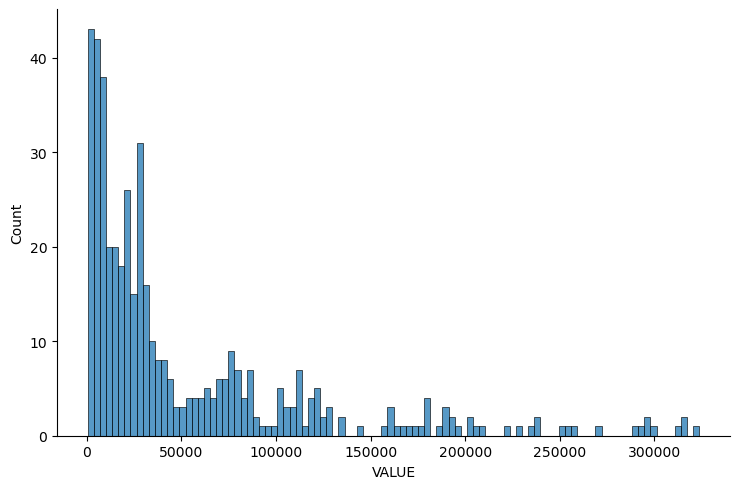

final_testing_df_output_df_Hrs_Wrked_ByAge.csv


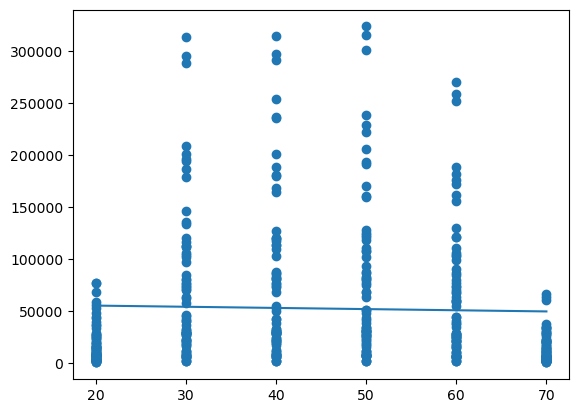

Done by Linear Regression



In [80]:
dfa_to_cover = 0

dfa_Testing_Hrs_Wrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_Hrs_Wrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_Hrs_Wrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Hours Worked' by Education level

final_testing_df_output_df_Hrs_Wrked_ByEducation.csv
                                     sum           mean    amin   median  \
Characteristics                                                            
High school diploma and less   3839870.0   51198.266667  1717.0  37663.0   
Trade certificate              1548281.0   20643.746667   349.0   8852.0   
University degree and higher  12180311.0  162404.146667  3106.0  91916.0   

                                  amax  size  
Characteristics                               
High school diploma and less  199483.0    75  
Trade certificate             153953.0    75  
University degree and higher  755243.0    75  
Overall,
Sum :  17568462.0
Mean :  78082.05333333333
Min/median/max : 349.0 / 31865.0 / 755243.0
Standard Deviation :  120621.30059284004
Skewnewss :  3.0205628183947755
Total size :  225

final_testing_df_output_df_Hrs_Wrked_ByEducation.csv


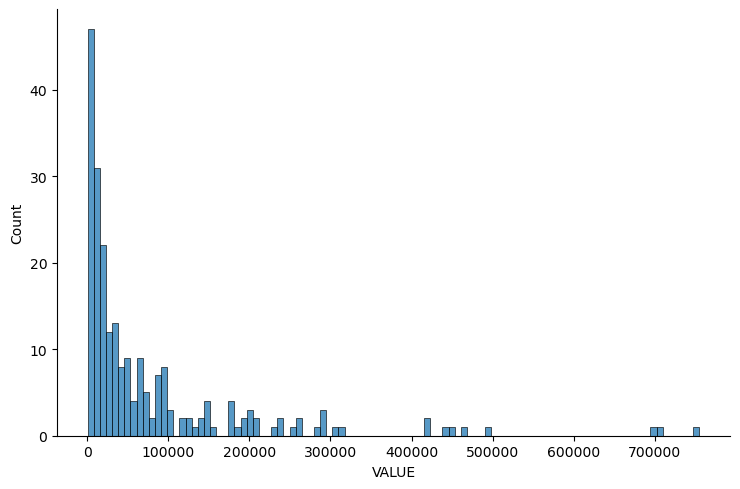

final_testing_df_output_df_Hrs_Wrked_ByEducation.csv


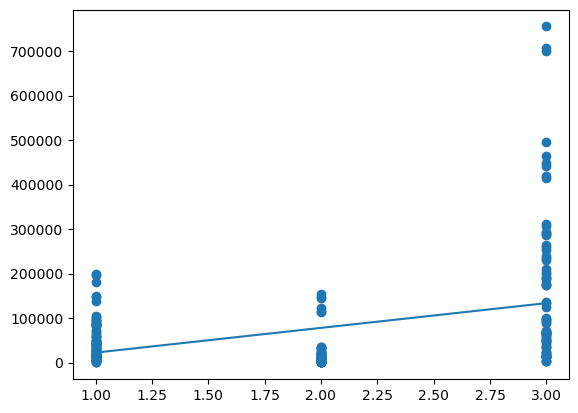

Done by Linear Regression
Higher the number, higher the education



In [81]:
dfa_to_cover = 1

dfa_Testing_Hrs_Wrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_Hrs_Wrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_Hrs_Wrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Hours Worked' by Gender group

final_testing_df_output_df_Hrs_Wrked_ByGender.csv
                         sum           mean    amin    median      amax  size
Characteristics                                                              
Female employees  16144628.0  215261.706667  3830.0  114631.0  937067.0    75
Male employees     7401122.0   98681.626667  2918.0   64568.0  428111.0    75
Overall,
Sum :  23545750.0
Mean :  156971.66666666666
Min/median/max : 2918.0 / 86240.0 / 937067.0
Standard Deviation :  182769.39372530495
Skewnewss :  2.0993685578631798
Total size :  150

final_testing_df_output_df_Hrs_Wrked_ByGender.csv


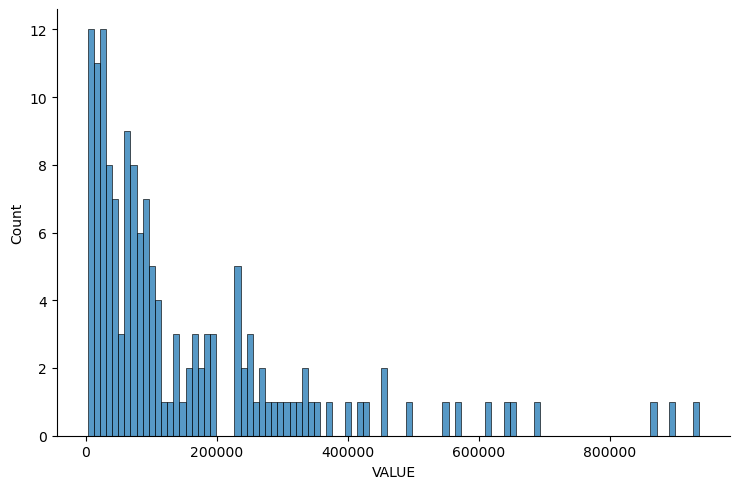

final_testing_df_output_df_Hrs_Wrked_ByGender.csv


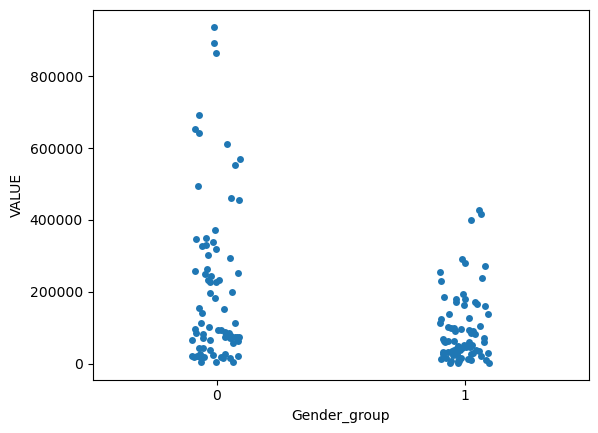

Done using Stripplot
[1, 0] = ['Male employees' 'Female employees']



In [82]:
dfa_to_cover = 2

dfa_Testing_Hrs_Wrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_Hrs_Wrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_Hrs_Wrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Hours Worked' by Immigrant status

final_testing_df_output_df_Hrs_Wrked_ByImmigrant.csv
                                sum           mean    amin    median  \
Characteristics                                                        
Immigrant employees       6592022.0   87893.626667   550.0   43620.0   
Non-immigrant employees  16953727.0  226049.693333  6197.0  127014.0   

                             amax  size  
Characteristics                          
Immigrant employees      447657.0    75  
Non-immigrant employees  917521.0    75  
Overall,
Sum :  23545749.0
Mean :  156971.66
Min/median/max : 550.0 / 92441.5 / 917521.0
Standard Deviation :  188873.98307114118
Skewnewss :  2.0992731555277357
Total size :  150

final_testing_df_output_df_Hrs_Wrked_ByImmigrant.csv


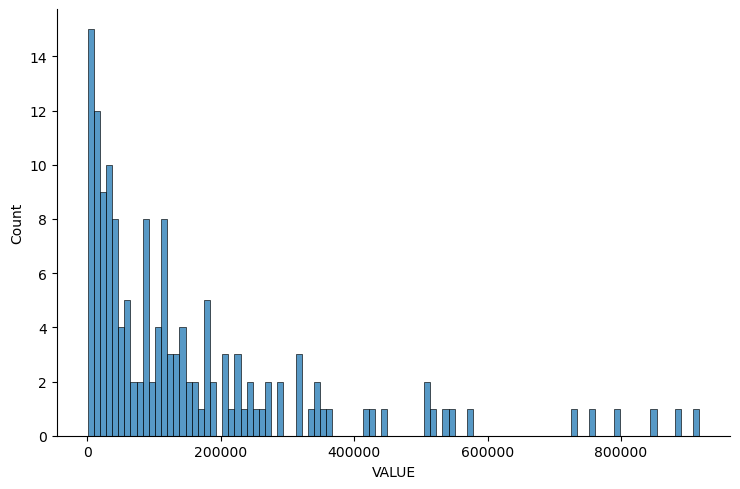

final_testing_df_output_df_Hrs_Wrked_ByImmigrant.csv


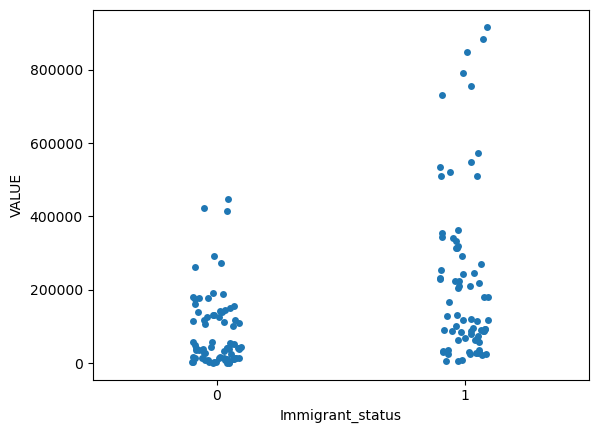

Done using Stripplot
[0, 1] = ['Immigrant employees' 'Non-immigrant employees']



In [83]:
dfa_to_cover = 3

dfa_Testing_Hrs_Wrked_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics. 
dfa_Testing_Hrs_Wrked_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_Hrs_Wrked_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Hours Worked' by yearly

final_testing_df_output_df_Hrs_Wrked_ByAge.csv


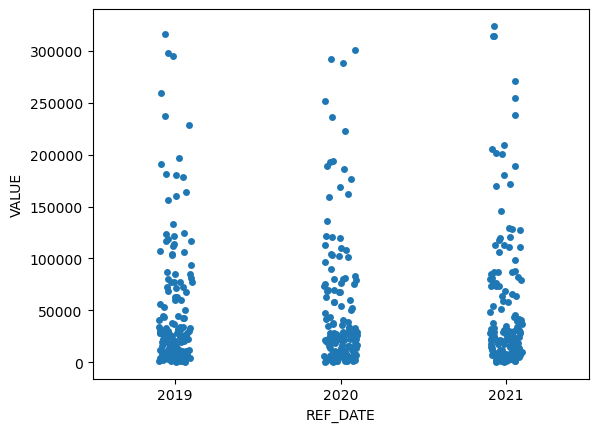

Done using Stripplot



In [84]:
dfa_to_cover = 0

dfa_Testing_Hrs_Wrked_To_Analysis.print_byYearlyGraph('REF_DATE',dfa_to_cover) # Print the possible classifier based on Yearly only on Age group.

Result for testing set for'Number of jobs'

In [85]:
# Export dataset to analysis

dfa_Testing_NumOfJob_To_Analysis = df_Final_TestingDataset_NumOfJob
dfa_Testing_NumOfJob_To_Analysis = Final_Target_To_Analysis(dfa_Testing_NumOfJob_To_Analysis, pd, np, pp, sns, df_Final_TestingDataset_NumOfJob_Name)

Result for testing set for'Number of jobs' by Age group

final_testing_df_output_df_NumOfJob_ByAge.csv
                             sum          mean   amin   median      amax  size
Characteristics                                                               
15 to 24 years         1473846.0  19651.280000  597.0  12853.0   89352.0    75
25 to 34 years         3351530.0  44687.066667  845.0  25732.0  193127.0    75
35 to 44 years         3309827.0  44131.026667  729.0  25101.0  176247.0    75
45 to 54 years         3137650.0  41835.333333  809.0  23657.0  172644.0    75
55 to 64 years         2799581.0  37327.746667  800.0  22957.0  154501.0    75
65 years old and over  1052065.0  14027.533333  322.0  10604.0   60497.0    75
Overall,
Sum :  15124499.0
Mean :  33609.997777777775
Min/median/max : 322.0 / 17335.0 / 193127.0
Standard Deviation :  38617.96878083792
Skewnewss :  1.8801308823526393
Total size :  450

final_testing_df_output_df_NumOfJob_ByAge.csv


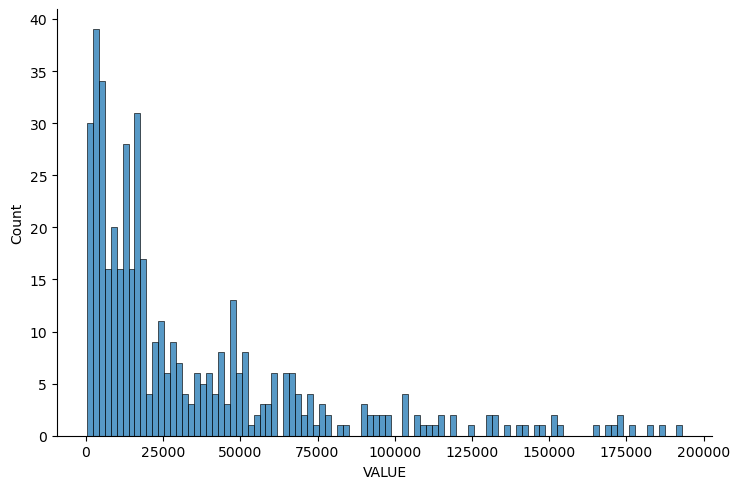

final_testing_df_output_df_NumOfJob_ByAge.csv


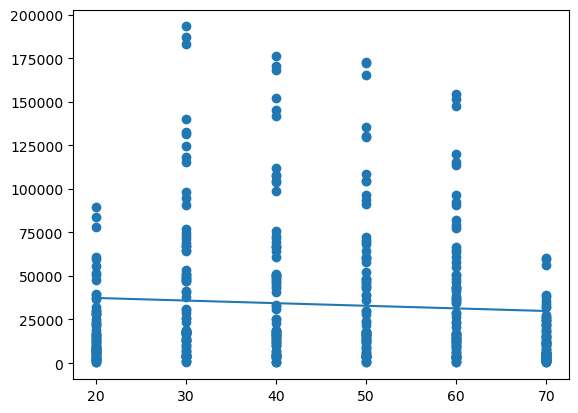

Done by Linear Regression



In [86]:
dfa_to_cover = 0

dfa_Testing_NumOfJob_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_NumOfJob_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_NumOfJob_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Number of jobs' by Education level

final_testing_df_output_df_NumOfJob_ByEducation.csv
                                    sum          mean    amin   median  \
Characteristics                                                          
High school diploma and less  3006364.0  40084.853333  1289.0  30412.0   
Trade certificate             1010387.0  13471.826667   217.0   5607.0   
University degree and higher  7363505.0  98180.066667  1692.0  57742.0   

                                  amax  size  
Characteristics                               
High school diploma and less  160257.0    75  
Trade certificate              99207.0    75  
University degree and higher  440185.0    75  
Overall,
Sum :  11380256.0
Mean :  50578.915555555555
Min/median/max : 217.0 / 21499.0 / 440185.0
Standard Deviation :  73477.22284618838
Skewnewss :  2.7652609490298943
Total size :  225

final_testing_df_output_df_NumOfJob_ByEducation.csv


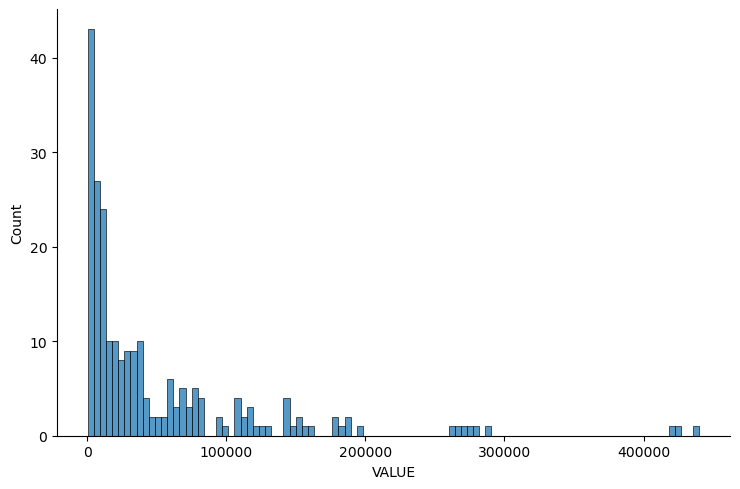

final_testing_df_output_df_NumOfJob_ByEducation.csv


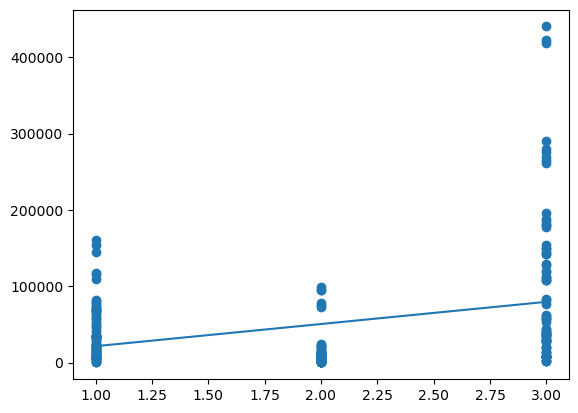

Done by Linear Regression
Higher the number, higher the education



In [87]:
dfa_to_cover = 1

dfa_Testing_NumOfJob_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_NumOfJob_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_NumOfJob_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Number of jobs' by Gender group

final_testing_df_output_df_NumOfJob_ByGender.csv
                         sum           mean    amin   median      amax  size
Characteristics                                                             
Female employees  10488836.0  139851.146667  2372.0  78504.0  578450.0    75
Male employees     4635657.0   61808.760000  1730.0  39774.0  262447.0    75
Overall,
Sum :  15124493.0
Mean :  100829.95333333334
Min/median/max : 1730.0 / 55510.0 / 578450.0
Standard Deviation :  117420.78828676158
Skewnewss :  2.041334832154595
Total size :  150

final_testing_df_output_df_NumOfJob_ByGender.csv


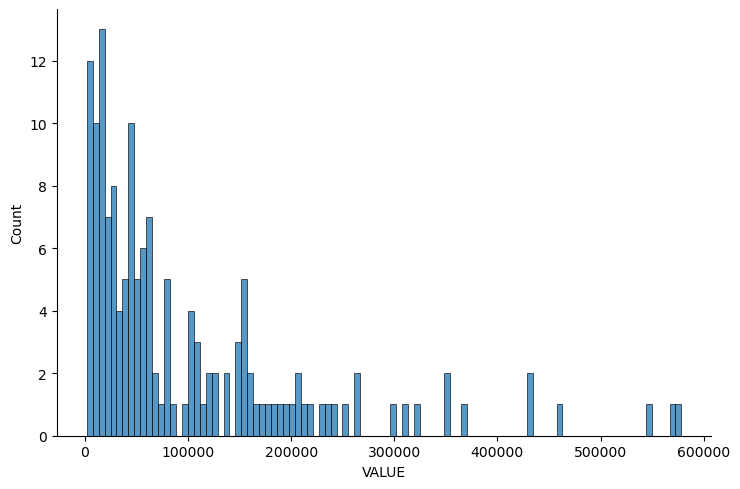

final_testing_df_output_df_NumOfJob_ByGender.csv


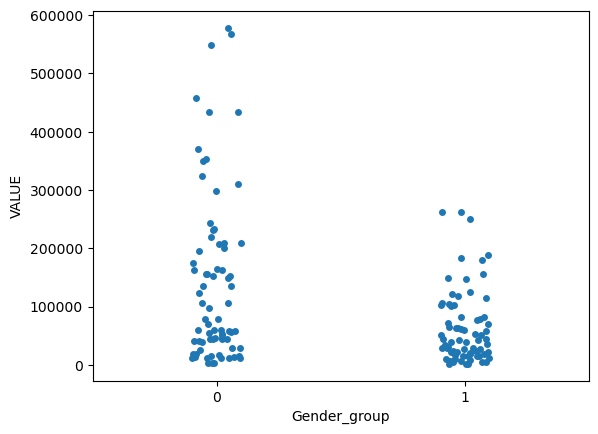

Done using Stripplot
[1, 0] = ['Male employees' 'Female employees']



In [88]:
dfa_to_cover = 2

dfa_Testing_NumOfJob_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_NumOfJob_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_NumOfJob_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Number of jobs' by Immigrant status

final_testing_df_output_df_NumOfJob_ByImmigrant.csv
                                sum           mean    amin   median      amax  \
Characteristics                                                                 
Immigrant employees       4198421.0   55978.946667   337.0  27088.0  274559.0   
Non-immigrant employees  10926074.0  145680.986667  3765.0  84077.0  566338.0   

                         size  
Characteristics                
Immigrant employees        75  
Non-immigrant employees    75  
Overall,
Sum :  15124495.0
Mean :  100829.96666666666
Min/median/max : 337.0 / 60500.0 / 566338.0
Standard Deviation :  121238.11500027079
Skewnewss :  2.082806355312799
Total size :  150

final_testing_df_output_df_NumOfJob_ByImmigrant.csv


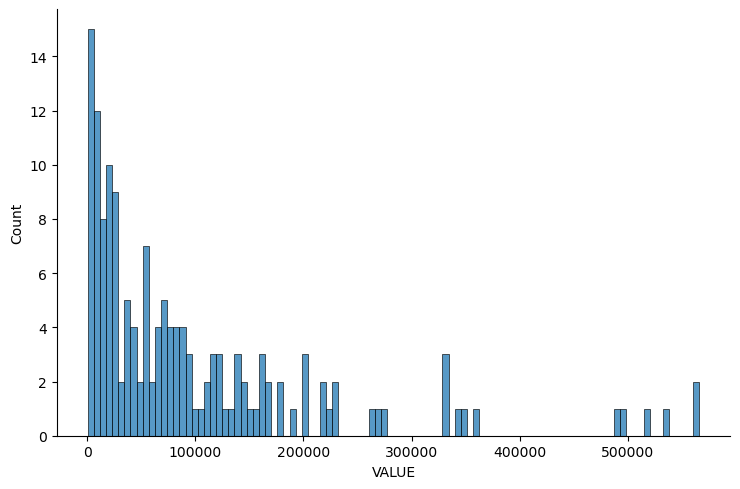

final_testing_df_output_df_NumOfJob_ByImmigrant.csv


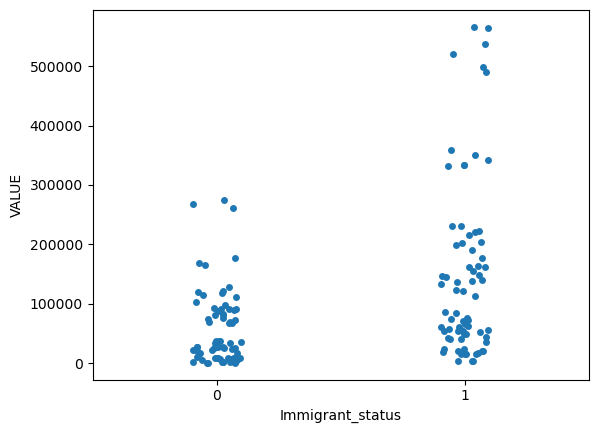

Done using Stripplot
[0, 1] = ['Immigrant employees' 'Non-immigrant employees']



In [89]:
dfa_to_cover = 3

dfa_Testing_NumOfJob_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics. 
dfa_Testing_NumOfJob_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_NumOfJob_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Number of jobs' by yearly

final_testing_df_output_df_NumOfJob_ByAge.csv


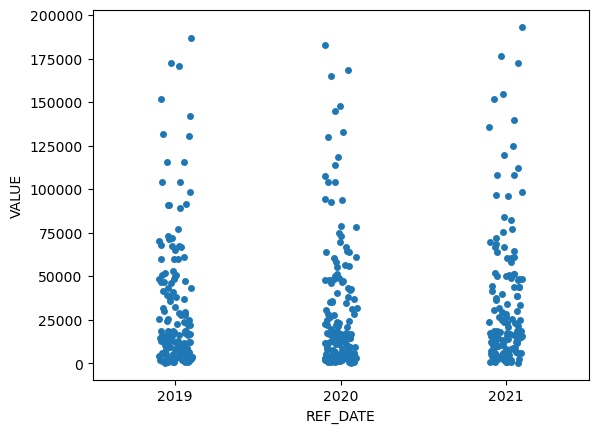

Done using Stripplot



In [90]:
dfa_to_cover = 0

dfa_Testing_NumOfJob_To_Analysis.print_byYearlyGraph('REF_DATE',dfa_to_cover) # Print the possible classifier based on Yearly only on Age group.

Result for testing set for'Wages and Salaries'

In [91]:
# Export dataset to analysis

dfa_Testing_WagesAndSalaries_To_Analysis = df_Final_TestingDataset_WagesAndSalaries
dfa_Testing_WagesAndSalaries_To_Analysis = Final_Target_To_Analysis(dfa_Testing_WagesAndSalaries_To_Analysis, pd, np, pp, sns, df_Final_TestingDataset_WagesAndSalaries_Name)

Result for testing set for'Wages and Salaries' by Age group

final_testing_df_output_df_WagesAndSalaries_ByAge.csv
                            sum         mean  amin  median     amax  size
Characteristics                                                          
15 to 24 years          27272.0   363.626667   8.0   188.0   1622.0    75
25 to 34 years         147099.0  1961.320000  32.0   921.0   9270.0    75
35 to 44 years         194164.0  2588.853333  41.0  1199.0  11414.0    75
45 to 54 years         208519.0  2780.253333  50.0  1337.0  12872.0    75
55 to 64 years         169578.0  2261.040000  42.0  1159.0  10830.0    75
65 years old and over   39976.0   533.013333   9.0   268.0   2660.0    75
Overall,
Sum :  786608.0
Mean :  1748.0177777777778
Min/median/max : 8.0 / 799.5 / 12872.0
Standard Deviation :  2388.2846414472547
Skewnewss :  2.18876652733957
Total size :  450

final_testing_df_output_df_WagesAndSalaries_ByAge.csv


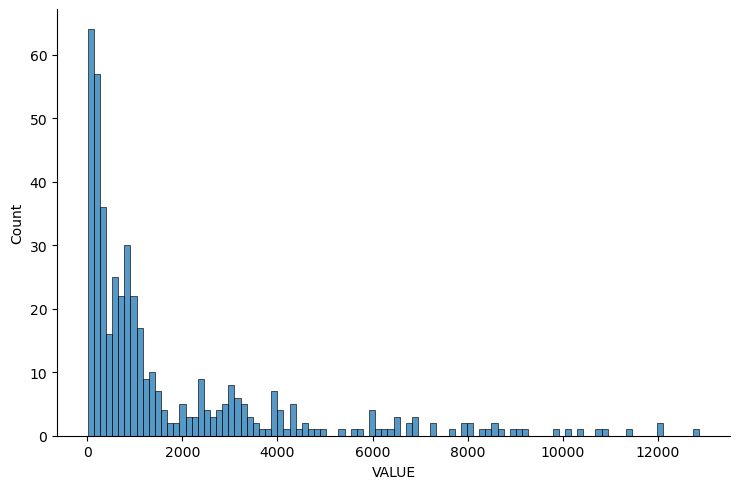

final_testing_df_output_df_WagesAndSalaries_ByAge.csv


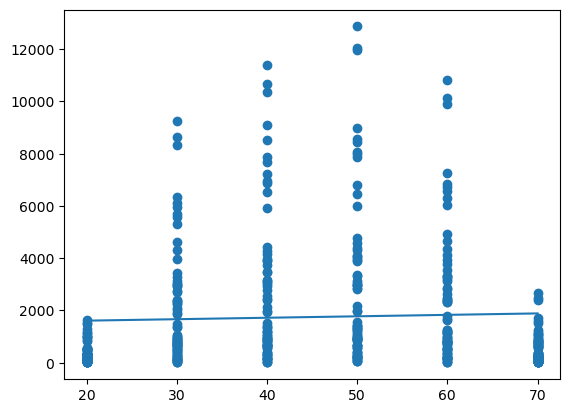

Done by Linear Regression



In [92]:
dfa_to_cover = 0

dfa_Testing_WagesAndSalaries_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_WagesAndSalaries_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_WagesAndSalaries_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Wages and Salaries' by Education level

final_testing_df_output_df_WagesAndSalaries_ByEducation.csv


                                   sum         mean  amin  median     amax  \
Characteristics                                                              
High school diploma and less   95794.0  1277.253333  37.0   861.0   5226.0   
Trade certificate              42027.0   560.360000  10.0   231.0   4105.0   
University degree and higher  469262.0  6256.826667  91.0  2895.0  30502.0   

                              size  
Characteristics                     
High school diploma and less    75  
Trade certificate               75  
University degree and higher    75  
Overall,
Sum :  607083.0
Mean :  2698.1466666666665
Min/median/max : 10.0 / 801.0 / 30502.0
Standard Deviation :  4868.765589464701
Skewnewss :  3.293087045340116
Total size :  225

final_testing_df_output_df_WagesAndSalaries_ByEducation.csv


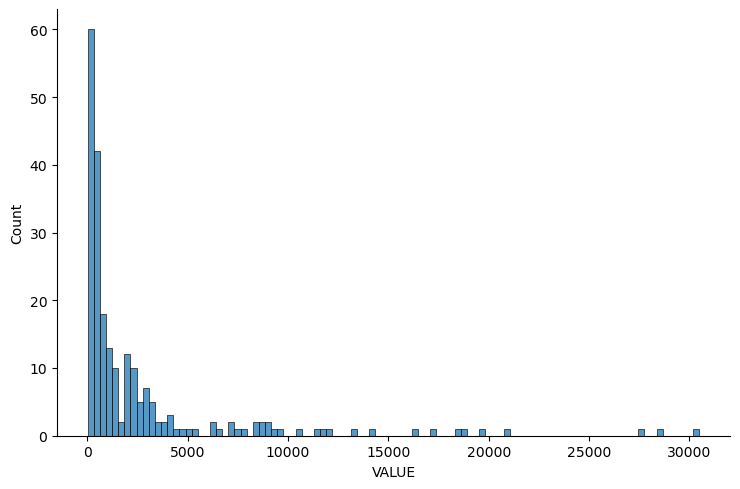

final_testing_df_output_df_WagesAndSalaries_ByEducation.csv


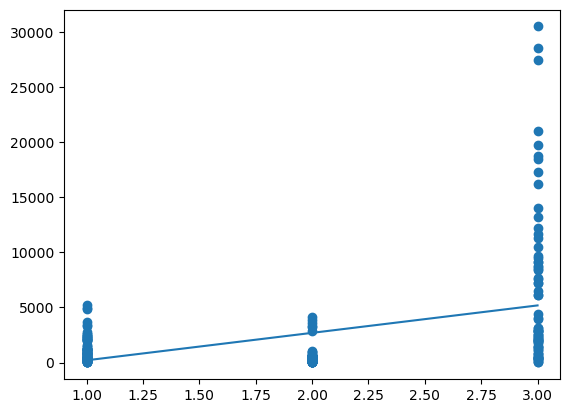

Done by Linear Regression
Higher the number, higher the education



In [93]:
dfa_to_cover = 1

dfa_Testing_WagesAndSalaries_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_WagesAndSalaries_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_WagesAndSalaries_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Wages and Salaries' by Gender group

final_testing_df_output_df_WagesAndSalaries_ByGender.csv
                       sum         mean  amin  median     amax  size
Characteristics                                                     
Female employees  516398.0  6885.306667  94.0  2932.0  31892.0    75
Male employees    270217.0  3602.893333  84.0  2176.0  16776.0    75
Overall,
Sum :  786615.0
Mean :  5244.1
Min/median/max : 84.0 / 2563.0 / 31892.0
Standard Deviation :  6289.8685749385895
Skewnewss :  2.0515596833116616
Total size :  150

final_testing_df_output_df_WagesAndSalaries_ByGender.csv


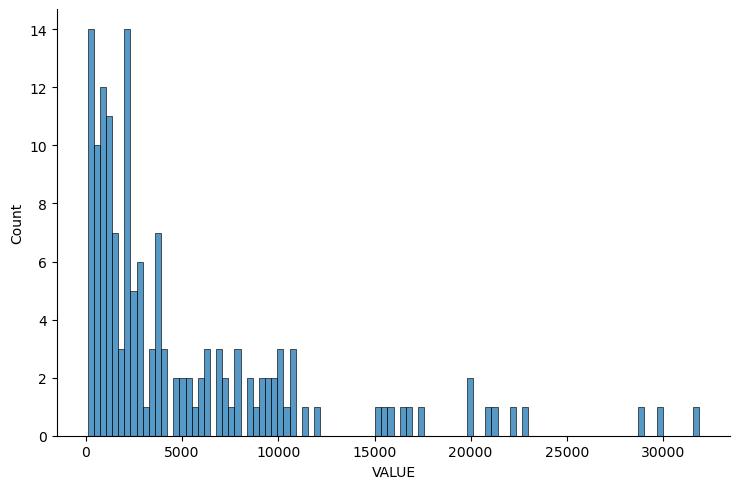

final_testing_df_output_df_WagesAndSalaries_ByGender.csv


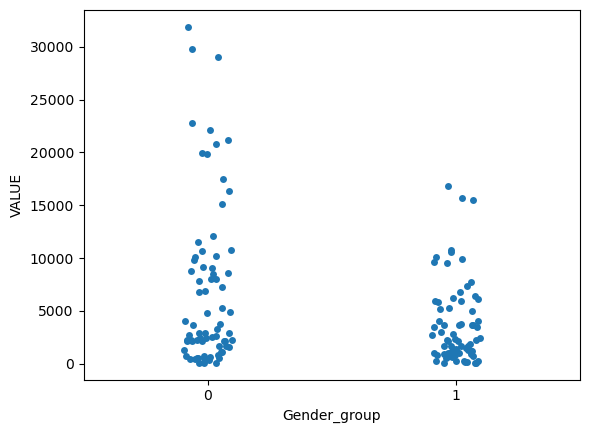

Done using Stripplot
[1, 0] = ['Male employees' 'Female employees']



In [94]:
dfa_to_cover = 2

dfa_Testing_WagesAndSalaries_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics.
dfa_Testing_WagesAndSalaries_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_WagesAndSalaries_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Wages and Salaries' by Immigrant status

final_testing_df_output_df_WagesAndSalaries_ByImmigrant.csv
                              sum         mean   amin  median     amax  size
Characteristics                                                             
Immigrant employees      218847.0  2917.960000   14.0  1243.0  16030.0    75
Non-immigrant employees  567772.0  7570.293333  169.0  3683.0  32637.0    75
Overall,
Sum :  786619.0
Mean :  5244.126666666667
Min/median/max : 14.0 / 2977.5 / 32637.0
Standard Deviation :  6672.173255441005
Skewnewss :  2.1294707124700127
Total size :  150

final_testing_df_output_df_WagesAndSalaries_ByImmigrant.csv


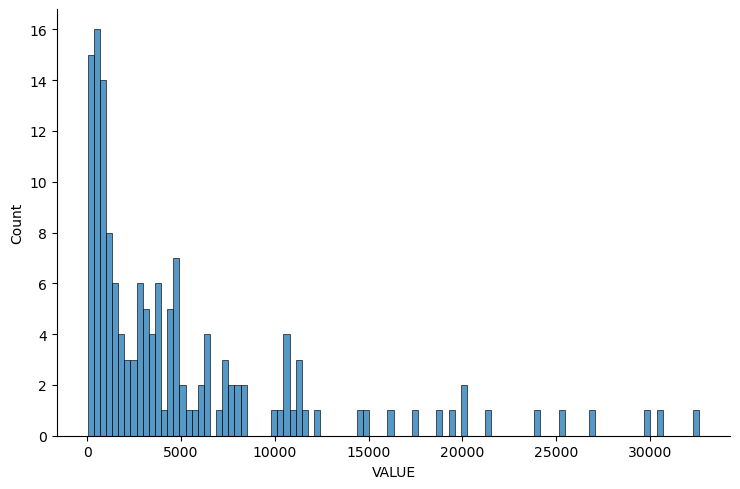

final_testing_df_output_df_WagesAndSalaries_ByImmigrant.csv


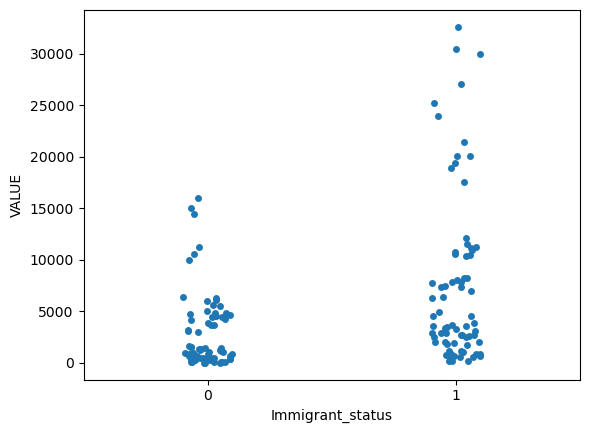

Done using Stripplot
[0, 1] = ['Immigrant employees' 'Non-immigrant employees']



In [95]:
dfa_to_cover = 3

dfa_Testing_WagesAndSalaries_To_Analysis.print_result(dfa_to_cover) # Print the result for each Characteristics. 
dfa_Testing_WagesAndSalaries_To_Analysis.print_histogram(dfa_to_cover) # Print the histogram for each Characteristics.
dfa_Testing_WagesAndSalaries_To_Analysis.print_classifier(dfa_to_cover) # Print the possible classifier for each Characteristics.

Result for testing set for'Wages and Salaries' by yearly

final_testing_df_output_df_WagesAndSalaries_ByAge.csv


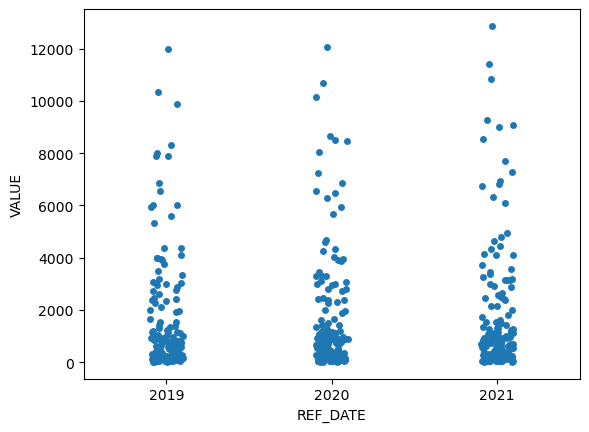

Done using Stripplot



In [96]:
dfa_to_cover = 0

dfa_Testing_WagesAndSalaries_To_Analysis.print_byYearlyGraph('REF_DATE',dfa_to_cover) # Print the possible classifier based on Yearly only on Age group.

Creating directory for panda-profiling section

In [97]:
class toOrganizedOutputFiles: # Creating folder for each section
  def __init__(self, name):

    import os

    # Leaf directory  
    directory = name
        
    # Parent Directories  
    parent_dir = ""
        
    # Path  
    path = os.path.join(parent_dir, directory)  

    if os.path.isdir(path):
      print("Directory '% s' is ALREADY created" % directory)  
    else:
      # Create the directory  
      os.makedirs(path)  
      print("Directory '% s' created" % directory)  

In [98]:
CreatedTheFile = toOrganizedOutputFiles('Panda_Profiling_Final')

Directory 'Panda_Profiling_Final' created


Panda profiling for the training set

In [99]:
# dfa_Training_AvgAnnHrsWrk_To_Analysis.print_Panda_Profiling('Panda_Profiling_Final')

# dfa_Training_AvgAnnWages_To_Analysis.print_Panda_Profiling('Panda_Profiling_Final') # Average annual wages and salaries

# dfa_Training_AvgHrsWages_To_Analysis.print_Panda_Profiling('Panda_Profiling_Final') # Average hourly wage

# dfa_Training_AvgWeekHrsWrked_To_Analysis.print_Panda_Profiling('Panda_Profiling_Final') # Average weekly hours worked

# dfa_Training_Hrs_Wrked_To_Analysis.print_Panda_Profiling('Panda_Profiling_Final') # Hours Worked

# dfa_Training_NumOfJob_To_Analysis.print_Panda_Profiling('Panda_Profiling_Final') # Number of jobs

# dfa_Training_WagesAndSalaries_To_Analysis.print_Panda_Profiling('Panda_Profiling_Final') # Wages and Salaries

Panda profiling for the testing set

In [100]:
dfa_Testing_AvgAnnHrsWrk_To_Analysis.print_Panda_Profiling('Panda_Profiling_Final')

dfa_Testing_AvgAnnWages_To_Analysis.print_Panda_Profiling('Panda_Profiling_Final') # Average annual wages and salaries

dfa_Testing_AvgHrsWages_To_Analysis.print_Panda_Profiling('Panda_Profiling_Final') # Average hourly wage

dfa_Testing_AvgWeekHrsWrked_To_Analysis.print_Panda_Profiling('Panda_Profiling_Final') # Average weekly hours worked

dfa_Testing_Hrs_Wrked_To_Analysis.print_Panda_Profiling('Panda_Profiling_Final') # Hours Worked

dfa_Testing_NumOfJob_To_Analysis.print_Panda_Profiling('Panda_Profiling_Final') # Number of jobs

dfa_Testing_WagesAndSalaries_To_Analysis.print_Panda_Profiling('Panda_Profiling_Final') # Wages and Salaries

['final_testing_df_output_df_AvgAnnHrsWrk_ByAge', 'csv']


Summarize dataset:  42%|████▏     | 8/19 [00:00<00:00, 21.45it/s, Describe variable:REF_DATE]            

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


['final_testing_df_output_df_AvgAnnHrsWrk_ByEducation', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


['final_testing_df_output_df_AvgAnnHrsWrk_ByGender', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


['final_testing_df_output_df_AvgAnnHrsWrk_ByImmigrant', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


['final_testing_df_output_df_AvgAnnWages_ByAge', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


['final_testing_df_output_df_AvgAnnWages_ByEducation', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


['final_testing_df_output_df_AvgAnnWages_ByGender', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


['final_testing_df_output_df_AvgAnnWages_ByImmigrant', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


['final_testing_df_output_df_AvgHrsWages_ByAge', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


['final_testing_df_output_df_AvgHrsWages_ByEducation', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


['final_testing_df_output_df_AvgHrsWages_ByGender', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


['final_testing_df_output_df_AvgHrsWages_ByImmigrant', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


['final_testing_df_output_df_AvgWeekHrsWrked_ByAge', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


['final_testing_df_output_df_AvgWeekHrsWrked_ByEducation', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


['final_testing_df_output_df_AvgWeekHrsWrked_ByGender', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


['final_testing_df_output_df_AvgWeekHrsWrked_ByImmigrant', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


['final_testing_df_output_df_Hrs_Wrked_ByAge', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


['final_testing_df_output_df_Hrs_Wrked_ByEducation', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


['final_testing_df_output_df_Hrs_Wrked_ByGender', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


['final_testing_df_output_df_Hrs_Wrked_ByImmigrant', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


['final_testing_df_output_df_NumOfJob_ByAge', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


['final_testing_df_output_df_NumOfJob_ByEducation', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


['final_testing_df_output_df_NumOfJob_ByGender', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


['final_testing_df_output_df_NumOfJob_ByImmigrant', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


['final_testing_df_output_df_WagesAndSalaries_ByAge', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


['final_testing_df_output_df_WagesAndSalaries_ByEducation', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


['final_testing_df_output_df_WagesAndSalaries_ByGender', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


['final_testing_df_output_df_WagesAndSalaries_ByImmigrant', 'csv']


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]
